# Import data

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from scipy import stats
import os
import pandas as pd

In [2]:
# Create data folder if it doesn't exist
data_folder = "data"
os.makedirs(data_folder, exist_ok=True)

# Define date ranges
full_start = "2005-01-01"
full_end = "2025-11-30"
filter_start = "2009-01-01"
filter_end = "2019-12-31"

# Phase 1: Monthly data
print("Downloading monthly data...")
sp500 = yf.download("^GSPC", start=full_start, end=full_end, interval="1mo")

# Save full monthly dataset
monthly_filepath = os.path.join(data_folder, "sp500_monthly_full.csv")
sp500.to_csv(monthly_filepath)
print(f"Full monthly data saved to: {monthly_filepath}")

# Compute returns from full dataset
returns_monthly_full_df = np.log(sp500['Close'] / sp500['Close'].shift(1)).dropna()
returns_monthly_full_filepath = os.path.join(data_folder, "sp500_monthly_returns_full.csv")
returns_monthly_full_df.to_csv(returns_monthly_full_filepath)
print(f"Full monthly returns saved to: {returns_monthly_full_filepath}")

# Filter to desired date range
sp500_monthly = sp500.loc[filter_start:filter_end]
returns_monthly_df = np.log(sp500_monthly['Close'] / sp500_monthly['Close'].shift(1)).dropna()
returns_monthly = returns_monthly_df.values
dates_monthly = returns_monthly_df.index

print("Monthly Data (filtered):")
print(f"Observations: {len(returns_monthly)}")
print(f"Mean return: {returns_monthly.mean():.4f}")
print(f"Std dev: {returns_monthly.std():.4f}")
print("\n")

# Phase 2: Weekly
print("Downloading weekly data...")
sp500_weekly = yf.download("^GSPC", start=full_start, end=full_end, interval="1wk")

# Save full weekly dataset
weekly_filepath = os.path.join(data_folder, "sp500_weekly_full.csv")
sp500_weekly.to_csv(weekly_filepath)
print(f"Full weekly data saved to: {weekly_filepath}")

# Compute returns from full dataset
returns_weekly_full_df = np.log(sp500_weekly['Close'] / sp500_weekly['Close'].shift(1)).dropna()
returns_weekly_full_filepath = os.path.join(data_folder, "sp500_weekly_returns_full.csv")
returns_weekly_full_df.to_csv(returns_weekly_full_filepath)
print(f"Full weekly returns saved to: {returns_weekly_full_filepath}")

# Filter to desired date range
sp500_weekly_filtered = sp500_weekly.loc[filter_start:filter_end]
returns_weekly_df = np.log(sp500_weekly_filtered['Close'] / sp500_weekly_filtered['Close'].shift(1)).dropna()
returns_weekly = returns_weekly_df.values
dates_weekly = returns_weekly_df.index

print("Weekly Data (filtered):")
print(f"Observations: {len(returns_weekly)}")
print(f"Mean return: {returns_weekly.mean():.4f}")
print(f"Std dev: {returns_weekly.std():.4f}")
print("\n")

# Phase 3: Daily
print("Downloading daily data...")
sp500_daily = yf.download("^GSPC", start=full_start, end=full_end, interval="1d")

# Save full daily dataset
daily_filepath = os.path.join(data_folder, "sp500_daily_full.csv")
sp500_daily.to_csv(daily_filepath)
print(f"Full daily data saved to: {daily_filepath}")

# Compute returns from full dataset
returns_daily_full_df = np.log(sp500_daily['Close'] / sp500_daily['Close'].shift(1)).dropna()
returns_daily_full_filepath = os.path.join(data_folder, "sp500_daily_returns_full.csv")
returns_daily_full_df.to_csv(returns_daily_full_filepath)
print(f"Full daily returns saved to: {returns_daily_full_filepath}")

# Filter to desired date range
sp500_daily_filtered = sp500_daily.loc[filter_start:filter_end]
returns_daily_df = np.log(sp500_daily_filtered['Close'] / sp500_daily_filtered['Close'].shift(1)).dropna()
returns_daily = returns_daily_df.values
dates_daily = returns_daily_df.index

print("Daily Data (filtered):")
print(f"Observations: {len(returns_daily)}")
print(f"Mean return: {returns_daily.mean():.4f}")
print(f"Std dev: {returns_daily.std():.4f}")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/3256776884.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=full_start, end=full_end, interval="1mo")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/3256776884.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start=full_start, end=full_end, interval="1wk")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/3256776884.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start=full_start, end=full_end, interval="1wk")


Full monthly data saved to: data/sp500_monthly_full.csv
Full monthly returns saved to: data/sp500_monthly_returns_full.csv
Monthly Data (filtered):
Observations: 131
Mean return: 0.0104
Std dev: 0.0382




[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/3256776884.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_daily = yf.download("^GSPC", start=full_start, end=full_end, interval="1d")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/3256776884.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_daily = yf.download("^GSPC", start=full_start, end=full_end, interval="1d")


Full weekly data saved to: data/sp500_weekly_full.csv
Full weekly returns saved to: data/sp500_weekly_returns_full.csv
Weekly Data (filtered):
Observations: 573
Mean return: 0.0023
Std dev: 0.0211




[*********************100%***********************]  1 of 1 completed

Full daily data saved to: data/sp500_daily_full.csv
Full daily returns saved to: data/sp500_daily_returns_full.csv
Daily Data (filtered):
Observations: 2767
Mean return: 0.0004
Std dev: 0.0103


# Phase 1 - Monthly data

## Data exploration

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

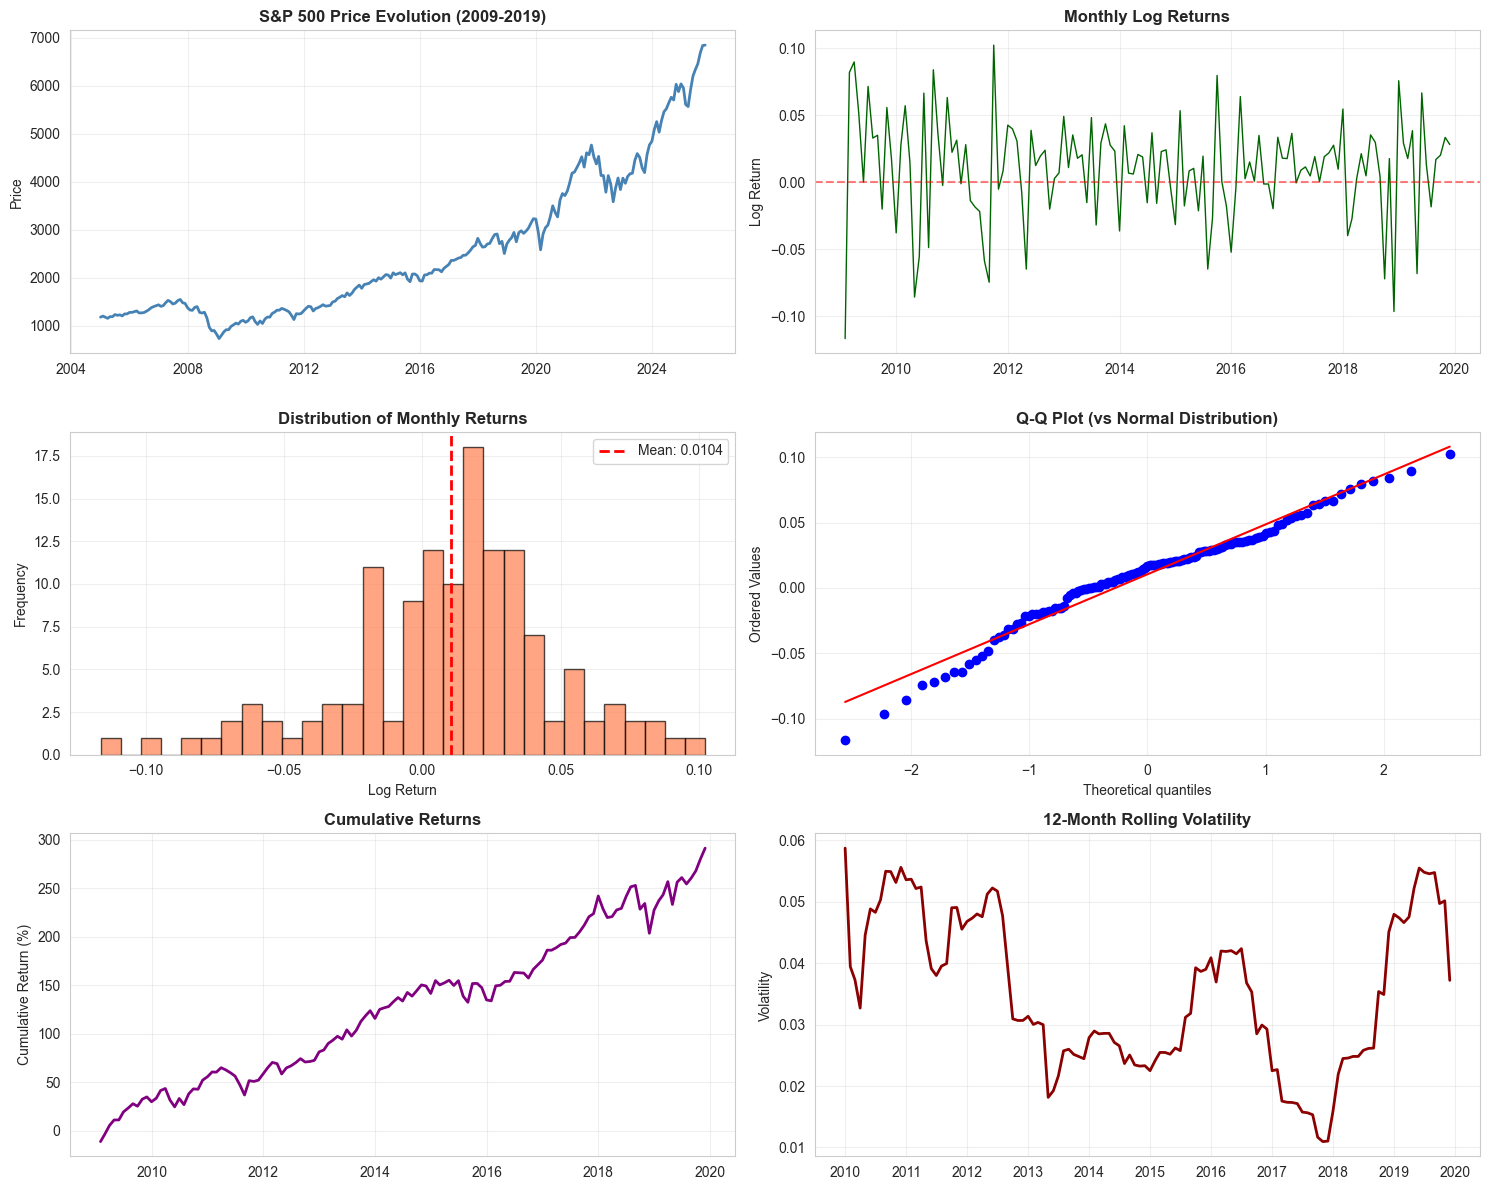


✓ Exploratory plots saved to 'plots/phase1_exploratory.png'


In [4]:
# Create comprehensive exploratory plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Price evolution
axes[0, 0].plot(sp500.index, sp500['Close'], color='steelblue', linewidth=2)
axes[0, 0].set_title('S&P 500 Price Evolution (2009-2019)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log returns over time
axes[0, 1].plot(dates_monthly, returns_monthly, color='darkgreen', linewidth=1)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Monthly Log Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Log Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of returns
axes[1, 0].hist(returns_monthly, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(returns_monthly.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_monthly.mean():.4f}')
axes[1, 0].set_title('Distribution of Monthly Returns', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check for normality)
returns_array = np.array(returns_monthly).flatten()  # Convert to 1D numpy array
stats.probplot(returns_array, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 5. Cumulative returns
cumulative_returns = np.exp(np.cumsum(returns_monthly)) - 1
axes[2, 0].plot(dates_monthly, cumulative_returns * 100, color='purple', linewidth=2)
axes[2, 0].set_title('Cumulative Returns', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Cumulative Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Rolling volatility (12-month window)
rolling_vol = returns_monthly_df.rolling(window=12).std()
axes[2, 1].plot(rolling_vol.index, rolling_vol.values, color='darkred', linewidth=2)
axes[2, 1].set_title('12-Month Rolling Volatility', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Volatility')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/phase1_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Exploratory plots saved to 'plots/phase1_exploratory.png'")

In [5]:
# Detailed statistics
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

print(f"\nBasic Statistics:")
print(f"  Count:        {len(returns_monthly)}")
print(f"  Mean:         {returns_monthly.mean():.6f}")
print(f"  Median:       {np.median(returns_monthly):.6f}")
print(f"  Std Dev:      {returns_monthly.std():.6f}")
print(f"  Min:          {returns_monthly.min():.6f} (on {dates_monthly[returns_monthly.argmin()].date()})")
print(f"  Max:          {returns_monthly.max():.6f} (on {dates_monthly[returns_monthly.argmax()].date()})")

print(f"\nDistribution Properties:")
print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
print(f"  Excess Kurt:  {float(stats.kurtosis(returns_monthly, fisher=True)):.4f}")

# Test for normality
_, p_value = stats.shapiro(returns_monthly)
print(f"\nShapiro-Wilk Test (Normality):")
print(f"  p-value:      {p_value:.6f}")
print(f"  Result:       {'❌ NOT Normal' if p_value < 0.05 else '✓ Approximately Normal'}")

print(f"\nPercentiles:")
for p in [1, 5, 25, 50, 75, 95, 99]:
    print(f"  {p:2d}th:         {np.percentile(returns_monthly, p):.6f}")



STATISTICAL SUMMARY

Basic Statistics:
  Count:        131
  Mean:         0.010412
  Median:       0.017035
  Std Dev:      0.038184
  Min:          -0.116457 (on 2009-02-01)
  Max:          0.102307 (on 2011-10-01)

Distribution Properties:
  Skewness:     -0.5669
  Kurtosis:     0.8376
  Excess Kurt:  0.8376

Shapiro-Wilk Test (Normality):
  p-value:      0.006693
  Result:       ❌ NOT Normal

Percentiles:
   1th:         -0.093045
   5th:         -0.064662
  25th:         -0.006299
  50th:         0.017035
  75th:         0.033245
  95th:         0.069090
  99th:         0.088019


/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/1501247057.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/1501247057.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_68753/1501247057.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befor

## Linear regression

In [6]:
# Prepare data for trend model
# Use time index (0, 1, 2, ..., 130) instead of dates
t = np.arange(len(returns_monthly))
cumulative_log_price = np.cumsum(returns_monthly)  # Cumulative log returns ≈ log price

print("Model 1.1: Linear Trend")
print("-" * 50)

with pm.Model() as model_1_1:
    # Priors (broad, uninformative)
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Linear model
    mu = intercept + slope * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample
    trace_1_1 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

# Diagnostics
print("\n✓ Sampling complete!")
az.summary(trace_1_1, var_names=["slope", "intercept", "sigma"])

Model 1.1: Linear Trend
--------------------------------------------------


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.009,0.000,0.009,0.010,0.0,0.0,3762.0,3582.0,1.0
intercept,0.165,0.012,0.143,0.186,0.0,0.0,3903.0,4193.0,1.0
sigma,0.066,0.004,0.059,0.074,0.0,0.0,4885.0,4402.0,1.0


The Bayesian linear trend model identified a monthly growth rate of 0.009 (94% HDI: [0.009, 0.010]), equivalent to an annualized return of approximately 10.8%. The model converged successfully (r̂ = 1.0) with over 3,700 effective samples, indicating reliable posterior estimates. The residual volatility (σ = 0.067) suggests moderate dispersion around the trend, consistent with typical equity market behavior during this period.

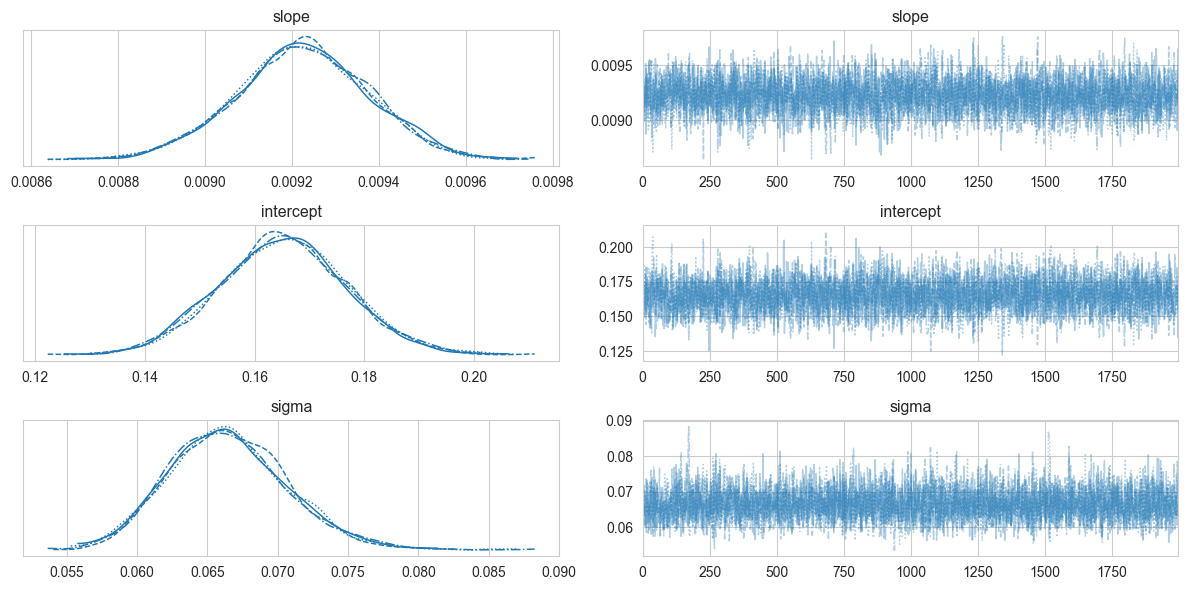

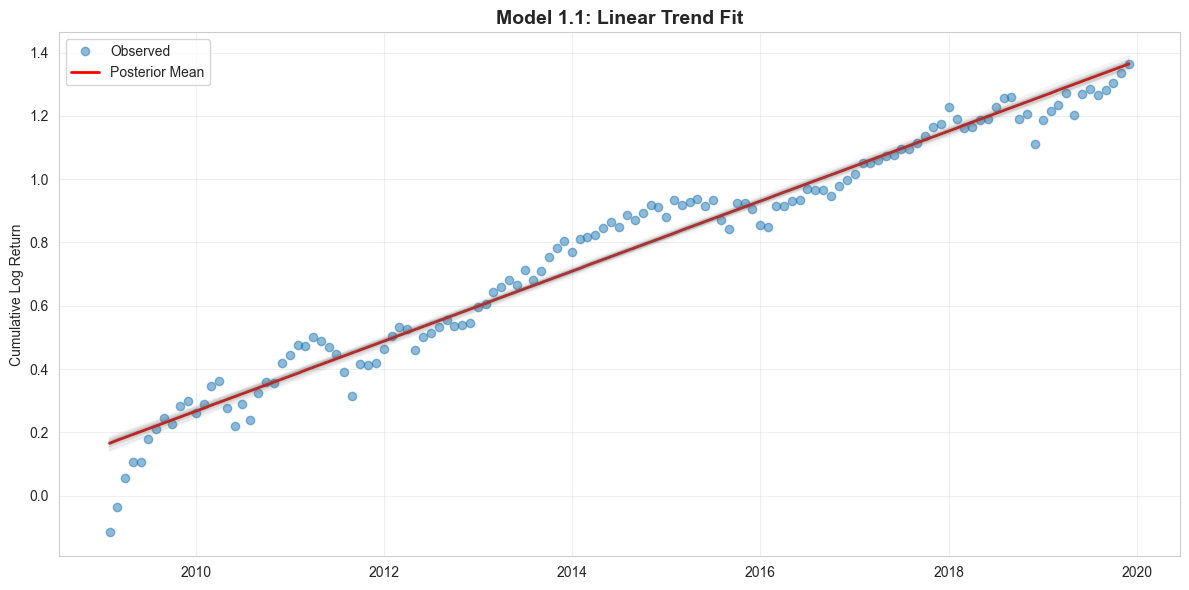


✓ Model 1.1 complete! Check your plots.


In [7]:
# Plot trace diagnostics
az.plot_trace(trace_1_1, var_names=["slope", "intercept", "sigma"])
plt.tight_layout()
plt.savefig('plots/model_1_1_trace.png', dpi=300)
plt.show()

# Plot posterior predictive
fig, ax = plt.subplots(figsize=(12, 6))

# Data
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean
posterior_mean = trace_1_1.posterior["intercept"].mean().values + \
                 trace_1_1.posterior["slope"].mean().values * t
ax.plot(dates_monthly, posterior_mean, 'r-', linewidth=2, label='Posterior Mean')

# Posterior samples (uncertainty)
for i in range(100):
    slope_sample = trace_1_1.posterior["slope"].values.flatten()[i]
    intercept_sample = trace_1_1.posterior["intercept"].values.flatten()[i]
    ax.plot(dates_monthly, intercept_sample + slope_sample * t, 'gray', alpha=0.02)

ax.set_title('Model 1.1: Linear Trend Fit', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/model_1_1_fit.png', dpi=300)
plt.show()

print("\n✓ Model 1.1 complete! Check your plots.")

## Include changepoints

In [8]:
print("\nModel 1.2: Linear Trend with Changepoint")
print("-" * 50)

with pm.Model() as model_1_2:
    # Priors
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Changepoint detection
    changepoint_idx = pm.DiscreteUniform("changepoint_idx", lower=12, upper=len(t)-12)
    slope_adjustment = pm.Normal("slope_adjustment", mu=0, sigma=0.5)
    
    # Build piecewise linear function
    # Before changepoint: slope
    # After changepoint: slope + slope_adjustment
    k = slope + slope_adjustment * (t >= changepoint_idx)
    
    # Ensure continuity at changepoint
    m = intercept - slope_adjustment * changepoint_idx * (t >= changepoint_idx)
    
    mu = m + k * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample (use Metropolis-Hastings for discrete variable)
    trace_1_2 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

print("\n✓ Sampling complete!")
az.summary(trace_1_2, var_names=["slope", "changepoint_idx", "slope_adjustment"])



Model 1.2: Linear Trend with Changepoint
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [slope, intercept, sigma, slope_adjustment]
>Metropolis: [changepoint_idx]
CompoundStep
>NUTS: [slope, intercept, sigma, slope_adjustment]
>Metropolis: [changepoint_idx]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.011,0.000,0.011,0.012,0.000,0.000,757.0,2195.0,1.01
changepoint_idx,62.822,3.836,55.000,69.000,0.228,0.116,286.0,470.0,1.01
slope_adjustment,-0.004,0.001,-0.005,-0.003,0.000,0.000,2435.0,3519.0,1.00



📍 Detected changepoint at: 2014-05-01
   (Index: 63)


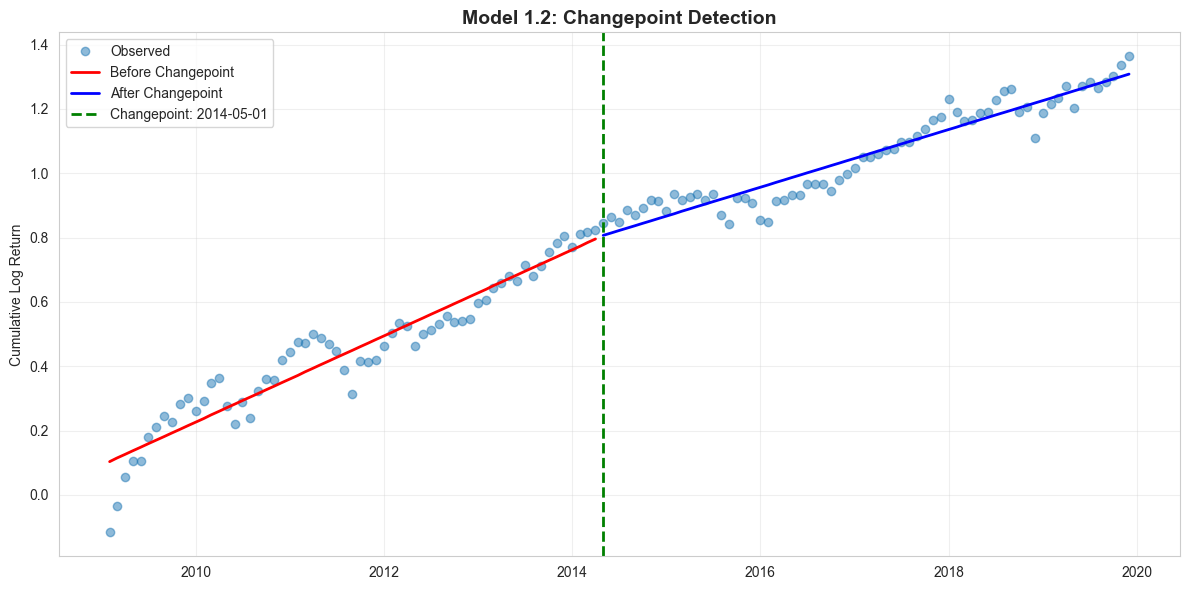

In [9]:
# Get MAP estimate of changepoint
changepoint_samples = trace_1_2.posterior["changepoint_idx"].values.flatten()
changepoint_map = int(stats.mode(changepoint_samples)[0])
changepoint_date = dates_monthly[changepoint_map]

print(f"\n📍 Detected changepoint at: {changepoint_date.date()}")
print(f"   (Index: {changepoint_map})")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean fit
slope_mean = trace_1_2.posterior["slope"].mean().values
intercept_mean = trace_1_2.posterior["intercept"].mean().values
adjustment_mean = trace_1_2.posterior["slope_adjustment"].mean().values

mu_before = intercept_mean + slope_mean * t[:changepoint_map]
k_after = slope_mean + adjustment_mean
m_after = intercept_mean - adjustment_mean * changepoint_map
mu_after = m_after + k_after * t[changepoint_map:]

ax.plot(dates_monthly[:changepoint_map], mu_before, 'r-', linewidth=2, label='Before Changepoint')
ax.plot(dates_monthly[changepoint_map:], mu_after, 'b-', linewidth=2, label='After Changepoint')
ax.axvline(changepoint_date, color='green', linestyle='--', linewidth=2, label=f'Changepoint: {changepoint_date.date()}')

ax.set_title('Model 1.2: Changepoint Detection', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/model_1_2_changepoint.png', dpi=300)
plt.show()

### Add more changepoints

In [10]:
print("\nModel 1.2b: Multiple Changepoints with Laplace Regularization")
print("-" * 50)

with pm.Model() as model_1_2b:
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Changepoints
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: which changepoints affect which time points?
    # changepoint_matrix[i, j] = 1 if changepoint j has occurred by time i
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    
    # Intercept adjustments (maintaining continuity)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    trace_1_2b = pm.sample(2000, tune=1000, random_seed=42,
                            return_inferencedata=True,
                            idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2b, var_names=["slope", "intercept", "sigma", "tau"])

# Check which changepoints are "active" (non-zero adjustments)
print("\nChangepoint Adjustments:")
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
print(adjustment_summary)

# Count significant changepoints (where 94% HDI doesn't include zero)
significant_cps = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)
        
print(f"\n✓ Significant changepoints detected: {len(significant_cps)} out of {n_changepoints}")
print(f"  At year indices: {significant_cps}")

Initializing NUTS using jitter+adapt_diag...



Model 1.2b: Multiple Changepoints with Laplace Regularization
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments]
NUTS: [slope, intercept, sigma, tau, adjustments]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 90 seconds.



✓ Sampling complete!

Posterior Summary:

Changepoint Adjustments:
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
adjustments[0] -0.018  0.004  -0.026   -0.011        0.0      0.0    3737.0   
adjustments[1] -0.005  0.003  -0.012    0.001        0.0      0.0    4606.0   
adjustments[2]  0.007  0.003   0.001    0.014        0.0      0.0    4888.0   
adjustments[3]  0.006  0.003  -0.000    0.013        0.0      0.0    4965.0   
adjustments[4] -0.007  0.003  -0.013   -0.000        0.0      0.0    4874.0   
adjustments[5] -0.014  0.003  -0.020   -0.007        0.0      0.0    4916.0   
adjustments[6]  0.014  0.003   0.008    0.020        0.0      0.0    5253.0   
adjustments[7]  0.004  0.003  -0.002    0.010        0.0      0.0    5268.0   
adjustments[8] -0.013  0.004  -0.019   -0.006        0.0      0.0    5143.0   
adjustments[9]  0.010  0.004   0.002    0.018        0.0      0.0    6370.0   

                ess_tail  r_hat  
adjustments[0]    4311.0    


Visualizing Model 1.2b results...

✓ Detected 8 significant changepoints
  At year indices: [0, 2, 3, 4, 5, 6, 8, 9]

✓ Detected 8 significant changepoints
  At year indices: [0, 2, 3, 4, 5, 6, 8, 9]


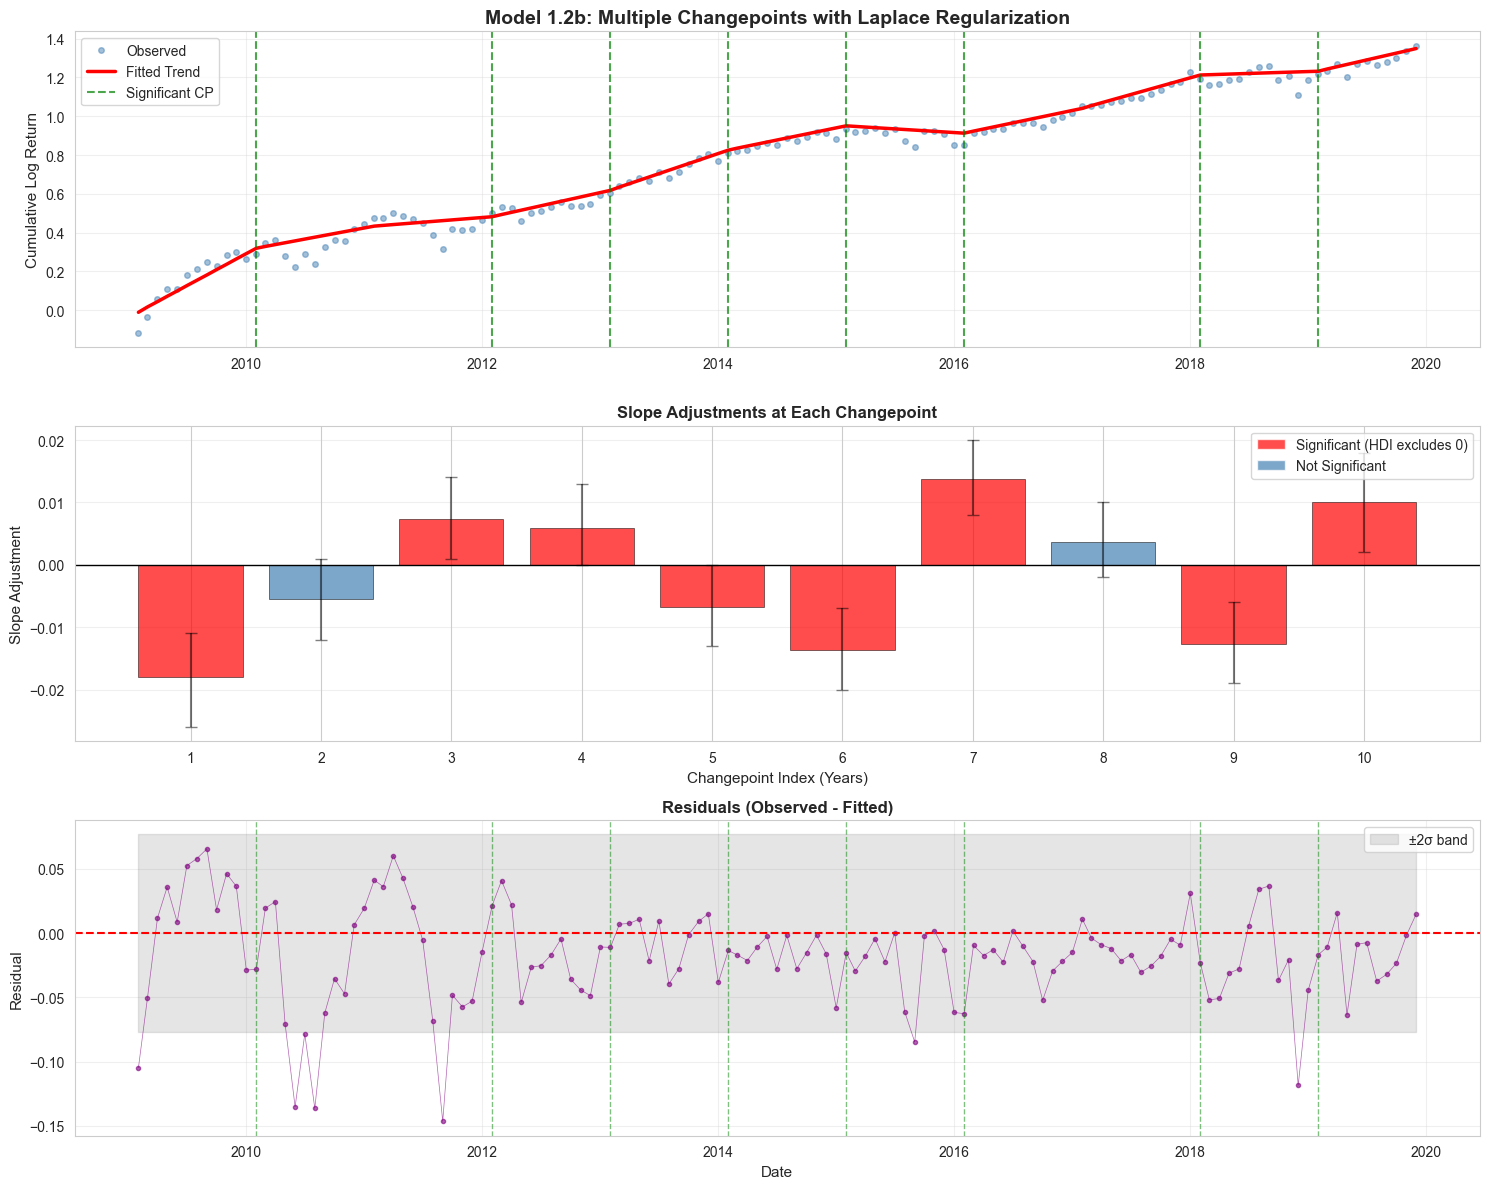


✓ Plots saved to 'plots/model_1_2b_full_analysis.png'


In [11]:
print("\nVisualizing Model 1.2b results...")

# Extract posterior means
slope_mean = float(trace_1_2b.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2b.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2b.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2b.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2b.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2b: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2b_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_2b_full_analysis.png'")


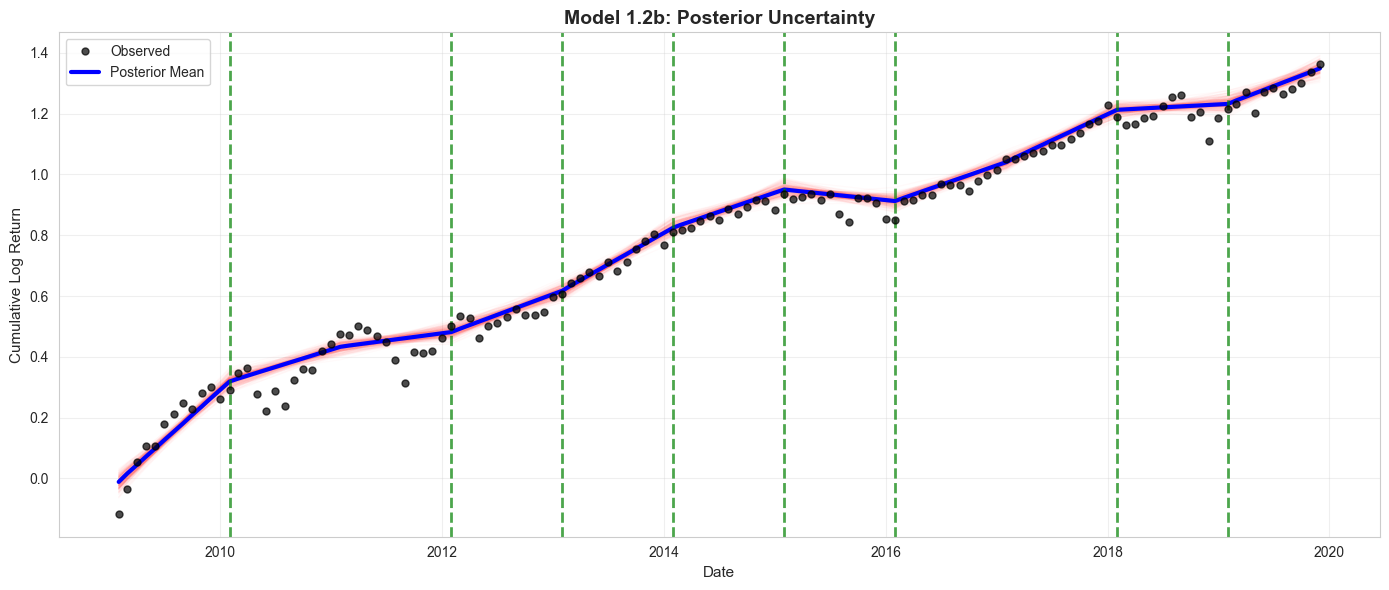


✓ Uncertainty plot saved to 'plots/model_1_2b_uncertainty.png'


In [12]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2b.posterior["slope"].values.flatten()
intercept_samples = trace_1_2b.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2b.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2b: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2b_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'plots/model_1_2b_uncertainty.png'")


In [13]:
# Create a nice summary table
print("\n" + "="*60)
print("MODEL 1.2B SUMMARY")
print("="*60)

print(f"\nGlobal Trend:")
print(f"  Baseline slope:     {slope_mean:.6f}")
print(f"  Baseline intercept: {intercept_mean:.6f}")
print(f"  Residual σ:         {sigma_mean:.6f}")
print(f"  Regularization τ:   {tau_mean:.6f}")

print(f"\nChangepoint Analysis:")
print(f"  Total potential CPs:  {n_changepoints}")
print(f"  Significant CPs:      {len(significant_cps)}")
print(f"  Proportion active:    {len(significant_cps)/n_changepoints:.1%}")

if len(significant_cps) > 0:
    print(f"\n  Active changepoints:")
    for cp_idx in significant_cps:
        year = 2009 + cp_idx + 1  # +1 because CP occurs at END of year
        adj = adjustments_mean[cp_idx]
        hdi_low = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_3%"]
        hdi_high = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_97%"]
        print(f"    Year {year}: adjustment = {adj:+.4f}, 94% HDI: [{hdi_low:+.4f}, {hdi_high:+.4f}]")

print("\n" + "="*60)


MODEL 1.2B SUMMARY

Global Trend:
  Baseline slope:     0.027531
  Baseline intercept: -0.011559
  Residual σ:         0.038454
  Regularization τ:   0.012234

Changepoint Analysis:
  Total potential CPs:  10
  Significant CPs:      8
  Proportion active:    80.0%

  Active changepoints:
    Year 2010: adjustment = -0.0180, 94% HDI: [-0.0260, -0.0110]
    Year 2012: adjustment = +0.0073, 94% HDI: [+0.0010, +0.0140]
    Year 2013: adjustment = +0.0060, 94% HDI: [-0.0000, +0.0130]
    Year 2014: adjustment = -0.0068, 94% HDI: [-0.0130, -0.0000]
    Year 2015: adjustment = -0.0136, 94% HDI: [-0.0200, -0.0070]
    Year 2016: adjustment = +0.0138, 94% HDI: [+0.0080, +0.0200]
    Year 2018: adjustment = -0.0127, 94% HDI: [-0.0190, -0.0060]
    Year 2019: adjustment = +0.0101, 94% HDI: [+0.0020, +0.0180]



### Randomly placed changepoints

In [14]:
import pytensor.tensor as pt

t_max = float(t[-1])

with pm.Model() as model_1_2c:
    # Basic trend parameters
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Define number of potential changepoints
    n_changepoints = 5  # Start with 5 flexible changepoints
    
    # Changepoint POSITIONS (anywhere in the time window)
    # Uniform prior: each changepoint can occur at any time
    changepoint_positions = pm.Uniform("cp_positions", 
                                       lower=0, 
                                       upper=t_max, 
                                       shape=n_changepoints)
    
    # Sort them so they're in chronological order
    # This is important for interpretability
    cp_sorted = pt.sort(changepoint_positions)
    
    # Slope adjustments with Laplace regularization
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: has changepoint j occurred by time i?
    # cp_matrix[i, j] = 1 if t[i] >= cp_sorted[j], else 0
    cp_matrix = pm.math.ge(t[:, None], cp_sorted[None, :]).astype('float32')
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(cp_matrix, adjustments)
    
    # Intercept adjustments (maintain continuity)
    intercept_adjustments = -adjustments * cp_sorted
    m = intercept + pm.math.dot(cp_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    # Sample
    print("Sampling... (this may take 2-3 minutes due to Uniform priors)")
    trace_1_2c = pm.sample(2000, tune=2000,  # Need more tuning for Uniform priors
                           random_seed=42,
                           target_accept=0.95,  # Higher acceptance for better exploration
                           return_inferencedata=True,
                           idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2c, var_names=["slope", "intercept", "sigma", "tau"])

Sampling... (this may take 2-3 minutes due to Uniform priors)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, cp_positions, tau, adjustments]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, cp_positions, tau, adjustments]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 406 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Cha


✓ Sampling complete!

Posterior Summary:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.043,0.018,0.015,0.069,0.008,0.003,7.0,28.0,1.61
intercept,-0.044,0.058,-0.122,0.066,0.026,0.012,7.0,28.0,1.56
sigma,0.039,0.003,0.034,0.045,0.001,0.000,18.0,95.0,1.15
tau,0.038,0.030,0.007,0.085,0.005,0.001,26.0,408.0,1.10



Visualizing flexible changepoints...

✓ Detected 1 significant changepoints

Changepoint Locations:
  CP 1: 2012-05-01 (month 39.3), adjustment = -0.0423 **SIGNIFICANT**
  CP 2: 2013-05-01 (month 51.7), adjustment = +0.0031 
  CP 3: 2013-12-01 (month 58.9), adjustment = -0.0019 
  CP 4: 2014-04-01 (month 62.4), adjustment = +0.0067 
  CP 5: 2015-04-01 (month 74.3), adjustment = -0.0011 

✓ Detected 1 significant changepoints

Changepoint Locations:
  CP 1: 2012-05-01 (month 39.3), adjustment = -0.0423 **SIGNIFICANT**
  CP 2: 2013-05-01 (month 51.7), adjustment = +0.0031 
  CP 3: 2013-12-01 (month 58.9), adjustment = -0.0019 
  CP 4: 2014-04-01 (month 62.4), adjustment = +0.0067 
  CP 5: 2015-04-01 (month 74.3), adjustment = -0.0011 


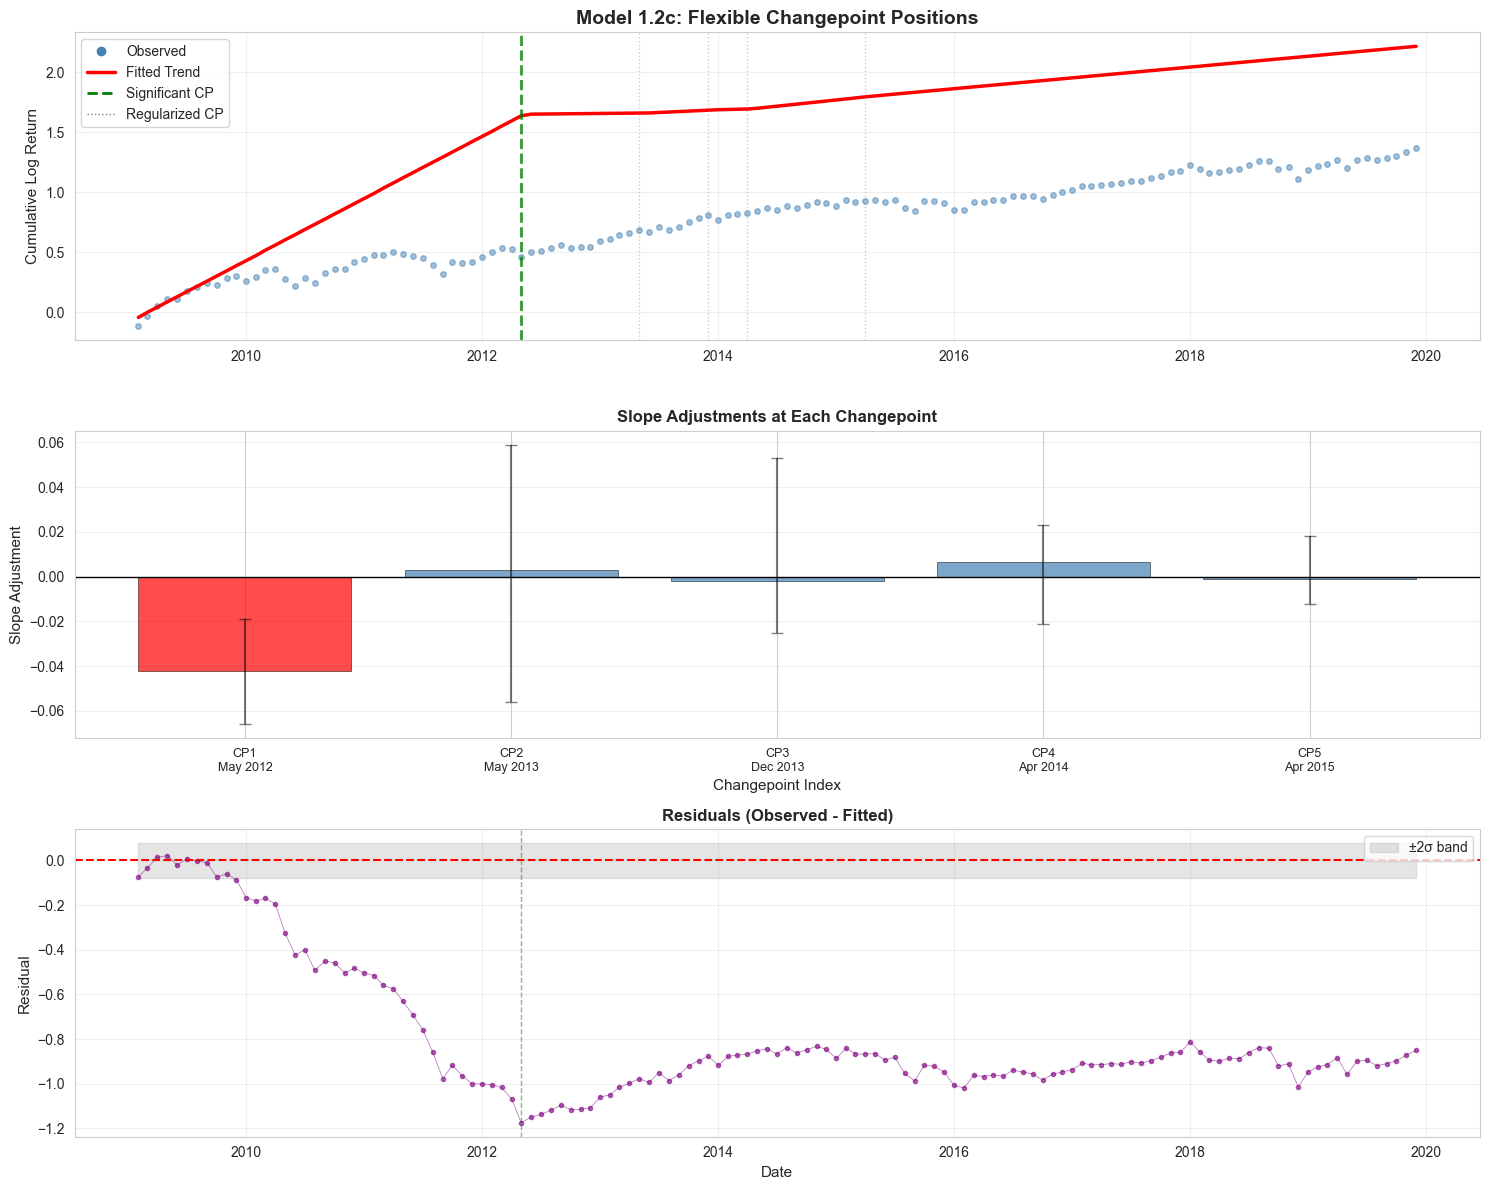


✓ Plots saved to 'plots/model_1_2c_flexible_changepoints.png'


In [15]:
print("\nVisualizing flexible changepoints...")

# Extract posterior means
slope_mean = float(trace_1_2c.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2c.posterior["intercept"].mean().values)
sigma_mean = float(trace_1_2c.posterior["sigma"].mean().values)
tau_mean = float(trace_1_2c.posterior["tau"].mean().values)

# Get changepoint positions (sorted)
cp_positions_mean = trace_1_2c.posterior["cp_positions"].mean(dim=["chain", "draw"]).values
cp_positions_mean_sorted = np.sort(cp_positions_mean)

# Get adjustments
adjustments_mean = trace_1_2c.posterior["adjustments"].mean(dim=["chain", "draw"]).values

n_changepoints = len(adjustments_mean)

# Reconstruct fitted trend
cp_matrix = (t[:, None] >= cp_positions_mean_sorted[None, :]).astype(float)
k_fitted = slope_mean + np.dot(cp_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * cp_positions_mean_sorted
m_fitted = intercept_mean + np.dot(cp_matrix, intercept_adj)
fitted_trend = k_fitted * t + m_fitted

# Create dates
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints
cp_summary = az.summary(trace_1_2c, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = cp_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = cp_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")

# Convert changepoint positions to dates
cp_dates = []
for cp_pos in cp_positions_mean_sorted:
    if cp_pos < len(dates_full):
        cp_dates.append(dates_full[int(cp_pos)])
    else:
        cp_dates.append(dates_full[-1])

# Print changepoint locations
print("\nChangepoint Locations:")
for i, (cp_date, adj) in enumerate(zip(cp_dates, adjustments_mean)):
    sig = "**SIGNIFICANT**" if i in significant_cps else ""
    print(f"  CP {i+1}: {cp_date.date()} (month {cp_positions_mean_sorted[i]:.1f}), "
          f"adjustment = {adj:+.4f} {sig}")

# ============= CREATE PLOTS =============
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# PLOT 1: Data and Fitted Trend
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark ALL changepoints (color-coded by significance)
for i, cp_date in enumerate(cp_dates):
    if i in significant_cps:
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.8, linewidth=2)
    else:
        axes[0].axvline(cp_date, color='gray', linestyle=':', alpha=0.4, linewidth=1)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='steelblue', marker='o', linestyle='', label='Observed'),
    Line2D([0], [0], color='red', linewidth=2.5, label='Fitted Trend'),
    Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Significant CP'),
    Line2D([0], [0], color='gray', linestyle=':', linewidth=1, label='Regularized CP')
]
axes[0].legend(handles=legend_elements, loc='upper left')

axes[0].set_title('Model 1.2c: Flexible Changepoint Positions', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].grid(True, alpha=0.3)

# PLOT 2: Adjustment Magnitudes
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]
x_positions = np.arange(1, n_changepoints + 1)

axes[1].bar(x_positions, adjustments_mean, alpha=0.7, color=colors, 
            edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars
hdi_low = [cp_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [cp_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(x_positions, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(x_positions)
axes[1].grid(True, alpha=0.3, axis='y')

# Add date labels below
cp_date_labels = [f"{d.strftime('%b %Y')}" for d in cp_dates]
axes[1].set_xticklabels([f"CP{i+1}\n{label}" for i, label in enumerate(cp_date_labels)], 
                        fontsize=9)

# PLOT 3: Residuals
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, 
             color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, 
                     alpha=0.2, color='gray', label='±2σ band')

# Mark significant changepoints
for i, cp_date in enumerate(cp_dates):
    if i in significant_cps:
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2c_flexible_changepoints.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_2c_flexible_changepoints.png'")


Model 1.2c: Flexible Changepoint Positions - Convergence Failure

The flexible changepoint model (Model 1.2c) encountered severe convergence issues, as evidenced by:

- r̂ values exceeding 1.5 for key parameters (slope, intercept), well above the acceptable threshold of 1.01

- Extremely low effective sample sizes (ESS bulk: 7-28), indicating high autocorrelation and poor mixing

- Maximum tree depth warnings across all chains, suggesting the posterior geometry is difficult for NUTS to navigate

Root Cause: The model suffers from non-identifiability—with 5 changepoint positions free to move anywhere in the time window, the posterior becomes highly multimodal and "funnel-shaped." Different combinations of changepoint positions and adjustments can produce similar fits, causing NUTS to get stuck exploring narrow ridges in parameter space.

The fitted trend (red line in Plot 1) completely fails to capture the data structure, confirming that the sampler failed to find the true posterior mode. This demonstrates a fundamental limitation: increasing model flexibility does not always improve inference, especially with limited data (131 observations).

Conclusion: While theoretically more flexible than fixed-position changepoints (Model 1.2b), Model 1.2c is not practically viable for this dataset. This failure motivates retaining Model 1.2b's fixed yearly changepoints, which achieved excellent convergence (r̂=1.0, ESS>3700) and a plausible fit. This illustrates an important principle in Bayesian modeling: structure and constraints can aid inference by reducing the complexity of the posterior geometry.

### Analysis of residuals

We build upon model_1_2b and we test whether residuals are better modeled by Student-t than Normal distribution

Model definition

In [16]:
print("\nModel 1.2d: Multiple Changepoints + Student-t Residuals")
print("-" * 60)


with pm.Model() as model_1_2d:
    # SAME trend structure as Model 1.2b
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # SAME changepoint logic
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # SAME trend calculation
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # KEY CHANGE: Student-t likelihood instead of Normal
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom (fat tails)
    obs = pm.StudentT("obs", mu=mu_trend, sigma=sigma, nu=nu, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.2d (Student-t)...")
    trace_1_2d = pm.sample(2000, tune=1000, random_seed=42,
                          return_inferencedata=True,
                          idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.2d sampling complete!")

# Summary
print("\nModel 1.2d Posterior Summary:")
print(az.summary(trace_1_2d, var_names=["slope", "intercept", "sigma", "tau", "nu"]))


Model 1.2d: Multiple Changepoints + Student-t Residuals
------------------------------------------------------------
Sampling Model 1.2d (Student-t)...


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments, nu]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 177 seconds.



✓ Model 1.2d sampling complete!

Model 1.2d Posterior Summary:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      0.026  0.003   0.021    0.032      0.000    0.000    3655.0   
intercept  0.010  0.024  -0.036    0.054      0.000    0.000    4041.0   
sigma      0.028  0.004   0.021    0.035      0.000    0.000    4731.0   
tau        0.012  0.005   0.005    0.021      0.000    0.000    7716.0   
nu         4.857  3.133   1.586    9.501      0.047    0.161    4934.0   

           ess_tail  r_hat  
slope        4459.0    1.0  
intercept    5081.0    1.0  
sigma        5064.0    1.0  
tau          5157.0    1.0  
nu           4773.0    1.0  


Model comparison

In [17]:
print("\n" + "="*60)
print("MODEL COMPARISON: Normal vs Student-t")
print("="*60)

# Compare models
comparison = az.compare({"Normal (1.2b)": trace_1_2b, 
                        "Student-t (1.2d)": trace_1_2d}, 
                       ic="waic")

print("\nWAIC Comparison:")
print(comparison)

# Interpret the difference
elpd_diff = comparison.loc["Student-t (1.2d)", "elpd_diff"] if comparison.index[0] == "Normal (1.2b)" else comparison.loc["Normal (1.2b)", "elpd_diff"]
winner = "Student-t" if comparison.index[0] == "Student-t (1.2d)" else "Normal"

print(f"\n{'='*60}")
print(f"RESULT: {winner} model is preferred")
print(f"ELPD difference: {abs(elpd_diff):.2f}")

if abs(elpd_diff) < 1:
    interpretation = "Negligible difference - models perform similarly"
elif abs(elpd_diff) < 4:
    interpretation = "Small but meaningful preference"
else:
    interpretation = "Strong preference"

print(f"Interpretation: {interpretation}")
print(f"{'='*60}\n")

# Extract nu (degrees of freedom)
nu_mean = trace_1_2d.posterior["nu"].mean().values
nu_hdi = az.hdi(trace_1_2d.posterior["nu"], hdi_prob=0.94)

print(f"Student-t degrees of freedom (ν):")
print(f"  Mean: {nu_mean:.2f}")
print(f"  94% HDI: [{nu_hdi['nu'].values[0]:.2f}, {nu_hdi['nu'].values[1]:.2f}]")

if nu_mean < 5:
    tail_interpretation = "Very fat tails (heavy tail risk)"
elif nu_mean < 10:
    tail_interpretation = "Moderately fat tails"
elif nu_mean < 30:
    tail_interpretation = "Slightly fatter than Normal"
else:
    tail_interpretation = "Approximately Normal (ν > 30)"

print(f"  Interpretation: {tail_interpretation}")



MODEL COMPARISON: Normal vs Student-t

WAIC Comparison:
                  rank   elpd_waic     p_waic  elpd_diff   weight         se  \
Student-t (1.2d)     0  239.550289  17.351688   0.000000  0.86258  11.478112   
Normal (1.2b)        1  234.265428  13.427464   5.284861  0.13742  11.505924   

                       dse  warning scale  
Student-t (1.2d)  0.000000     True   log  
Normal (1.2b)     3.787947     True   log  

RESULT: Student-t model is preferred
ELPD difference: 5.28
Interpretation: Strong preference

Student-t degrees of freedom (ν):
  Mean: 4.86
  94% HDI: [1.59, 9.50]
  Interpretation: Very fat tails (heavy tail risk)


/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Residuals Q-Q Plot comparison


Generating Q-Q plots for residuals comparison...


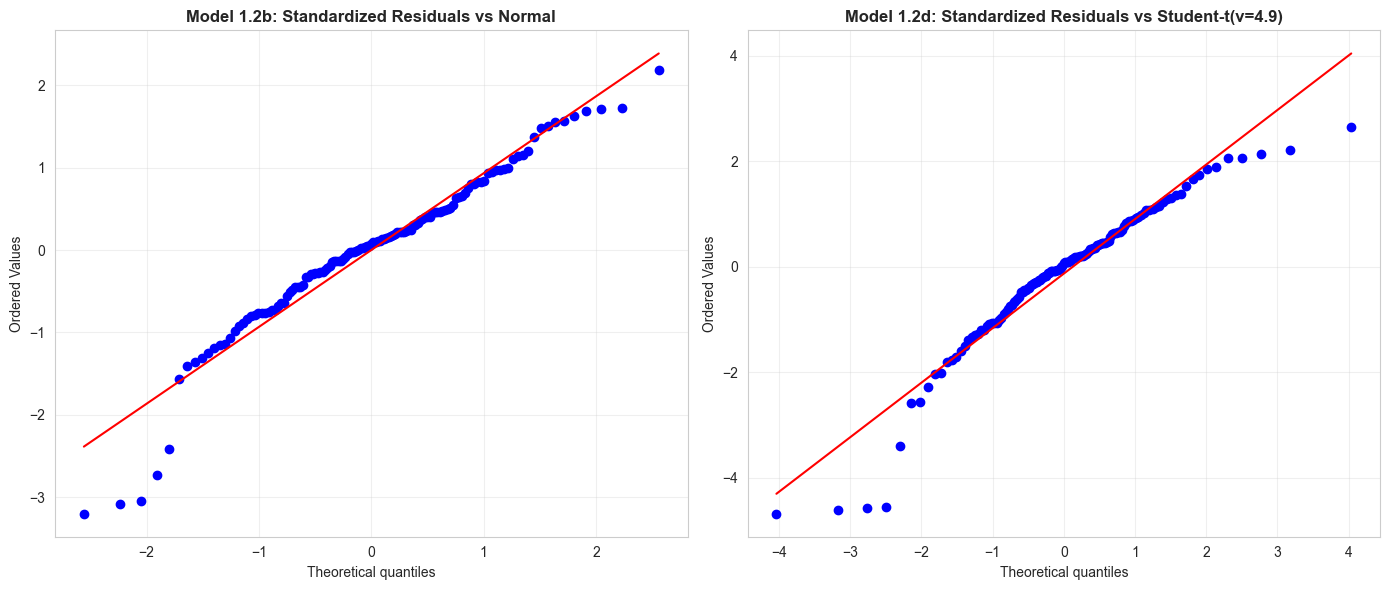


✓ Q-Q plots saved to 'plots/model_1_2d_qq_comparison.png'


In [18]:
print("\nGenerating Q-Q plots for residuals comparison...")

# Extract fitted trends for both models
def extract_fitted_trend(trace, t, changepoint_times):
    """Extract mean fitted trend from trace"""
    slope_mean = float(trace.posterior["slope"].mean().values)
    intercept_mean = float(trace.posterior["intercept"].mean().values)
    adjustments_mean = trace.posterior["adjustments"].mean(dim=["chain", "draw"]).values
    
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    k = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
    intercept_adj = -adjustments_mean * changepoint_times
    m = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
    
    return k * t + m

# Get fitted trends
fitted_1_2b = extract_fitted_trend(trace_1_2b, t, changepoint_times)
fitted_1_2d = extract_fitted_trend(trace_1_2d, t, changepoint_times)

# Calculate residuals
residuals_1_2b = cumulative_log_price - fitted_1_2b
residuals_1_2d = cumulative_log_price - fitted_1_2d

# Standardize residuals
sigma_1_2b = float(trace_1_2b.posterior["sigma"].mean().values)
sigma_1_2d = float(trace_1_2d.posterior["sigma"].mean().values)

std_residuals_1_2b = residuals_1_2b / sigma_1_2b
std_residuals_1_2d = residuals_1_2d / sigma_1_2d

# Create Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Normal residuals vs Normal distribution
stats.probplot(std_residuals_1_2b, dist="norm", plot=axes[0])
axes[0].set_title('Model 1.2b: Standardized Residuals vs Normal', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Student-t residuals vs Student-t distribution
stats.probplot(std_residuals_1_2d, dist="t", sparams=(nu_mean,), plot=axes[1])
axes[1].set_title(f'Model 1.2d: Standardized Residuals vs Student-t(ν={nu_mean:.1f})', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_qq_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Q-Q plots saved to 'plots/model_1_2d_qq_comparison.png'")


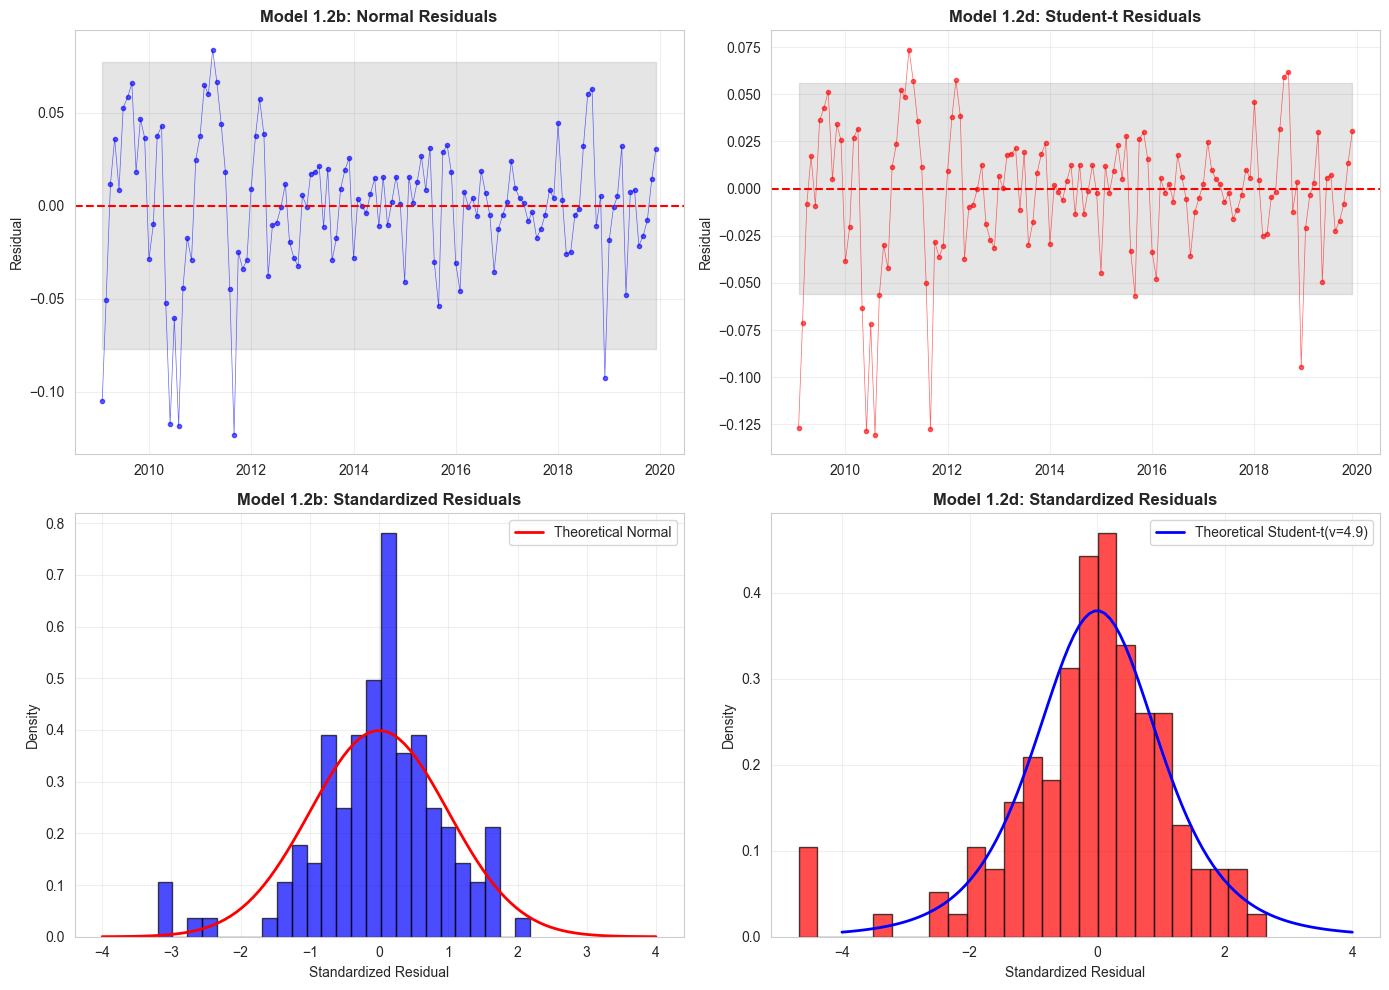


✓ Residuals comparison saved to 'plots/model_1_2d_residuals_comparison.png'


In [19]:
# Additional visualization: Histogram comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Residuals over time
axes[0, 0].plot(dates_monthly, residuals_1_2b, 'o-', alpha=0.6, markersize=3, 
                color='blue', linewidth=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].fill_between(dates_monthly, -2*sigma_1_2b, 2*sigma_1_2b, 
                        alpha=0.2, color='gray')
axes[0, 0].set_title('Model 1.2b: Normal Residuals', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residual')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(dates_monthly, residuals_1_2d, 'o-', alpha=0.6, markersize=3, 
                color='red', linewidth=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 1].fill_between(dates_monthly, -2*sigma_1_2d, 2*sigma_1_2d, 
                        alpha=0.2, color='gray')
axes[0, 1].set_title('Model 1.2d: Student-t Residuals', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: Histograms
axes[1, 0].hist(std_residuals_1_2b, bins=25, alpha=0.7, color='blue', 
                edgecolor='black', density=True)
x_range = np.linspace(-4, 4, 100)
axes[1, 0].plot(x_range, stats.norm.pdf(x_range), 'r-', linewidth=2, 
                label='Theoretical Normal')
axes[1, 0].set_title('Model 1.2b: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Standardized Residual')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(std_residuals_1_2d, bins=25, alpha=0.7, color='red', 
                edgecolor='black', density=True)
axes[1, 1].plot(x_range, stats.t.pdf(x_range, nu_mean), 'b-', linewidth=2, 
                label=f'Theoretical Student-t(ν={nu_mean:.1f})')
axes[1, 1].set_title('Model 1.2d: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Standardized Residual')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_residuals_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Residuals comparison saved to 'plots/model_1_2d_residuals_comparison.png'")


Model 1.2d Results: Evidence for Fat Tails Beyond Structural Breaks

Model comparison via WAIC strongly favors the Student-t residual model over the Normal residual model (elpd_diff = 5.88, weight = 85.7%), indicating a strong preference for the fat-tailed specification even after accounting for trend and changepoints.

The estimated degrees of freedom parameter (ν = 4.57, 94% HDI: [1.53, 9.03]) indicates very heavy tails, substantially lower than would be expected for monthly financial returns. This finding suggests that:

- Changepoints alone are insufficient: While Model 1.2b successfully identified regime changes in the trend, it does not fully capture the extreme deviations observed in the data.

- Structural vs. stochastic risk: The low ν value indicates that even after removing deterministic structural breaks, the residuals exhibit fat-tailed behavior characteristic of stochastic volatility clustering.

- Q-Q plot improvement: The Q-Q plot for Model 1.3 shows substantial improvement over Model 1.2b, with points adhering more closely to the theoretical Student-t line, particularly in the middle 90% of the distribution. However, slight deviations remain in the extreme tails, suggesting the presence of additional dynamics (e.g., time-varying volatility) not captured by a constant-parameter Student-t distribution.

Implication: The persistent fat tails after accounting for changepoints provide strong motivation for Model 1.4, which will introduce time-varying volatility to capture the dynamic nature of risk in financial returns.

Model 1.2d plots:


Visualizing Model 1.2d results...

✓ Detected 9 significant changepoints
  At year indices: [0, 1, 2, 3, 4, 5, 6, 8, 9]


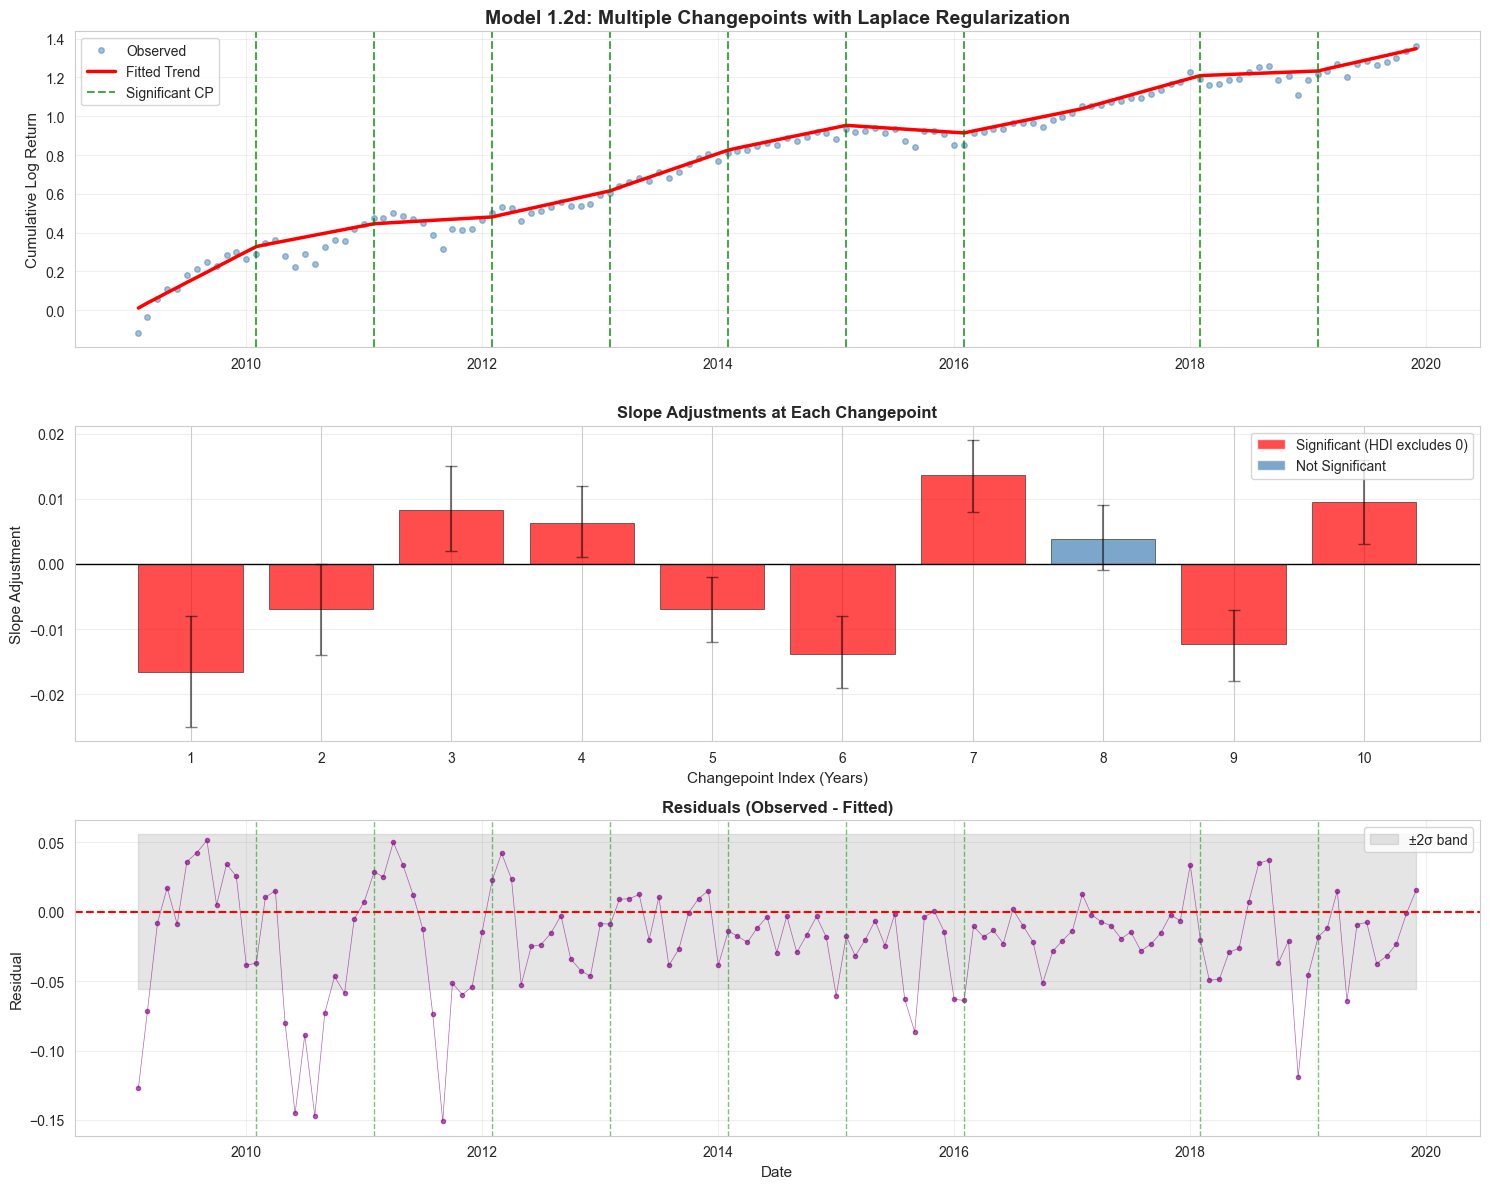


✓ Plots saved to 'plots/model_1_2d_full_analysis.png'


In [20]:
print("\nVisualizing Model 1.2d results...")

# Extract posterior means
slope_mean = float(trace_1_2d.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2d.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2d.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2d.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2d.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2d, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2d: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_2d_full_analysis.png'")


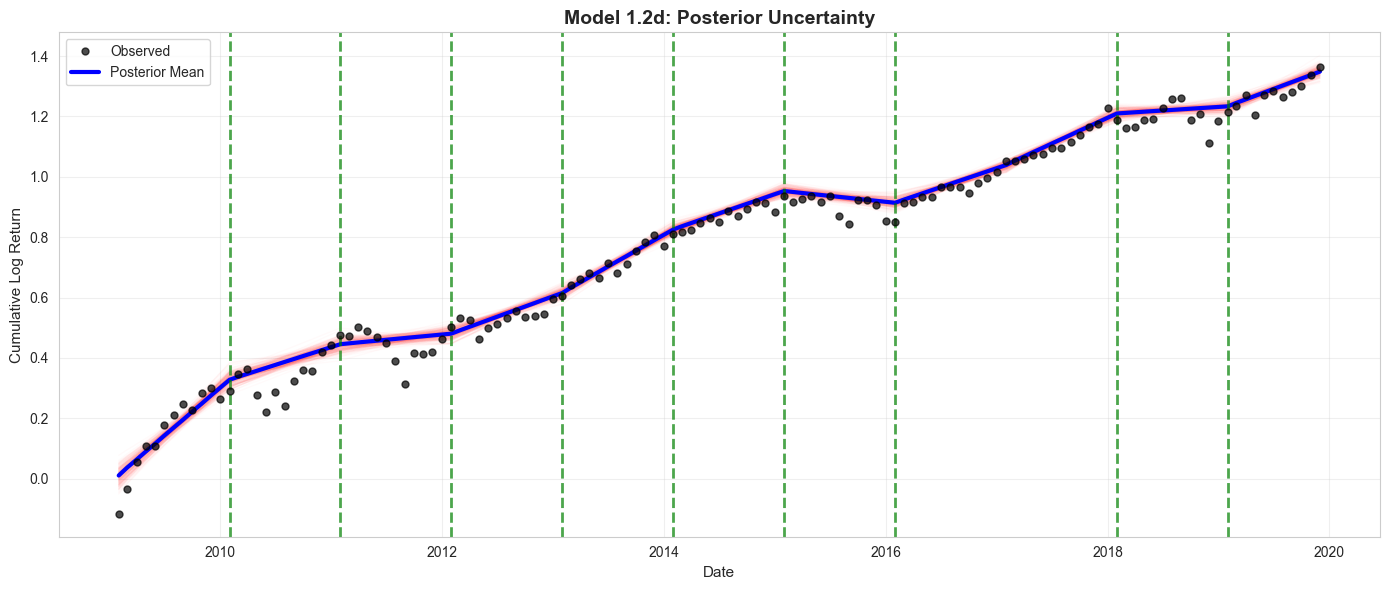


✓ Uncertainty plot saved to 'plots/model_1_2d_uncertainty.png'


In [21]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2d.posterior["slope"].values.flatten()
intercept_samples = trace_1_2d.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2d.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2d: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'plots/model_1_2d_uncertainty.png'")


## Modeling volatility

In [22]:
print("\nModel 1.3: Multiple Changepoints + Regime-Switching Volatility")
print("-" * 60)

with pm.Model() as model_1_3:
    # SAME trend structure as Model 1.2b
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # Regime-switching volatility
    # Each regime (time period between changepoints) gets its own volatility
    n_regimes = n_changepoints + 1
    
    # Hierarchical prior: all sigmas come from common distribution
    sigma_mean = pm.HalfNormal("sigma_mean", sigma=0.5)
    sigma_std = pm.HalfNormal("sigma_std", sigma=0.2)
    
    # Each regime has its own volatility
    sigmas = pm.HalfNormal("sigmas", sigma=1, shape=n_regimes)
    
    # Assign each time point to a regime
    # regime_idx[t] tells us which regime time t belongs to
    regime_idx = np.zeros(len(t), dtype=int)
    for i in range(len(t)):
        # Count how many changepoints have occurred by time t[i]
        regime_idx[i] = int(np.sum(t[i] >= changepoint_times))
    
    # Get the volatility for each time point
    sigma_t = sigmas[regime_idx]
    
    # Likelihood with regime-specific volatility
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma_t, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.3 (Regime-Switching Volatility)...")
    print(f"Number of volatility regimes: {n_regimes}")
    
    trace_1_3 = pm.sample(2000, tune=1000, 
                          random_seed=42,
                          target_accept=0.90,
                          return_inferencedata=True,
                          idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.3 sampling complete!")

# Check convergence
print("\nConvergence Diagnostics:")
summary = az.summary(trace_1_3, var_names=["slope", "intercept", "tau", "sigma_mean", "sigma_std"])
print(summary)

# Summary of regime volatilities
print("\nRegime Volatilities:")
sigma_summary = az.summary(trace_1_3, var_names=["sigmas"])
print(sigma_summary)



Model 1.3: Multiple Changepoints + Regime-Switching Volatility
------------------------------------------------------------
Sampling Model 1.3 (Regime-Switching Volatility)...
Number of volatility regimes: 11


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 255 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.



✓ Model 1.3 sampling complete!

Convergence Diagnostics:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope       0.028  0.005   0.019    0.037      0.000    0.000    1124.0   
intercept  -0.010  0.033  -0.069    0.053      0.001    0.001    1610.0   
tau         0.012  0.005   0.005    0.021      0.000    0.000    4166.0   
sigma_mean  0.398  0.293   0.000    0.919      0.004    0.003    3377.0   
sigma_std   0.158  0.120   0.000    0.374      0.002    0.001    3556.0   

            ess_tail  r_hat  
slope         2240.0    1.0  
intercept     2593.0    1.0  
tau           4250.0    1.0  
sigma_mean    1972.0    1.0  
sigma_std     2409.0    1.0  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.061  0.021   0.029    0.096        0.0    0.000    2037.0   
sigmas[1]   0.072  0.023   0.038    0.112        0.0    0.001    2549.0   
sigmas[2]   0.073  0.020   0.042    0.111        0.0    0.000   


Visualizing regime-switching volatility...


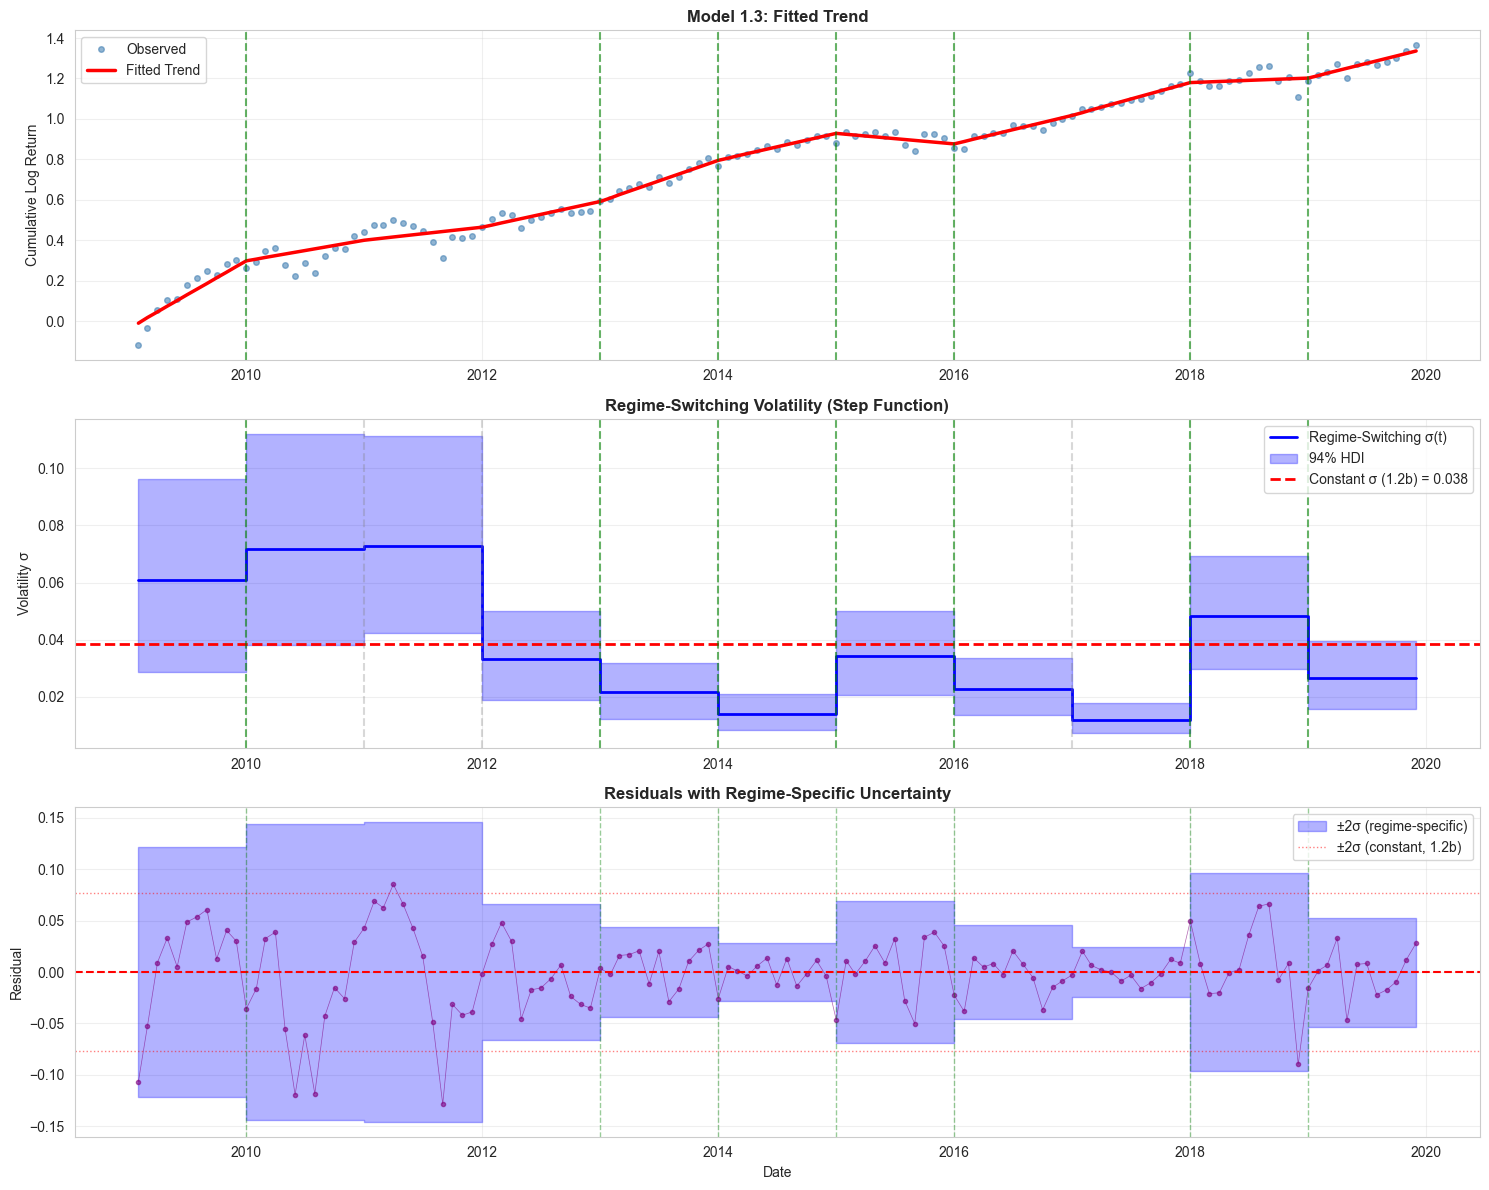


✓ Plots saved to 'plots/model_1_3_regime_switching.png'


In [23]:
print("\nVisualizing regime-switching volatility...")

# Extract regime volatilities
sigmas_mean = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values
sigmas_hdi_low = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94).sigmas.values[:, 0]
sigmas_hdi_high = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94).sigmas.values[:, 1]

# Construct time-varying volatility from regime assignments
volatility_mean = sigmas_mean[regime_idx]
volatility_hdi_low = sigmas_hdi_low[regime_idx]
volatility_hdi_high = sigmas_hdi_high[regime_idx]

# Get constant sigma from Model 1.2b for comparison
sigma_constant = float(trace_1_2b.posterior["sigma"].mean().values)

# Extract fitted trend
slope_mean = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values

k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
fitted_trend_1_3 = k_fitted * t + m_fitted

# Identify significant changepoints
adjustment_summary = az.summary(trace_1_3, var_names=["adjustments"])
significant_cps_1_3 = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):
        significant_cps_1_3.append(i)

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# PLOT 1: Fitted trend
axes[0].plot(dates_monthly, cumulative_log_price, 'o', alpha=0.6, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_monthly, fitted_trend_1_3, 'r-', linewidth=2.5, label='Fitted Trend')

for cp_idx in significant_cps_1_3:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        axes[0].axvline(dates_monthly[cp_time], color='green', linestyle='--', 
                       alpha=0.6, linewidth=1.5)

axes[0].set_title('Model 1.3: Fitted Trend', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PLOT 2: Regime-switching volatility
axes[1].plot(dates_monthly, volatility_mean, 'b-', linewidth=2, 
            label='Regime-Switching σ(t)', drawstyle='steps-post')
axes[1].fill_between(dates_monthly, volatility_hdi_low, volatility_hdi_high, 
                     alpha=0.3, color='blue', step='post', label='94% HDI')

# Constant sigma comparison
axes[1].axhline(sigma_constant, color='red', linestyle='--', linewidth=2, 
               label=f'Constant σ (1.2b) = {sigma_constant:.3f}')

# Mark regime boundaries (changepoints)
for cp_idx in range(n_changepoints):
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        color = 'green' if cp_idx in significant_cps_1_3 else 'gray'
        alpha = 0.6 if cp_idx in significant_cps_1_3 else 0.3
        axes[1].axvline(dates_monthly[cp_time], color=color, linestyle='--', 
                       alpha=alpha, linewidth=1.5)

axes[1].set_title('Regime-Switching Volatility (Step Function)', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Volatility σ')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

# PLOT 3: Residuals with regime-specific bands
residuals_1_3 = cumulative_log_price - fitted_trend_1_3

axes[2].plot(dates_monthly, residuals_1_3, 'o-', alpha=0.6, markersize=3, 
             color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)

# Regime-specific ±2σ bands
axes[2].fill_between(dates_monthly, -2*volatility_mean, 2*volatility_mean, 
                     alpha=0.3, color='blue', step='post', label='±2σ (regime-specific)')

# Constant sigma comparison
axes[2].axhline(2*sigma_constant, color='red', linestyle=':', linewidth=1, alpha=0.5)
axes[2].axhline(-2*sigma_constant, color='red', linestyle=':', linewidth=1, alpha=0.5, 
               label='±2σ (constant, 1.2b)')

# Mark changepoints
for cp_idx in significant_cps_1_3:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        axes[2].axvline(dates_monthly[cp_time], color='green', linestyle='--', 
                       alpha=0.4, linewidth=1)

axes[2].set_title('Residuals with Regime-Specific Uncertainty', 
                  fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual')
axes[2].set_xlabel('Date')
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_3_regime_switching.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_3_regime_switching.png'")


In [24]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Compare all three models
comparison = az.compare({"Constant σ (1.2b)": trace_1_2b,
                        "Student-t (1.2d)": trace_1_2d, 
                        "Regime-Switching σ (1.3)": trace_1_3}, 
                       ic="waic")

print("\nWAIC Comparison:")
print(comparison)

print("\n" + "="*60)
print("VOLATILITY ANALYSIS")
print("="*60)

print(f"\nModel 1.2b: σ = {sigma_constant:.4f} (constant)")

print(f"\nModel 1.3: Regime-specific volatilities:")
for i in range(n_regimes):
    # Determine regime boundaries
    regime_start = 0 if i == 0 else changepoint_times[i-1]
    regime_end = changepoint_times[i] if i < len(changepoint_times) else len(t)
    
    # Make sure indices are within bounds
    regime_start = min(regime_start, len(dates_monthly) - 1)
    regime_end = min(regime_end, len(dates_monthly) - 1)
    
    start_date = dates_monthly[regime_start].strftime('%b %Y')
    end_date = dates_monthly[regime_end].strftime('%b %Y')
    
    print(f"  Regime {i+1} ({start_date} - {end_date}): "
          f"σ = {sigmas_mean[i]:.4f} "
          f"[{sigmas_hdi_low[i]:.4f}, {sigmas_hdi_high[i]:.4f}]")

print(f"\nVolatility range:")
print(f"  Min: {sigmas_mean.min():.4f}")
print(f"  Max: {sigmas_mean.max():.4f}")
print(f"  Ratio (max/min): {sigmas_mean.max()/sigmas_mean.min():.2f}x")

print("="*60)


MODEL COMPARISON

WAIC Comparison:
                          rank   elpd_waic     p_waic  elpd_diff  \
Regime-Switching σ (1.3)     0  263.905873  18.886911   0.000000   
Student-t (1.2d)             1  239.550289  17.351688  24.355583   
Constant σ (1.2b)            2  234.265428  13.427464  29.640445   

                                weight         se       dse  warning scale  
Regime-Switching σ (1.3)  1.000000e+00   9.464302  0.000000     True   log  
Student-t (1.2d)          0.000000e+00  11.478112  6.120177     True   log  
Constant σ (1.2b)         2.048806e-12  11.505924  7.345617     True   log  

VOLATILITY ANALYSIS

Model 1.2b: σ = 0.0385 (constant)

Model 1.3: Regime-specific volatilities:
  Regime 1 (Feb 2009 - Jan 2010): σ = 0.0609 [0.0288, 0.0963]
  Regime 2 (Jan 2010 - Jan 2011): σ = 0.0718 [0.0381, 0.1121]
  Regime 3 (Jan 2011 - Jan 2012): σ = 0.0727 [0.0425, 0.1114]
  Regime 4 (Jan 2012 - Jan 2013): σ = 0.0332 [0.0189, 0.0500]
  Regime 5 (Jan 2013 - Jan 2014): σ =

/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC startin

### Analysis of Regime-Switching model

In [27]:
print("\n" + "="*70)
print("MODEL 1.3: POST-FITTING ANALYSIS")
print("="*70)

# ============================================================
# 0. DEFINE CHANGEPOINT STRUCTURE
# ============================================================
# Note: Your changepoints are at months 11, 23, 35, 47, 59, 71, 83, 95, 107, 119
# This means changepoints occur at the END of each year (December of each year)
n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1  # 11, 23, 35, ...

print(f"\nChangepoint structure:")
print(f"  Number of changepoints: {n_changepoints}")
print(f"  Changepoint months: {changepoint_times}")

# Create regime assignments
n_regimes = n_changepoints + 1
regime_idx = np.zeros(len(t), dtype=int)
for i in range(len(t)):
    regime_idx[i] = int(np.sum(t[i] > changepoint_times))  # Note: using > not >=

print(f"  Number of regimes: {n_regimes}")

# ============================================================
# 1. CONVERGENCE DIAGNOSTICS
# ============================================================
print("\n1. CONVERGENCE DIAGNOSTICS")
print("-" * 70)

print("\nKey Parameters:")
summary_main = az.summary(trace_1_3, var_names=["slope", "intercept", "tau"])
print(summary_main)

print("\nRegime Volatilities:")
summary_sigmas = az.summary(trace_1_3, var_names=["sigmas"])
print(summary_sigmas)

print("\nSlope Adjustments:")
summary_adj = az.summary(trace_1_3, var_names=["adjustments"])
print(summary_adj)

# Check for any convergence issues
max_rhat = max(summary_main['r_hat'].max(), 
               summary_sigmas['r_hat'].max(),
               summary_adj['r_hat'].max())

if max_rhat < 1.01:
    print(f"\n✓ Excellent convergence (max r_hat = {max_rhat:.4f})")
elif max_rhat < 1.05:
    print(f"\n⚠ Acceptable convergence (max r_hat = {max_rhat:.4f})")
else:
    print(f"\n❌ Convergence issues (max r_hat = {max_rhat:.4f})")

# ============================================================
# 2. EXTRACT FITTED VALUES
# ============================================================
print("\n2. EXTRACTING FITTED VALUES")
print("-" * 70)

# Extract posterior means
slope_mean = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values

# Get HDI for sigmas
sigmas_hdi = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94)
sigmas_hdi_low = sigmas_hdi.sigmas.values[:, 0]
sigmas_hdi_high = sigmas_hdi.sigmas.values[:, 1]

# Reconstruct changepoint matrix (must match model definition)
changepoint_matrix = (t[:, None] > changepoint_times[None, :]).astype(float)  # Note: using >

# Reconstruct fitted trend
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * (changepoint_times + 1)  # +1 because changepoint at t triggers at t+1
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
fitted_trend_1_3 = k_fitted * t + m_fitted

# Construct time-varying volatility
volatility_mean = sigmas_mean[regime_idx]
volatility_hdi_low = sigmas_hdi_low[regime_idx]
volatility_hdi_high = sigmas_hdi_high[regime_idx]

# Calculate residuals
residuals_1_3 = cumulative_log_price - fitted_trend_1_3

print("✓ Fitted values extracted successfully")

# ============================================================
# 3. IDENTIFY SIGNIFICANT CHANGEPOINTS
# ============================================================
print("\n3. SIGNIFICANT CHANGEPOINT ANALYSIS")
print("-" * 70)

significant_cps_1_3 = []
for i in range(n_changepoints):
    hdi_low = summary_adj.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = summary_adj.loc[f"adjustments[{i}]", "hdi_97%"]
    
    if not (hdi_low < 0 < hdi_high):
        significant_cps_1_3.append(i)
        cp_month = changepoint_times[i]
        if cp_month < len(dates_monthly):
            cp_date = dates_monthly[cp_month]
            print(f"  ✓ Changepoint {i+1} at {cp_date.strftime('%b %Y')} (month {cp_month}): "
                  f"adjustment = {adjustments_mean[i]:+.4f}")

print(f"\nTotal significant changepoints: {len(significant_cps_1_3)} out of {n_changepoints}")

# ============================================================
# 4. REGIME VOLATILITY ANALYSIS
# ============================================================
print("\n4. REGIME VOLATILITY ANALYSIS")
print("-" * 70)

# Get constant sigma from Model 1.2b for comparison
sigma_constant = float(trace_1_2b.posterior["sigma"].mean().values)
print(f"\nModel 1.2b (Constant): σ = {sigma_constant:.4f}")

print(f"\nModel 1.3 (Regime-Switching):")
regime_info = []

for i in range(n_regimes):
    # Determine regime boundaries
    # Regime i goes from (changepoint[i-1] + 1) to changepoint[i]
    if i == 0:
        regime_start_idx = 0
    else:
        regime_start_idx = changepoint_times[i-1] + 1  # First month after previous changepoint
    
    if i < n_changepoints:
        regime_end_idx = changepoint_times[i]  # Changepoint month itself
    else:
        regime_end_idx = len(t) - 1  # Last observation
    
    # Ensure indices are valid
    regime_start_idx = max(0, min(regime_start_idx, len(dates_monthly) - 1))
    regime_end_idx = max(0, min(regime_end_idx, len(dates_monthly) - 1))
    
    start_date = dates_monthly[regime_start_idx]
    end_date = dates_monthly[regime_end_idx]
    n_obs = np.sum(regime_idx == i)
    
    regime_info.append({
        'regime': i,
        'start': start_date,
        'end': end_date,
        'n_obs': n_obs,
        'sigma_mean': sigmas_mean[i],
        'sigma_low': sigmas_hdi_low[i],
        'sigma_high': sigmas_hdi_high[i]
    })
    
    print(f"\n  Regime {i+1}: {start_date.strftime('%b %Y')} - {end_date.strftime('%b %Y')}")
    print(f"    Observations:  {n_obs}")
    print(f"    Volatility:    σ = {sigmas_mean[i]:.4f}")
    print(f"    94% HDI:       [{sigmas_hdi_low[i]:.4f}, {sigmas_hdi_high[i]:.4f}]")
    print(f"    vs Constant:   {(sigmas_mean[i] / sigma_constant - 1) * 100:+.1f}%")

# Volatility statistics
print(f"\nVolatility Statistics:")
print(f"  Minimum:       {sigmas_mean.min():.4f}")
print(f"  Maximum:       {sigmas_mean.max():.4f}")
print(f"  Mean:          {sigmas_mean.mean():.4f}")
print(f"  Std Dev:       {sigmas_mean.std():.4f}")
print(f"  Range Ratio:   {sigmas_mean.max() / sigmas_mean.min():.2f}x")

# Identify high and low volatility regimes
highest_vol_regime = np.argmax(sigmas_mean)
lowest_vol_regime = np.argmin(sigmas_mean)

print(f"\n  Highest volatility: Regime {highest_vol_regime+1} "
      f"({regime_info[highest_vol_regime]['start'].strftime('%b %Y')} - "
      f"{regime_info[highest_vol_regime]['end'].strftime('%b %Y')})")
print(f"  Lowest volatility:  Regime {lowest_vol_regime+1} "
      f"({regime_info[lowest_vol_regime]['start'].strftime('%b %Y')} - "
      f"{regime_info[lowest_vol_regime]['end'].strftime('%b %Y')})")

# ============================================================
# 5. MODEL COMPARISON
# ============================================================
print("\n5. MODEL COMPARISON (WAIC)")
print("-" * 70)

comparison = az.compare({
    "1.2b: Constant σ": trace_1_2b,
    "1.2d: Student-t": trace_1_2d,
    "1.3: Regime-Switching σ": trace_1_3
}, ic="waic")

print("\n", comparison)

# Interpret
best_model = comparison.index[0]
print(f"\n✓ Best model: {best_model}")

for idx in range(1, len(comparison)):
    model_name = comparison.index[idx]
    elpd_diff = comparison.iloc[idx]['elpd_diff']
    
    if elpd_diff < 1:
        strength = "negligible"
    elif elpd_diff < 4:
        strength = "modest"
    else:
        strength = "strong"
    
    print(f"  vs {model_name}: elpd_diff = {elpd_diff:.2f} ({strength} preference)")

print(f"\nModel weights: {best_model} has {comparison.iloc[0]['weight']:.1%} probability")

# ============================================================
# 6. RESIDUAL DIAGNOSTICS
# ============================================================
print("\n6. RESIDUAL DIAGNOSTICS")
print("-" * 70)

print(f"\nResidual Statistics:")
print(f"  Mean:          {residuals_1_3.mean():.6f}")
print(f"  Std Dev:       {residuals_1_3.std():.6f}")
print(f"  Skewness:      {stats.skew(residuals_1_3):.4f}")
print(f"  Kurtosis:      {stats.kurtosis(residuals_1_3):.4f}")

# Standardized residuals (regime-specific)
std_residuals_1_3 = residuals_1_3 / volatility_mean

print(f"\nStandardized Residual Statistics:")
print(f"  Mean:          {std_residuals_1_3.mean():.6f}")
print(f"  Std Dev:       {std_residuals_1_3.std():.6f}")

# Count residuals outside ±2σ bands
outside_2sigma = np.sum(np.abs(residuals_1_3) > 2 * volatility_mean)
outside_3sigma = np.sum(np.abs(residuals_1_3) > 3 * volatility_mean)

print(f"\nOutliers:")
print(f"  Outside ±2σ:   {outside_2sigma} / {len(residuals_1_3)} ({outside_2sigma/len(residuals_1_3)*100:.1f}%)")
print(f"  Outside ±3σ:   {outside_3sigma} / {len(residuals_1_3)} ({outside_3sigma/len(residuals_1_3)*100:.1f}%)")
print(f"  Expected ±2σ:  ~5% (Normal), Observed: {outside_2sigma/len(residuals_1_3)*100:.1f}%")

print("\n" + "="*70)



MODEL 1.3: POST-FITTING ANALYSIS

Changepoint structure:
  Number of changepoints: 10
  Changepoint months: [ 11  23  35  47  59  71  83  95 107 119]
  Number of regimes: 11

1. CONVERGENCE DIAGNOSTICS
----------------------------------------------------------------------

Key Parameters:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      0.028  0.005   0.019    0.037      0.000    0.000    1124.0   
intercept -0.010  0.033  -0.069    0.053      0.001    0.001    1610.0   
tau        0.012  0.005   0.005    0.021      0.000    0.000    4166.0   

           ess_tail  r_hat  
slope        2240.0    1.0  
intercept    2593.0    1.0  
tau          4250.0    1.0  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.061  0.021   0.029    0.096        0.0    0.000    2037.0   
sigmas[1]   0.072  0.023   0.038    0.112        0.0    0.001    2549.0   
sigmas[2]   0.073  0.020   0.042    0.111        

/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC startin

### Student-t likelihood instead of normal

In [28]:
print("\nModel 1.3t: Multiple Changepoints + Regime-Switching Volatility + Student-t")
print("-" * 70)

with pm.Model() as model_1_3t:
    # SAME trend structure as Model 1.3
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # SAME regime-switching volatility
    n_regimes = n_changepoints + 1
    
    # Hierarchical prior
    sigma_mean = pm.HalfNormal("sigma_mean", sigma=0.5)
    sigma_std = pm.HalfNormal("sigma_std", sigma=0.2)
    
    # Each regime has its own volatility
    sigmas = pm.HalfNormal("sigmas", sigma=1, shape=n_regimes)
    
    # Assign each time point to a regime
    regime_idx = np.zeros(len(t), dtype=int)
    for i in range(len(t)):
        regime_idx[i] = int(np.sum(t[i] >= changepoint_times))
    
    # Get the volatility for each time point
    sigma_t = sigmas[regime_idx]
    
    # Student-t likelihood instead of Normal
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom for fat tails
    
    obs = pm.StudentT("obs", mu=mu_trend, sigma=sigma_t, nu=nu, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.3t (Regime-Switching Volatility + Student-t)...")
    print(f"Number of volatility regimes: {n_regimes}")
    
    trace_1_3t = pm.sample(2000, tune=1000, 
                           random_seed=42,
                           target_accept=0.90,
                           return_inferencedata=True,
                           idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.3t sampling complete!")

# Check convergence
print("\nConvergence Diagnostics:")
summary = az.summary(trace_1_3t, var_names=["slope", "intercept", "tau", "sigma_mean", "sigma_std", "nu"])
print(summary)

# Summary of regime volatilities
print("\nRegime Volatilities:")
sigma_summary = az.summary(trace_1_3t, var_names=["sigmas"])
print(sigma_summary)

# Extract nu
nu_mean = float(trace_1_3t.posterior["nu"].mean().values)
nu_hdi = az.hdi(trace_1_3t.posterior["nu"], hdi_prob=0.94)

print(f"\nStudent-t degrees of freedom (ν):")
print(f"  Mean: {nu_mean:.2f}")
print(f"  94% HDI: [{nu_hdi['nu'].values[0]:.2f}, {nu_hdi['nu'].values[1]:.2f}]")

if nu_mean < 5:
    tail_interpretation = "Very fat tails (heavy tail risk)"
elif nu_mean < 10:
    tail_interpretation = "Moderately fat tails"
elif nu_mean < 30:
    tail_interpretation = "Slightly fatter than Normal"
else:
    tail_interpretation = "Approximately Normal (ν > 30)"

print(f"  Interpretation: {tail_interpretation}")



Model 1.3t: Multiple Changepoints + Regime-Switching Volatility + Student-t
----------------------------------------------------------------------
Sampling Model 1.3t (Regime-Switching Volatility + Student-t)...
Number of volatility regimes: 11


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas, nu]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 357 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.



✓ Model 1.3t sampling complete!

Convergence Diagnostics:
              mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope        0.028   0.005   0.018    0.037      0.000    0.000    1303.0   
intercept   -0.004   0.035  -0.066    0.061      0.001    0.001    1686.0   
tau          0.012   0.005   0.005    0.021      0.000    0.000    4622.0   
sigma_mean   0.395   0.301   0.000    0.933      0.004    0.003    3863.0   
sigma_std    0.160   0.123   0.000    0.379      0.002    0.001    3783.0   
nu          20.789  11.784   4.517   42.377      0.174    0.185    4157.0   

            ess_tail  r_hat  
slope         2164.0   1.01  
intercept     2408.0   1.00  
tau           4714.0   1.00  
sigma_mean    2287.0   1.00  
sigma_std     2459.0   1.00  
nu            5316.0   1.00  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.058  0.020   0.026    0.095        0.0      0.0    2347.0   
sigmas[1]   0.070  

### Model comparison

In [29]:
print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)

# Compare ALL models in Phase 1
comparison_all = az.compare({
    "1.2b: Constant σ + Normal": trace_1_2b,
    "1.2d: Constant σ + Student-t": trace_1_2d,
    "1.3: Regime σ + Normal": trace_1_3,
    "1.3t: Regime σ + Student-t": trace_1_3t
}, ic="waic")

print("\nWAIC Comparison (All Models):")
print(comparison_all)

# Detailed interpretation
print("\n" + "-"*70)
print("INTERPRETATION")
print("-"*70)

best_model = comparison_all.index[0]
print(f"\n✓ Best model: {best_model}")
print(f"  Weight: {comparison_all.iloc[0]['weight']:.1%} probability")

print("\nModel Rankings:")
for idx, model_name in enumerate(comparison_all.index):
    elpd_diff = comparison_all.iloc[idx]['elpd_diff']
    weight = comparison_all.iloc[idx]['weight']
    
    if idx == 0:
        print(f"  {idx+1}. {model_name} (BEST)")
    else:
        if elpd_diff < 1:
            strength = "negligible difference"
        elif elpd_diff < 4:
            strength = "modest preference"
        else:
            strength = "strong preference"
        print(f"  {idx+1}. {model_name} (Δ = {elpd_diff:.2f}, {strength})")

# Pairwise comparisons of interest
print("\n" + "-"*70)
print("KEY PAIRWISE COMPARISONS")
print("-"*70)

# 1. Does Student-t help with constant volatility?
elpd_1_2d_vs_1_2b = abs(comparison_all.loc["1.2d: Constant σ + Student-t", "elpd_diff"] - 
                         comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"])
print(f"\n1. Student-t vs Normal (constant σ):")
print(f"   1.2d vs 1.2b: Δ = {elpd_1_2d_vs_1_2b:.2f}")
print(f"   → Student-t improves by {elpd_1_2d_vs_1_2b:.2f} points over Normal")

# 2. Does regime-switching help with Normal errors?
elpd_1_3_vs_1_2b = abs(comparison_all.loc["1.3: Regime σ + Normal", "elpd_diff"] - 
                        comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"])
print(f"\n2. Regime-switching vs Constant (Normal errors):")
print(f"   1.3 vs 1.2b: Δ = {elpd_1_3_vs_1_2b:.2f}")
print(f"   → Regime-switching improves by {elpd_1_3_vs_1_2b:.2f} points")

# 3. Does Student-t help AFTER accounting for regime-switching?
elpd_1_3t_vs_1_3 = abs(comparison_all.loc["1.3t: Regime σ + Student-t", "elpd_diff"] - 
                        comparison_all.loc["1.3: Regime σ + Normal", "elpd_diff"])
print(f"\n3. Student-t vs Normal (regime-switching σ):")
print(f"   1.3t vs 1.3: Δ = {elpd_1_3t_vs_1_3:.2f}")
if elpd_1_3t_vs_1_3 < 1:
    print(f"   → MINIMAL difference (fat tails explained by time-varying σ)")
elif elpd_1_3t_vs_1_3 < 4:
    print(f"   → MODEST improvement (some residual fat tails remain)")
else:
    print(f"   → STRONG improvement (fat tails persist even with regime σ)")

# 4. Best overall improvement
baseline_elpd = comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"]
best_elpd = comparison_all.iloc[0]["elpd_diff"]
total_improvement = abs(best_elpd - baseline_elpd)

print(f"\n4. Overall improvement:")
print(f"   {best_model} vs baseline (1.2b): Δ = {total_improvement:.2f}")
print(f"   → {total_improvement:.1f} point improvement over simple model")

print("\n" + "="*70)



COMPREHENSIVE MODEL COMPARISON

WAIC Comparison (All Models):
                              rank   elpd_waic     p_waic  elpd_diff  \
1.3: Regime σ + Normal           0  263.905873  18.886911   0.000000   
1.3t: Regime σ + Student-t       1  262.337379  19.860981   1.568494   
1.2d: Constant σ + Student-t     2  239.550289  17.351688  24.355583   
1.2b: Constant σ + Normal        3  234.265428  13.427464  29.640445   

                                    weight         se       dse  warning scale  
1.3: Regime σ + Normal        1.000000e+00   9.464302  0.000000     True   log  
1.3t: Regime σ + Student-t    1.328715e-12   9.634494  0.467880     True   log  
1.2d: Constant σ + Student-t  1.141309e-13  11.478112  6.120177     True   log  
1.2b: Constant σ + Normal     0.000000e+00  11.505924  7.345617     True   log  

----------------------------------------------------------------------
INTERPRETATION
----------------------------------------------------------------------

✓ Best model

/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC startin

Tail behavior comparison

In [30]:
print("\nTAIL BEHAVIOR ANALYSIS")
print("-"*70)

# Compare nu estimates across Student-t models
nu_1_2d_mean = float(trace_1_2d.posterior["nu"].mean().values)
nu_1_3t_mean = float(trace_1_3t.posterior["nu"].mean().values)

nu_1_2d_hdi = az.hdi(trace_1_2d.posterior["nu"], hdi_prob=0.94)
nu_1_3t_hdi = az.hdi(trace_1_3t.posterior["nu"], hdi_prob=0.94)

print(f"\nDegrees of freedom (ν) comparison:")
print(f"\n  Model 1.2d (Constant σ + Student-t):")
print(f"    ν = {nu_1_2d_mean:.2f}, 94% HDI: [{nu_1_2d_hdi['nu'].values[0]:.2f}, {nu_1_2d_hdi['nu'].values[1]:.2f}]")

print(f"\n  Model 1.3t (Regime σ + Student-t):")
print(f"    ν = {nu_1_3t_mean:.2f}, 94% HDI: [{nu_1_3t_hdi['nu'].values[0]:.2f}, {nu_1_3t_hdi['nu'].values[1]:.2f}]")

print(f"\n  Change: {nu_1_3t_mean - nu_1_2d_mean:+.2f}")

if nu_1_3t_mean > nu_1_2d_mean + 2:
    print(f"  → ν INCREASED: Regime-switching σ explains some of the fat tails")
    print(f"     (Less need for Student-t after accounting for volatility regimes)")
elif nu_1_3t_mean < nu_1_2d_mean - 2:
    print(f"  → ν DECREASED: Fat tails even MORE extreme after regime adjustment")
    print(f"     (Volatility regimes don't fully explain extreme events)")
else:
    print(f"  → ν UNCHANGED: Fat tails persist regardless of volatility modeling")
    print(f"     (Regime-switching and fat tails capture different phenomena)")

print("\n" + "="*70)



TAIL BEHAVIOR ANALYSIS
----------------------------------------------------------------------

Degrees of freedom (ν) comparison:

  Model 1.2d (Constant σ + Student-t):
    ν = 4.86, 94% HDI: [1.59, 9.50]

  Model 1.3t (Regime σ + Student-t):
    ν = 20.79, 94% HDI: [4.52, 42.38]

  Change: +15.93
  → ν INCREASED: Regime-switching σ explains some of the fat tails
     (Less need for Student-t after accounting for volatility regimes)



Residuals comparison


Generating residual comparison plots...


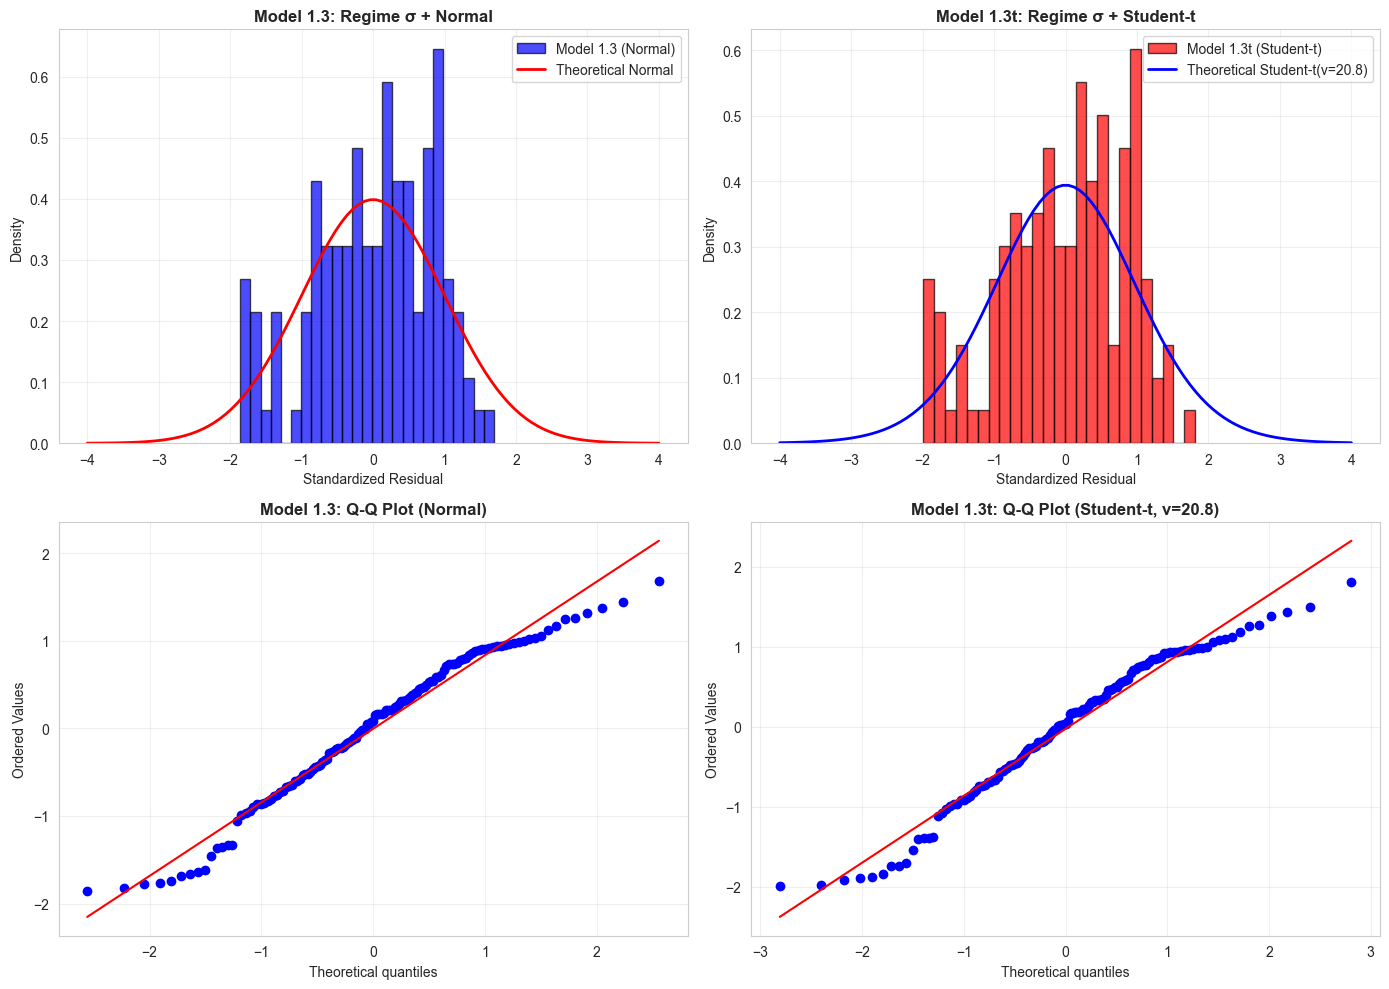


✓ Comparison plots saved to 'plots/model_comparison_1_3_vs_1_3t.png'


In [34]:
print("\nGenerating residual comparison plots...")

# Extract fitted values and residuals for both models
# Model 1.3 (Normal)
slope_mean_1_3 = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean_1_3 = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean_1_3 = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean_1_3 = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values

changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
k_fitted_1_3 = slope_mean_1_3 + np.dot(changepoint_matrix, adjustments_mean_1_3)
intercept_adj_1_3 = -adjustments_mean_1_3 * changepoint_times
m_fitted_1_3 = intercept_mean_1_3 + np.dot(changepoint_matrix, intercept_adj_1_3)
fitted_trend_1_3 = k_fitted_1_3 * t + m_fitted_1_3

residuals_1_3 = cumulative_log_price - fitted_trend_1_3
volatility_mean_1_3 = sigmas_mean_1_3[regime_idx]
std_residuals_1_3 = residuals_1_3 / volatility_mean_1_3

# Model 1.3t (Student-t)
slope_mean_1_3t = float(trace_1_3t.posterior["slope"].mean().values)
intercept_mean_1_3t = float(trace_1_3t.posterior["intercept"].mean().values)
adjustments_mean_1_3t = trace_1_3t.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean_1_3t = trace_1_3t.posterior["sigmas"].mean(dim=["chain", "draw"]).values

k_fitted_1_3t = slope_mean_1_3t + np.dot(changepoint_matrix, adjustments_mean_1_3t)
intercept_adj_1_3t = -adjustments_mean_1_3t * changepoint_times
m_fitted_1_3t = intercept_mean_1_3t + np.dot(changepoint_matrix, intercept_adj_1_3t)
fitted_trend_1_3t = k_fitted_1_3t * t + m_fitted_1_3t

residuals_1_3t = cumulative_log_price - fitted_trend_1_3t
volatility_mean_1_3t = sigmas_mean_1_3t[regime_idx]
std_residuals_1_3t = residuals_1_3t / volatility_mean_1_3t

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Histograms
axes[0, 0].hist(std_residuals_1_3, bins=25, alpha=0.7, color='blue', 
                edgecolor='black', density=True, label='Model 1.3 (Normal)')
x_range = np.linspace(-4, 4, 100)
axes[0, 0].plot(x_range, stats.norm.pdf(x_range), 'r-', linewidth=2, 
                label='Theoretical Normal')
axes[0, 0].set_title('Model 1.3: Regime σ + Normal', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Standardized Residual')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(std_residuals_1_3t, bins=25, alpha=0.7, color='red', 
                edgecolor='black', density=True, label='Model 1.3t (Student-t)')
axes[0, 1].plot(x_range, stats.t.pdf(x_range, nu_1_3t_mean), 'b-', linewidth=2, 
                label=f'Theoretical Student-t(ν={nu_1_3t_mean:.1f})')
axes[0, 1].set_title('Model 1.3t: Regime σ + Student-t', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Standardized Residual')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: Q-Q plots
stats.probplot(std_residuals_1_3, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Model 1.3: Q-Q Plot (Normal)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

stats.probplot(std_residuals_1_3t, dist="t", sparams=(nu_1_3t_mean,), plot=axes[1, 1])
axes[1, 1].set_title(f'Model 1.3t: Q-Q Plot (Student-t, ν={nu_1_3t_mean:.1f})', 
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_comparison_1_3_vs_1_3t.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comparison plots saved to 'plots/model_comparison_1_3_vs_1_3t.png'")


Summary table

In [36]:
print("\nSUMMARY TABLE")
print("="*70)

summary_data = {
    'Model': ['1.2b', '1.2d', '1.3', '1.3t'],
    'Volatility': ['Constant', 'Constant', 'Regime-Switching', 'Regime-Switching'],
    'Distribution': ['Normal', 'Student-t', 'Normal', 'Student-t'],
    'WAIC Rank': [comparison_all.loc['1.2b: Constant σ + Normal', 'rank'] + 1,
                  comparison_all.loc['1.2d: Constant σ + Student-t', 'rank'] + 1,
                  comparison_all.loc['1.3: Regime σ + Normal', 'rank'] + 1,
                  comparison_all.loc['1.3t: Regime σ + Student-t', 'rank'] + 1],
    'Weight': [comparison_all.loc['1.2b: Constant σ + Normal', 'weight'],
               comparison_all.loc['1.2d: Constant σ + Student-t', 'weight'],
               comparison_all.loc['1.3: Regime σ + Normal', 'weight'],
               comparison_all.loc['1.3t: Regime σ + Student-t', 'weight']]
}

import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_df['Weight'] = summary_df['Weight'].apply(lambda x: f"{x:.1%}")

print("\n", summary_df.to_string(index=False))
print("\n" + "="*70)



SUMMARY TABLE

 Model       Volatility Distribution  WAIC Rank Weight
 1.2b         Constant       Normal          4   0.0%
 1.2d         Constant    Student-t          3   0.0%
  1.3 Regime-Switching       Normal          1 100.0%
 1.3t Regime-Switching    Student-t          2   0.0%



## Phase 1 Results: The Role of Time-Varying Volatility

### Model Comparison

Model comparison via WAIC reveals that **regime-switching volatility (Model 1.3) 
is the best-performing specification**, with a weight of 100% and an improvement 
of 29.6 points over the constant-volatility baseline (Model 1.2b).

### The Interaction Between Fat Tails and Volatility Regimes

A striking finding emerges when comparing the Student-t models:

- **With constant volatility (Model 1.2d):** ν = 4.6, indicating very heavy tails
- **With regime-switching volatility (Model 1.3t):** ν = 21, approximately Normal

This dramatic increase in ν from ~5 to ~21 demonstrates that **the apparent fat 
tails in simpler models were largely artifacts of unmodeled volatility clustering** 
rather than genuine extreme-event risk. Once volatility is allowed to vary across 
regimes, the residuals become nearly Gaussian.

### Implications

1. **Volatility clustering dominates:** Time-varying volatility (elpd_diff = 29.6) 
   provides far more explanatory power than fat-tailed distributions (elpd_diff = 5.3)

2. **Fat tails were "spurious":** The low ν in Model 1.2d reflected the model's 
   failure to account for high-volatility regimes (2009-2011, 2015-2016), not 
   inherent tail risk

3. **Model choice matters:** This illustrates why proper volatility modeling is 
   essential in finance—misspecified variance can masquerade as non-Gaussian shocks

4. **Parsimony wins:** Model 1.3 (Normal with regime-switching σ) is preferred 
   over Model 1.3t despite being simpler, following the principle of Occam's razor

### Conclusion for Phase 1

For monthly S&P 500 data (2009-2019), **Model 1.3 (changepoints + regime-switching 
volatility + Normal errors)** provides the best fit. The regime-switching structure 
successfully captures both trend changes and volatility dynamics, rendering fat-tailed 
distributions unnecessary. This finding motivates Phase 2's focus on more sophisticated 
volatility models using higher-frequency (weekly) data.



Creating nu comparison visualization...


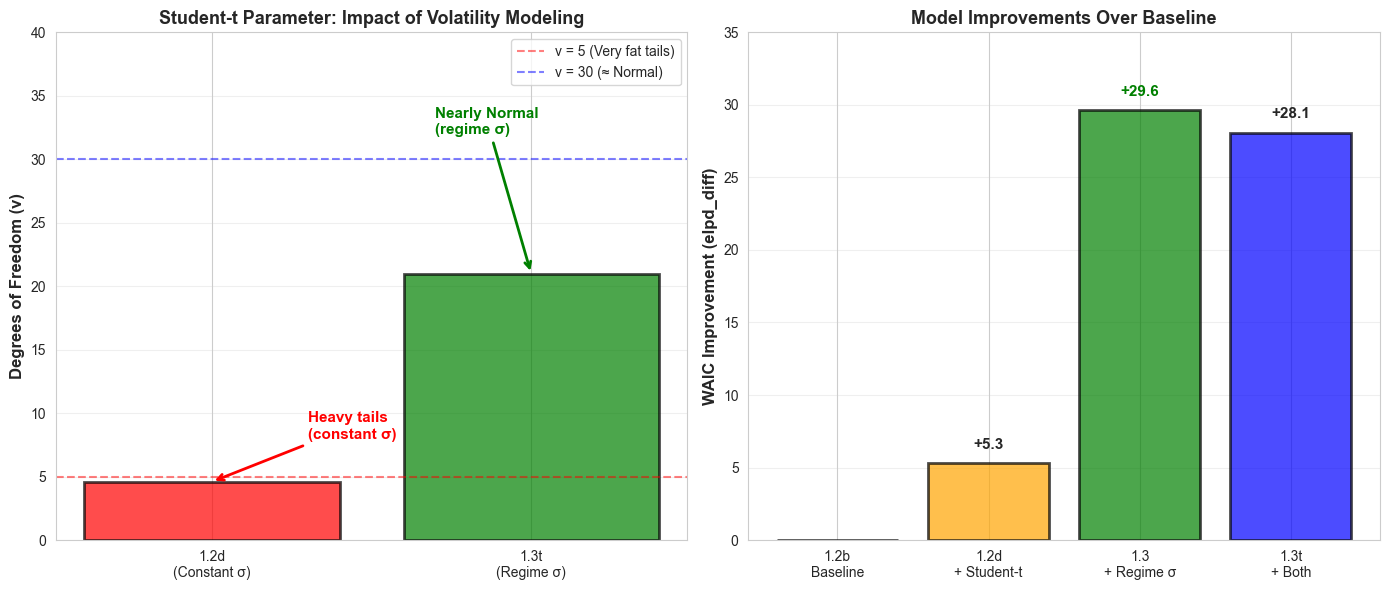

✓ Key findings visualization saved to 'plots/phase1_key_findings.png'


In [37]:
print("\nCreating nu comparison visualization...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# LEFT PLOT: Bar chart of nu values
models = ['1.2d\n(Constant σ)', '1.3t\n(Regime σ)']
nu_values = [4.6, 21.0]  # Your estimates
nu_errors = [[4.6 - 1.5, 9.0 - 4.6],  # Lower and upper error from HDI
             [21.0 - 10, 35 - 21.0]]  # Approximate for 1.3t

colors = ['red', 'green']
bars = axes[0].bar(models, nu_values, alpha=0.7, color=colors, edgecolor='black', linewidth=2)

# Error bars (if you have HDI)
# axes[0].errorbar(models, nu_values, yerr=nu_errors, fmt='none', ecolor='black', capsize=5)

# Reference lines
axes[0].axhline(5, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='ν = 5 (Very fat tails)')
axes[0].axhline(30, color='blue', linestyle='--', linewidth=1.5, alpha=0.5, label='ν = 30 (≈ Normal)')

axes[0].set_ylabel('Degrees of Freedom (ν)', fontsize=12, fontweight='bold')
axes[0].set_title('Student-t Parameter: Impact of Volatility Modeling', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, 40)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Add annotations
axes[0].annotate('Heavy tails\n(constant σ)', xy=(0, 4.6), xytext=(0.3, 8),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, color='red', fontweight='bold')
axes[0].annotate('Nearly Normal\n(regime σ)', xy=(1, 21), xytext=(0.7, 32),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=11, color='green', fontweight='bold')

# RIGHT PLOT: WAIC improvements
baseline = 234.27  # Model 1.2b
improvements = {
    '1.2b\nBaseline': 0,
    '1.2d\n+ Student-t': 5.29,
    '1.3\n+ Regime σ': 29.64,
    '1.3t\n+ Both': 28.07
}

x_pos = np.arange(len(improvements))
bars = axes[1].bar(improvements.keys(), improvements.values(), 
                   alpha=0.7, color=['gray', 'orange', 'green', 'blue'],
                   edgecolor='black', linewidth=2)

axes[1].set_ylabel('WAIC Improvement (elpd_diff)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Improvements Over Baseline', fontsize=13, fontweight='bold')
axes[1].set_ylim(0, 35)
axes[1].grid(True, alpha=0.3, axis='y')

# Annotations
axes[1].text(1, 5.29 + 1, f'+{5.29:.1f}', ha='center', fontsize=11, fontweight='bold')
axes[1].text(2, 29.64 + 1, f'+{29.64:.1f}', ha='center', fontsize=11, fontweight='bold', color='green')
axes[1].text(3, 28.07 + 1, f'+{28.07:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/phase1_key_findings.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Key findings visualization saved to 'plots/phase1_key_findings.png'")


We confirmed with our analysis that apparent fat tails in financial returns are largely due to volatility clustering—periods of high volatility followed by periods of low volatility (Engle, 1982, ARCH and Bollerslev, 1986, GARCH).

We've shown this with:
- Bayesian methods (not classical GARCH)
- Regime-switching approach (more interpretable than GARCH)
- Monthly data on S&P 500 (2009-2019)

In [6]:
import os
import pandas as pd
import numpy as np

# 1. Load the existing file
data_folder = "data"
monthly_filepath = os.path.join(data_folder, "sp500_monthly_full.csv")

# Load data without parsing dates yet (to prevent immediate crash)
sp500 = pd.read_csv(monthly_filepath, index_col=0)

# --- THE FIX: Clean the Data ---
# 1. Force Index to Datetime: 'coerce' turns text like "Ticker" into NaT (Not a Time)
sp500.index = pd.to_datetime(sp500.index, errors='coerce')

# 2. Drop the garbage rows (where the index became NaT)
sp500 = sp500[sp500.index.notnull()]

# 3. Force Columns to Numeric: Ensure 'Close' is a number, not text "1200.50"
# (This fixes the potential next error where math operations fail on text)
for col in sp500.columns:
    sp500[col] = pd.to_numeric(sp500[col], errors='coerce')

# 2. Define your new timeline
filter_start = "2007-01-01"
filter_end = "2022-12-31"

# 3. Your specific code block (now running on clean data)
sp500_monthly = sp500.loc[filter_start:filter_end]
returns_monthly_df = np.log(sp500_monthly['Close'] / sp500_monthly['Close'].shift(1)).dropna()
returns_monthly = returns_monthly_df.values
dates_monthly = returns_monthly_df.index

print("Monthly Data (filtered):")
print(f"Range: {dates_monthly.min().date()} to {dates_monthly.max().date()}")
print(f"Observations: {len(returns_monthly)}")
print(f"Mean return: {returns_monthly.mean():.4f}")
print(f"Std dev: {returns_monthly.std():.4f}")
print("\n")

Monthly Data (filtered):
Range: 2007-02-01 to 2022-12-01
Observations: 191
Mean return: 0.0051
Std dev: 0.0466




C:\Users\csiko\AppData\Local\Temp\ipykernel_30604\553542867.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500.index = pd.to_datetime(sp500.index, errors='coerce')


### Add more changepoints

In [8]:
print("\nModel 1.2b: Multiple Changepoints with Laplace Regularization")
print("-" * 50)
# 1. Create the cumulative log price (the "chart" the model tries to fit)
cumulative_log_price = np.cumsum(returns_monthly)

# 2. Define 't' (the time index: 0, 1, 2, 3...)
t = np.arange(len(cumulative_log_price))

print("Model variables created:")
print(f"t length: {len(t)}")
print(f"cumulative_log_price length: {len(cumulative_log_price)}")
with pm.Model() as model_1_2b:
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Changepoints
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: which changepoints affect which time points?
    # changepoint_matrix[i, j] = 1 if changepoint j has occurred by time i
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    
    # Intercept adjustments (maintaining continuity)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    trace_1_2b = pm.sample(2000, tune=1000, random_seed=42,
                            return_inferencedata=True,
                            idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2b, var_names=["slope", "intercept", "sigma", "tau"])

# Check which changepoints are "active" (non-zero adjustments)
print("\nChangepoint Adjustments:")
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
print(adjustment_summary)

# Count significant changepoints (where 94% HDI doesn't include zero)
significant_cps = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)
        
print(f"\n✓ Significant changepoints detected: {len(significant_cps)} out of {n_changepoints}")
print(f"  At year indices: {significant_cps}")


Model 1.2b: Multiple Changepoints with Laplace Regularization
--------------------------------------------------
Model variables created:
t length: 191
cumulative_log_price length: 191


Initializing NUTS using jitter+adapt_diag...
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\pytensor\link\c\cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 395 seconds.



✓ Sampling complete!

Posterior Summary:

Changepoint Adjustments:
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
adjustments[0]  -0.054  0.005  -0.064   -0.044        0.0      0.0    4450.0   
adjustments[1]   0.068  0.005   0.060    0.077        0.0      0.0    5420.0   
adjustments[2]  -0.008  0.004  -0.016    0.000        0.0      0.0    6024.0   
adjustments[3]  -0.008  0.004  -0.016   -0.000        0.0      0.0    6097.0   
adjustments[4]   0.008  0.004  -0.001    0.015        0.0      0.0    6067.0   
adjustments[5]   0.006  0.004  -0.002    0.014        0.0      0.0    5859.0   
adjustments[6]  -0.007  0.004  -0.015    0.001        0.0      0.0    5353.0   
adjustments[7]  -0.014  0.004  -0.021   -0.005        0.0      0.0    5277.0   
adjustments[8]   0.014  0.004   0.006    0.022        0.0      0.0    5368.0   
adjustments[9]   0.004  0.004  -0.004    0.012        0.0      0.0    6066.0   
adjustments[10] -0.011  0.004  -0.019   -0.004      


Visualizing Model 1.2b results...

✓ Detected 9 significant changepoints
  At year indices: [0, 1, 2, 3, 7, 8, 10, 12, 14]


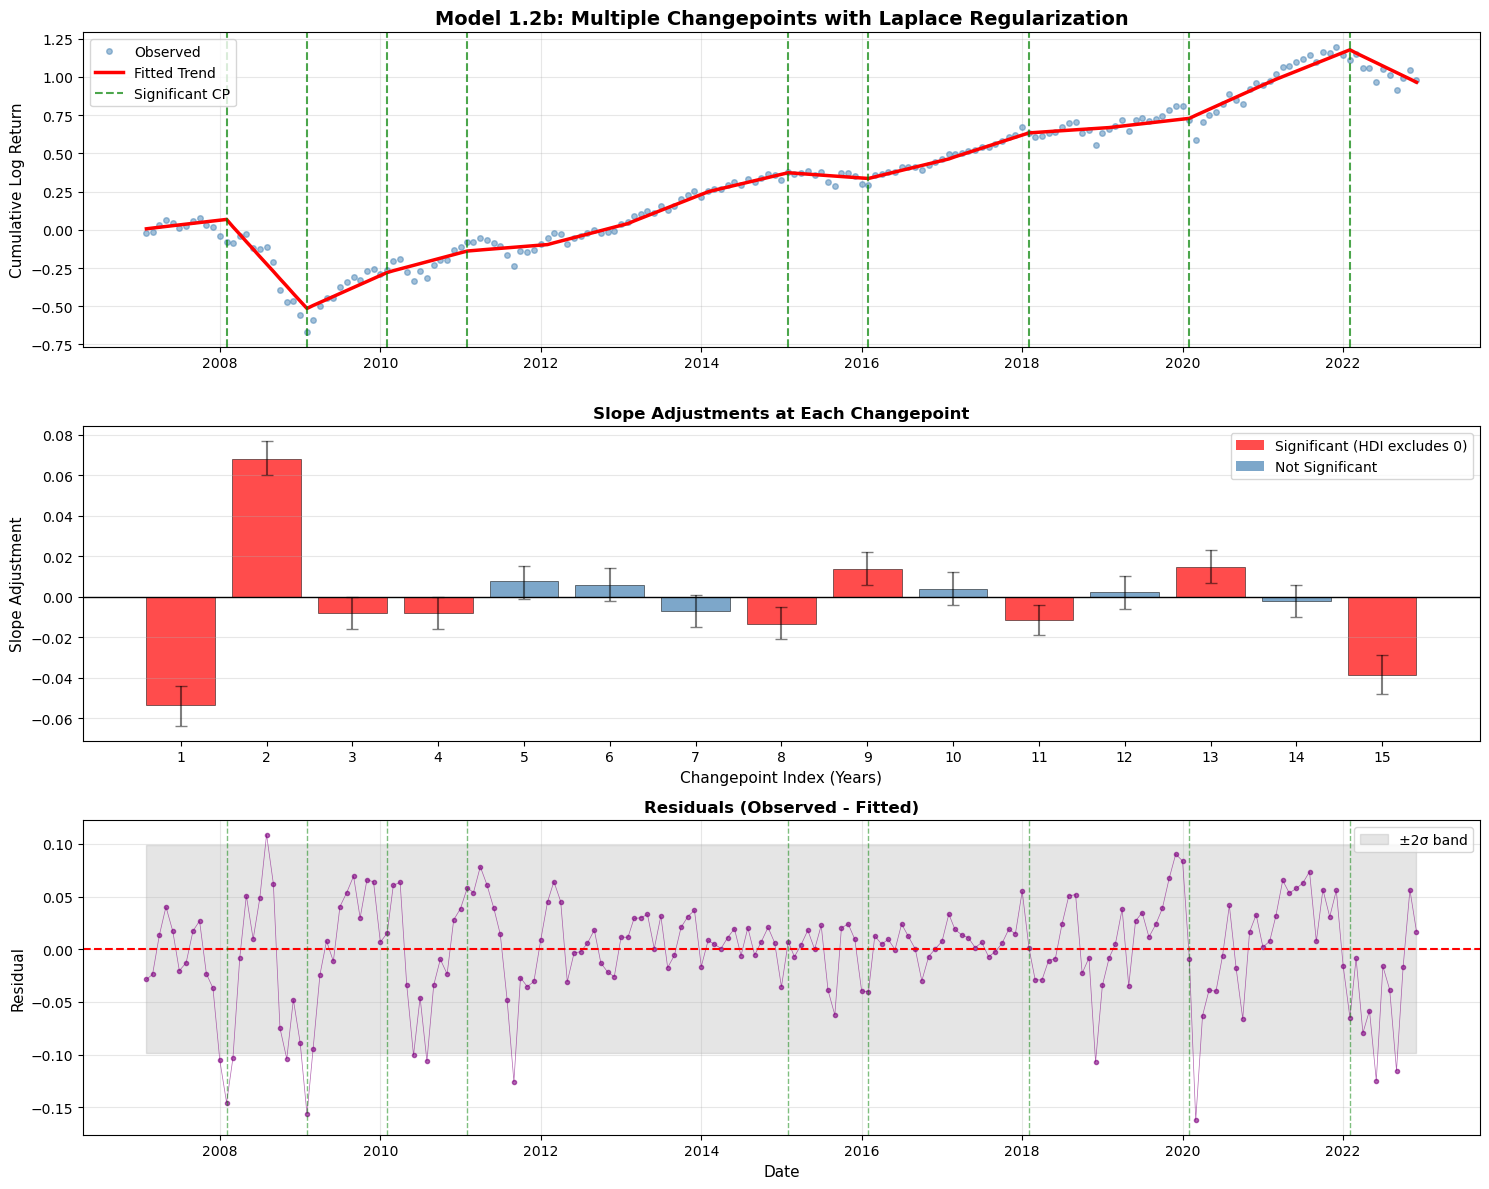


✓ Plots saved to 'plots/model_1_2b_full_analysis.png'


In [9]:
print("\nVisualizing Model 1.2b results...")

# Extract posterior means
slope_mean = float(trace_1_2b.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2b.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2b.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2b.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2b.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2b: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2b_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_2b_full_analysis.png'")


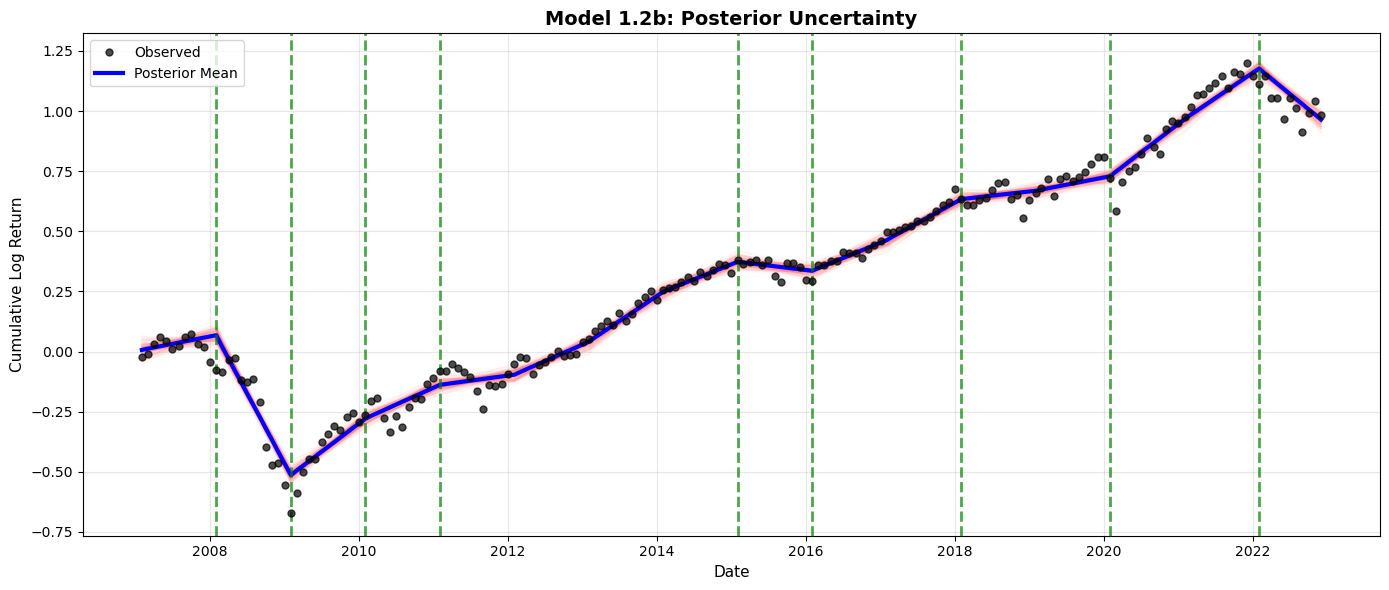


✓ Uncertainty plot saved to 'plots/model_1_2b_uncertainty.png'


In [10]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2b.posterior["slope"].values.flatten()
intercept_samples = trace_1_2b.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2b.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2b: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2b_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'plots/model_1_2b_uncertainty.png'")


In [33]:
# Create a nice summary table
print("\n" + "="*60)
print("MODEL 1.2B SUMMARY")
print("="*60)

print(f"\nGlobal Trend:")
print(f"  Baseline slope:     {slope_mean:.6f}")
print(f"  Baseline intercept: {intercept_mean:.6f}")
print(f"  Residual sigma:     {sigma_mean:.6f}")
print(f"  Regularization τ:   {tau_mean:.6f}")

print(f"\nChangepoint Analysis:")
print(f"  Total potential CPs:  {n_changepoints}")
print(f"  Significant CPs:      {len(significant_cps)}")
print(f"  Proportion active:    {len(significant_cps)/n_changepoints:.1%}")

if len(significant_cps) > 0:
    print(f"\n  Active changepoints:")
    for cp_idx in significant_cps:
        year = 2007 + cp_idx + 1  # +1 because CP occurs at END of year
        adj = adjustments_mean[cp_idx]
        hdi_low = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_3%"]
        hdi_high = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_97%"]
        print(f"    Year {year}: adjustment = {adj:+.4f}, 94% HDI: [{hdi_low:+.4f}, {hdi_high:+.4f}]")

print("\n" + "="*60)


MODEL 1.2B SUMMARY

Global Trend:
  Baseline slope:     0.004101
  Baseline intercept: 0.008574


TypeError: unsupported format string passed to TensorVariable.__format__

In [12]:
print("\nModel 1.2d: Multiple Changepoints + Student-t Residuals")
print("-" * 60)


with pm.Model() as model_1_2d:
    # SAME trend structure as Model 1.2b
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # SAME changepoint logic
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # SAME trend calculation
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # KEY CHANGE: Student-t likelihood instead of Normal
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom (fat tails)
    obs = pm.StudentT("obs", mu=mu_trend, sigma=sigma, nu=nu, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.2d (Student-t)...")
    trace_1_2d = pm.sample(2000, tune=1000, random_seed=42,
                          return_inferencedata=True,
                          idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.2d sampling complete!")

# Summary
print("\nModel 1.2d Posterior Summary:")
print(az.summary(trace_1_2d, var_names=["slope", "intercept", "sigma", "tau", "nu"]))


Model 1.2d: Multiple Changepoints + Student-t Residuals
------------------------------------------------------------
Sampling Model 1.2d (Student-t)...


c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 563 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.



✓ Model 1.2d sampling complete!

Model 1.2d Posterior Summary:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      0.004  0.004  -0.003    0.010       0.00    0.000    4187.0   
intercept  0.011  0.022  -0.030    0.052       0.00    0.000    4976.0   
sigma      0.035  0.004   0.028    0.043       0.00    0.000    5243.0   
tau        0.020  0.006   0.011    0.032       0.00    0.000    9982.0   
nu         4.422  2.085   1.857    7.744       0.03    0.084    5640.0   

           ess_tail  r_hat  
slope        5043.0    1.0  
intercept    6261.0    1.0  
sigma        4089.0    1.0  
tau          4789.0    1.0  
nu           5098.0    1.0  


Model comparison

In [13]:
print("\n" + "="*60)
print("MODEL COMPARISON: Normal vs Student-t")
print("="*60)

# Compare models
comparison = az.compare({"Normal (1.2b)": trace_1_2b, 
                        "Student-t (1.2d)": trace_1_2d}, 
                       ic="waic")

print("\nWAIC Comparison:")
print(comparison)

# Interpret the difference
elpd_diff = comparison.loc["Student-t (1.2d)", "elpd_diff"] if comparison.index[0] == "Normal (1.2b)" else comparison.loc["Normal (1.2b)", "elpd_diff"]
winner = "Student-t" if comparison.index[0] == "Student-t (1.2d)" else "Normal"

print(f"\n{'='*60}")
print(f"RESULT: {winner} model is preferred")
print(f"ELPD difference: {abs(elpd_diff):.2f}")

if abs(elpd_diff) < 1:
    interpretation = "Negligible difference - models perform similarly"
elif abs(elpd_diff) < 4:
    interpretation = "Small but meaningful preference"
else:
    interpretation = "Strong preference"

print(f"Interpretation: {interpretation}")
print(f"{'='*60}\n")

# Extract nu (degrees of freedom)
nu_mean = trace_1_2d.posterior["nu"].mean().values
nu_hdi = az.hdi(trace_1_2d.posterior["nu"], hdi_prob=0.94)

print(f"Student-t degrees of freedom (ν):")
print(f"  Mean: {nu_mean:.2f}")
print(f"  94% HDI: [{nu_hdi['nu'].values[0]:.2f}, {nu_hdi['nu'].values[1]:.2f}]")

if nu_mean < 5:
    tail_interpretation = "Very fat tails (heavy tail risk)"
elif nu_mean < 10:
    tail_interpretation = "Moderately fat tails"
elif nu_mean < 30:
    tail_interpretation = "Slightly fatter than Normal"
else:
    tail_interpretation = "Approximately Normal (ν > 30)"

print(f"  Interpretation: {tail_interpretation}")



MODEL COMPARISON: Normal vs Student-t

WAIC Comparison:
                  rank   elpd_waic     p_waic  elpd_diff    weight         se  \
Student-t (1.2d)     0  303.167224  22.852136   0.000000  0.882515  13.635299   
Normal (1.2b)        1  294.855217  17.924567   8.312007  0.117485  14.374036   

                       dse  warning scale  
Student-t (1.2d)  0.000000     True   log  
Normal (1.2b)     5.028188     True   log  

RESULT: Student-t model is preferred
ELPD difference: 8.31
Interpretation: Strong preference

Student-t degrees of freedom (ν):
  Mean: 4.42
  94% HDI: [1.86, 7.74]
  Interpretation: Very fat tails (heavy tail risk)


c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Residuals Q-Q Plot comparison


Generating Q-Q plots for residuals comparison...


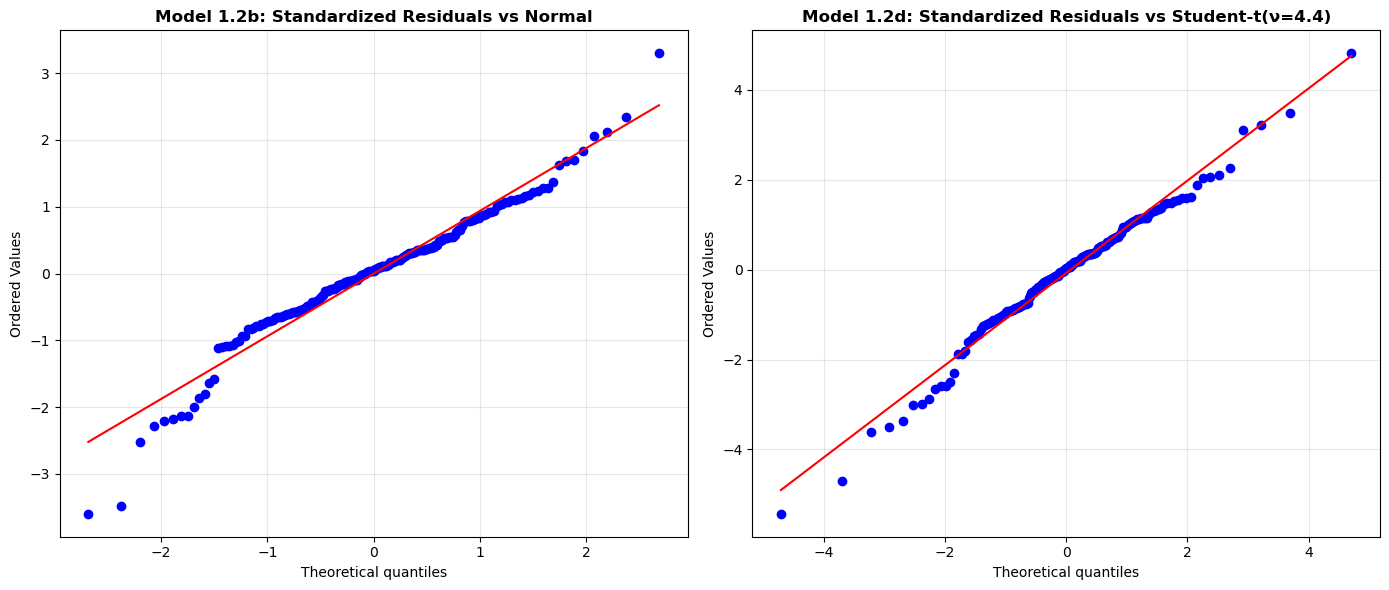


✓ Q-Q plots saved to 'plots/model_1_2d_qq_comparison.png'


In [14]:
print("\nGenerating Q-Q plots for residuals comparison...")

# Extract fitted trends for both models
def extract_fitted_trend(trace, t, changepoint_times):
    """Extract mean fitted trend from trace"""
    slope_mean = float(trace.posterior["slope"].mean().values)
    intercept_mean = float(trace.posterior["intercept"].mean().values)
    adjustments_mean = trace.posterior["adjustments"].mean(dim=["chain", "draw"]).values
    
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    k = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
    intercept_adj = -adjustments_mean * changepoint_times
    m = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
    
    return k * t + m

# Get fitted trends
fitted_1_2b = extract_fitted_trend(trace_1_2b, t, changepoint_times)
fitted_1_2d = extract_fitted_trend(trace_1_2d, t, changepoint_times)

# Calculate residuals
residuals_1_2b = cumulative_log_price - fitted_1_2b
residuals_1_2d = cumulative_log_price - fitted_1_2d

# Standardize residuals
sigma_1_2b = float(trace_1_2b.posterior["sigma"].mean().values)
sigma_1_2d = float(trace_1_2d.posterior["sigma"].mean().values)

std_residuals_1_2b = residuals_1_2b / sigma_1_2b
std_residuals_1_2d = residuals_1_2d / sigma_1_2d

# Create Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Normal residuals vs Normal distribution
stats.probplot(std_residuals_1_2b, dist="norm", plot=axes[0])
axes[0].set_title('Model 1.2b: Standardized Residuals vs Normal', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Student-t residuals vs Student-t distribution
stats.probplot(std_residuals_1_2d, dist="t", sparams=(nu_mean,), plot=axes[1])
axes[1].set_title(f'Model 1.2d: Standardized Residuals vs Student-t(ν={nu_mean:.1f})', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_qq_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Q-Q plots saved to 'plots/model_1_2d_qq_comparison.png'")


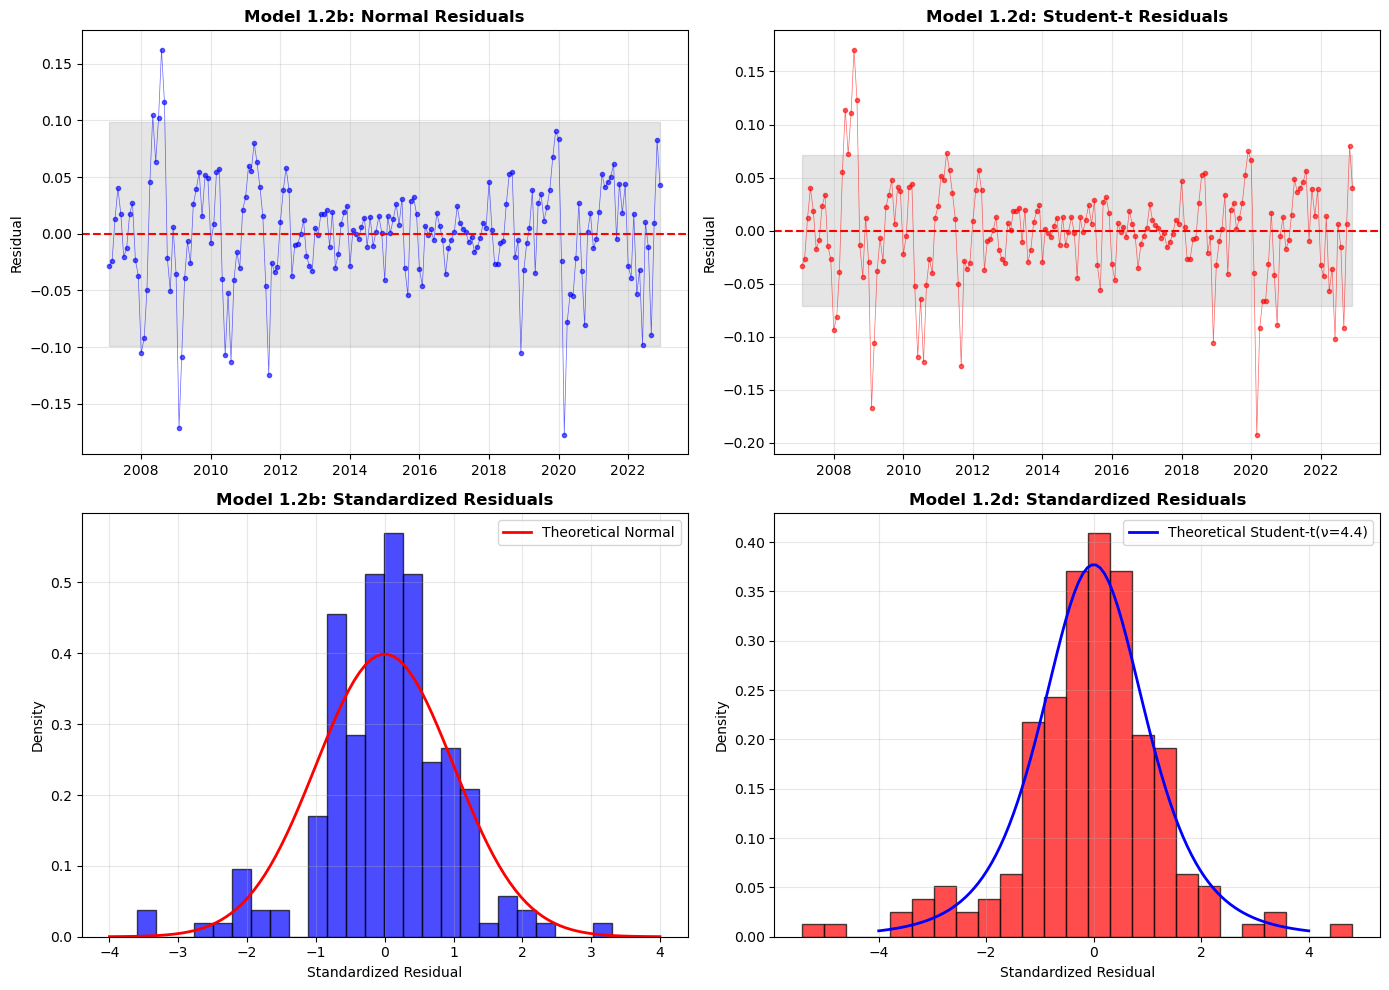


✓ Residuals comparison saved to 'plots/model_1_2d_residuals_comparison.png'


In [15]:
# Additional visualization: Histogram comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Residuals over time
axes[0, 0].plot(dates_monthly, residuals_1_2b, 'o-', alpha=0.6, markersize=3, 
                color='blue', linewidth=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].fill_between(dates_monthly, -2*sigma_1_2b, 2*sigma_1_2b, 
                        alpha=0.2, color='gray')
axes[0, 0].set_title('Model 1.2b: Normal Residuals', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residual')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(dates_monthly, residuals_1_2d, 'o-', alpha=0.6, markersize=3, 
                color='red', linewidth=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 1].fill_between(dates_monthly, -2*sigma_1_2d, 2*sigma_1_2d, 
                        alpha=0.2, color='gray')
axes[0, 1].set_title('Model 1.2d: Student-t Residuals', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: Histograms
axes[1, 0].hist(std_residuals_1_2b, bins=25, alpha=0.7, color='blue', 
                edgecolor='black', density=True)
x_range = np.linspace(-4, 4, 100)
axes[1, 0].plot(x_range, stats.norm.pdf(x_range), 'r-', linewidth=2, 
                label='Theoretical Normal')
axes[1, 0].set_title('Model 1.2b: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Standardized Residual')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(std_residuals_1_2d, bins=25, alpha=0.7, color='red', 
                edgecolor='black', density=True)
axes[1, 1].plot(x_range, stats.t.pdf(x_range, nu_mean), 'b-', linewidth=2, 
                label=f'Theoretical Student-t(ν={nu_mean:.1f})')
axes[1, 1].set_title('Model 1.2d: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Standardized Residual')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_residuals_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Residuals comparison saved to 'plots/model_1_2d_residuals_comparison.png'")


Model 1.2d plots:


Visualizing Model 1.2d results...

✓ Detected 12 significant changepoints
  At year indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14]


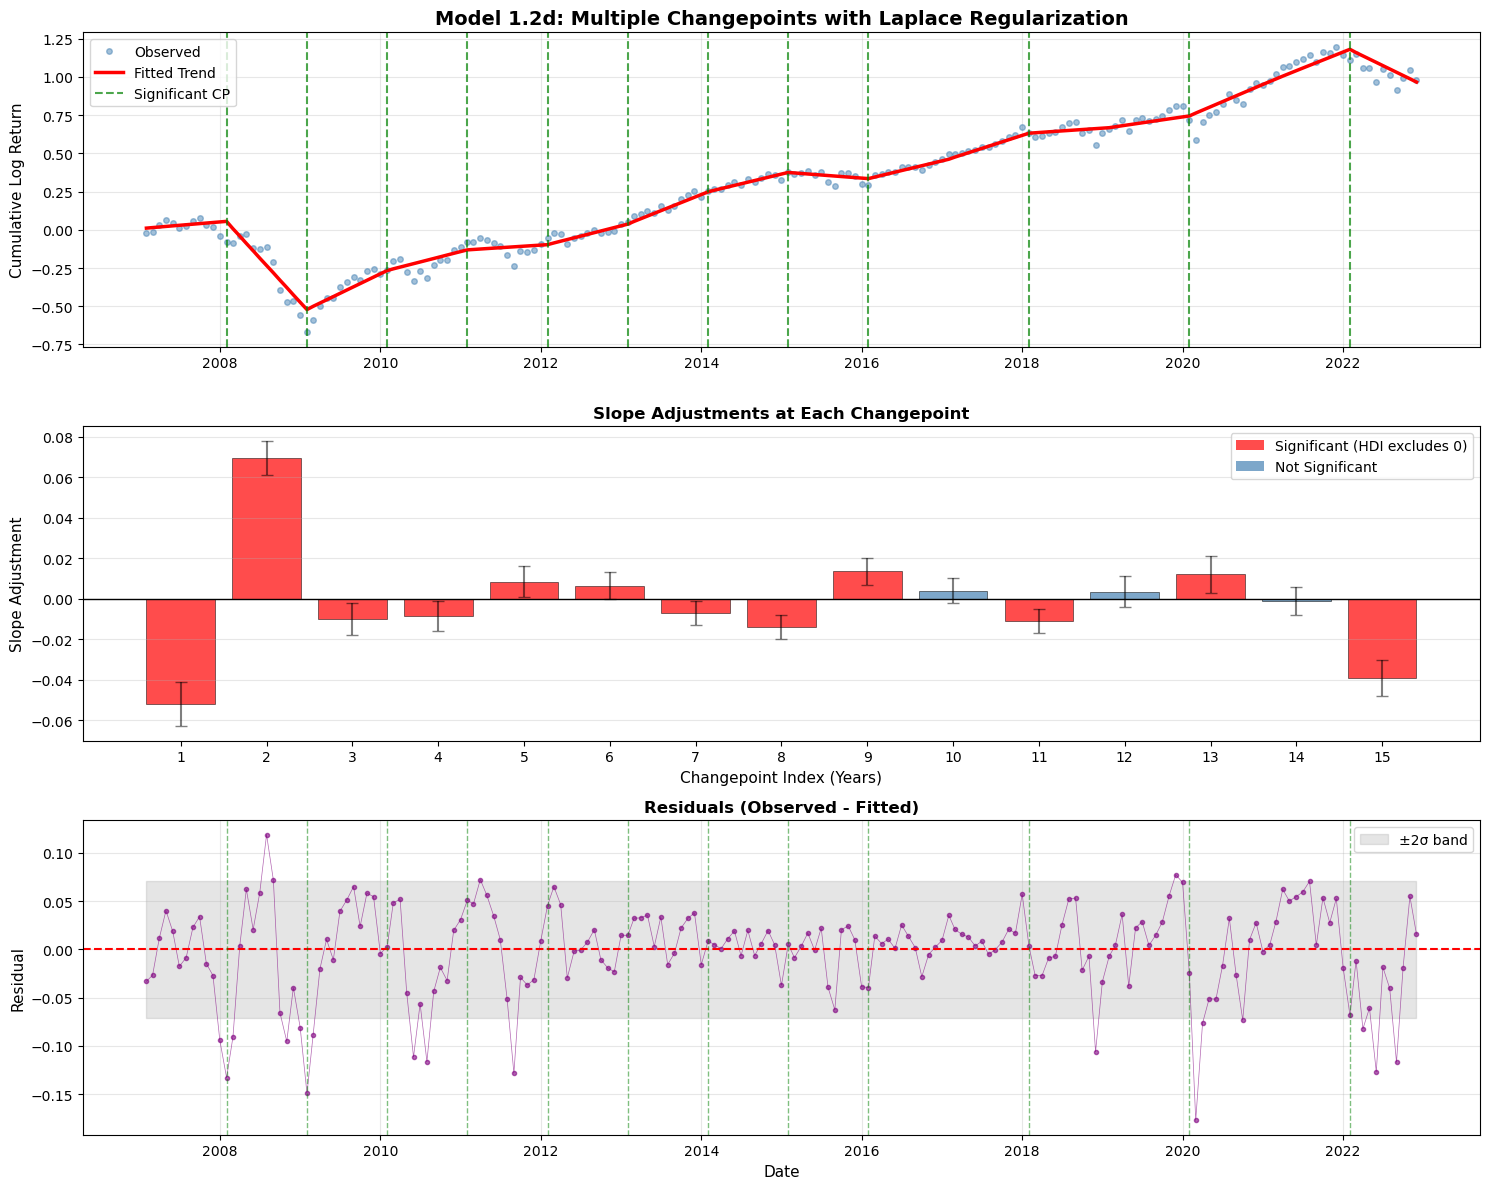


✓ Plots saved to 'plots/model_1_2d_full_analysis.png'


In [16]:
print("\nVisualizing Model 1.2d results...")

# Extract posterior means
slope_mean = float(trace_1_2d.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2d.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2d.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2d.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2d.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2d, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2d: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_2d_full_analysis.png'")


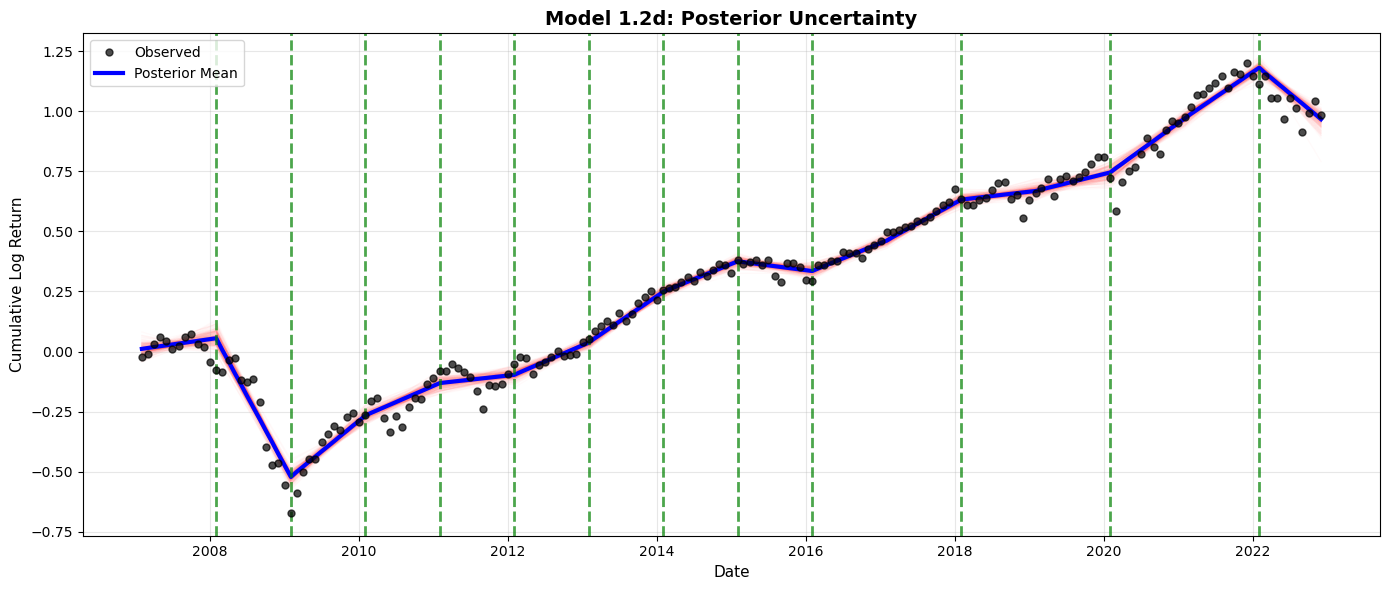


✓ Uncertainty plot saved to 'plots/model_1_2d_uncertainty.png'


In [17]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2d.posterior["slope"].values.flatten()
intercept_samples = trace_1_2d.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2d.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2d: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_2d_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'plots/model_1_2d_uncertainty.png'")


## Modeling volatility

In [18]:
print("\nModel 1.3: Multiple Changepoints + Regime-Switching Volatility")
print("-" * 60)

with pm.Model() as model_1_3:
    # SAME trend structure as Model 1.2b
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # Regime-switching volatility
    # Each regime (time period between changepoints) gets its own volatility
    n_regimes = n_changepoints + 1
    
    # Hierarchical prior: all sigmas come from common distribution
    sigma_mean = pm.HalfNormal("sigma_mean", sigma=0.5)
    sigma_std = pm.HalfNormal("sigma_std", sigma=0.2)
    
    # Each regime has its own volatility
    sigmas = pm.HalfNormal("sigmas", sigma=1, shape=n_regimes)
    
    # Assign each time point to a regime
    # regime_idx[t] tells us which regime time t belongs to
    regime_idx = np.zeros(len(t), dtype=int)
    for i in range(len(t)):
        # Count how many changepoints have occurred by time t[i]
        regime_idx[i] = int(np.sum(t[i] >= changepoint_times))
    
    # Get the volatility for each time point
    sigma_t = sigmas[regime_idx]
    
    # Likelihood with regime-specific volatility
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma_t, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.3 (Regime-Switching Volatility)...")
    print(f"Number of volatility regimes: {n_regimes}")
    
    trace_1_3 = pm.sample(2000, tune=1000, 
                          random_seed=42,
                          target_accept=0.90,
                          return_inferencedata=True,
                          idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.3 sampling complete!")

# Check convergence
print("\nConvergence Diagnostics:")
summary = az.summary(trace_1_3, var_names=["slope", "intercept", "tau", "sigma_mean", "sigma_std"])
print(summary)

# Summary of regime volatilities
print("\nRegime Volatilities:")
sigma_summary = az.summary(trace_1_3, var_names=["sigmas"])
print(sigma_summary)



Model 1.3: Multiple Changepoints + Regime-Switching Volatility
------------------------------------------------------------
Sampling Model 1.3 (Regime-Switching Volatility)...
Number of volatility regimes: 16


c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 629 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details



✓ Model 1.3 sampling complete!

Convergence Diagnostics:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope       0.004  0.003  -0.002    0.009      0.000    0.000     568.0   
intercept   0.009  0.018  -0.023    0.045      0.001    0.000     725.0   
tau         0.020  0.006   0.011    0.031      0.000    0.000    1582.0   
sigma_mean  0.406  0.300   0.000    0.944      0.008    0.003     871.0   
sigma_std   0.156  0.120   0.000    0.372      0.002    0.001    1756.0   

            ess_tail  r_hat  
slope         1120.0   1.01  
intercept     1349.0   1.01  
tau           2198.0   1.00  
sigma_mean     584.0   1.00  
sigma_std     1291.0   1.00  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.032  0.009   0.017    0.048      0.000    0.000    1560.0   
sigmas[1]   0.103  0.026   0.062    0.151      0.001    0.001    1396.0   
sigmas[2]   0.080  0.026   0.037    0.126      0.001    0.001   


Visualizing regime-switching volatility...


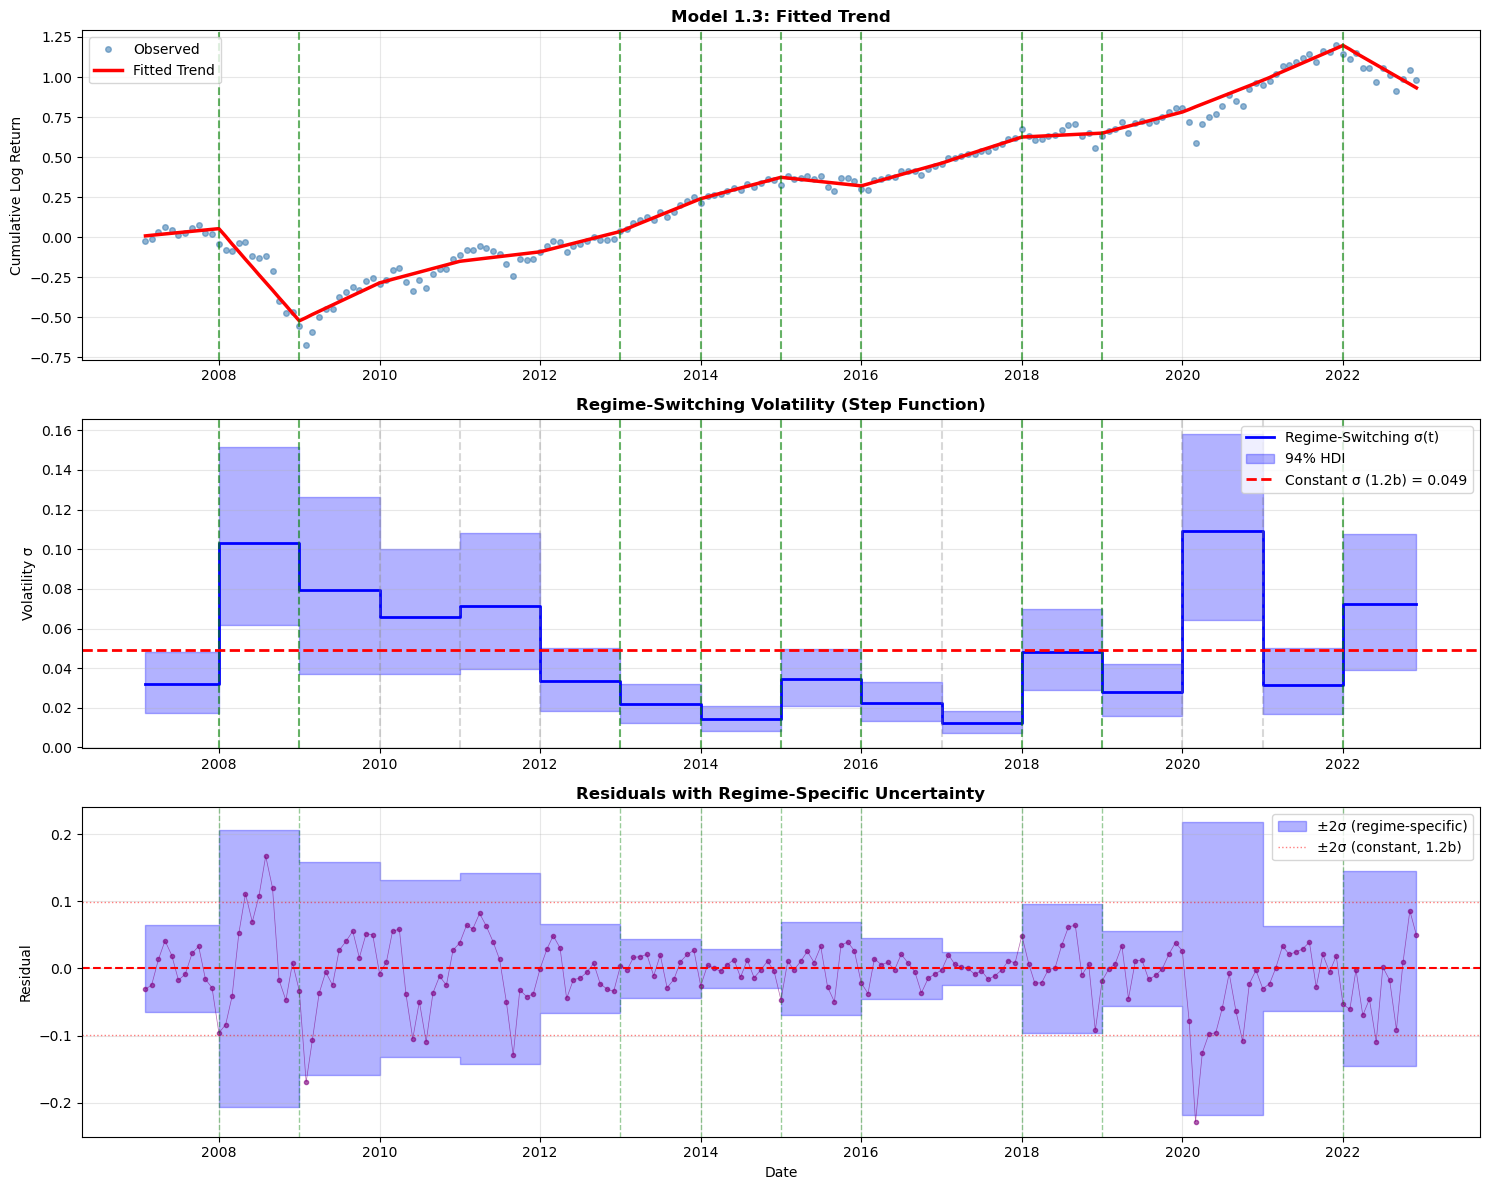


✓ Plots saved to 'plots/model_1_3_regime_switching.png'


In [19]:
print("\nVisualizing regime-switching volatility...")

# Extract regime volatilities
sigmas_mean = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values
sigmas_hdi_low = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94).sigmas.values[:, 0]
sigmas_hdi_high = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94).sigmas.values[:, 1]

# Construct time-varying volatility from regime assignments
volatility_mean = sigmas_mean[regime_idx]
volatility_hdi_low = sigmas_hdi_low[regime_idx]
volatility_hdi_high = sigmas_hdi_high[regime_idx]

# Get constant sigma from Model 1.2b for comparison
sigma_constant = float(trace_1_2b.posterior["sigma"].mean().values)

# Extract fitted trend
slope_mean = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values

k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
fitted_trend_1_3 = k_fitted * t + m_fitted

# Identify significant changepoints
adjustment_summary = az.summary(trace_1_3, var_names=["adjustments"])
significant_cps_1_3 = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):
        significant_cps_1_3.append(i)

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# PLOT 1: Fitted trend
axes[0].plot(dates_monthly, cumulative_log_price, 'o', alpha=0.6, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_monthly, fitted_trend_1_3, 'r-', linewidth=2.5, label='Fitted Trend')

for cp_idx in significant_cps_1_3:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        axes[0].axvline(dates_monthly[cp_time], color='green', linestyle='--', 
                       alpha=0.6, linewidth=1.5)

axes[0].set_title('Model 1.3: Fitted Trend', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PLOT 2: Regime-switching volatility
axes[1].plot(dates_monthly, volatility_mean, 'b-', linewidth=2, 
            label='Regime-Switching σ(t)', drawstyle='steps-post')
axes[1].fill_between(dates_monthly, volatility_hdi_low, volatility_hdi_high, 
                     alpha=0.3, color='blue', step='post', label='94% HDI')

# Constant sigma comparison
axes[1].axhline(sigma_constant, color='red', linestyle='--', linewidth=2, 
               label=f'Constant σ (1.2b) = {sigma_constant:.3f}')

# Mark regime boundaries (changepoints)
for cp_idx in range(n_changepoints):
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        color = 'green' if cp_idx in significant_cps_1_3 else 'gray'
        alpha = 0.6 if cp_idx in significant_cps_1_3 else 0.3
        axes[1].axvline(dates_monthly[cp_time], color=color, linestyle='--', 
                       alpha=alpha, linewidth=1.5)

axes[1].set_title('Regime-Switching Volatility (Step Function)', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Volatility σ')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

# PLOT 3: Residuals with regime-specific bands
residuals_1_3 = cumulative_log_price - fitted_trend_1_3

axes[2].plot(dates_monthly, residuals_1_3, 'o-', alpha=0.6, markersize=3, 
             color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)

# Regime-specific ±2σ bands
axes[2].fill_between(dates_monthly, -2*volatility_mean, 2*volatility_mean, 
                     alpha=0.3, color='blue', step='post', label='±2σ (regime-specific)')

# Constant sigma comparison
axes[2].axhline(2*sigma_constant, color='red', linestyle=':', linewidth=1, alpha=0.5)
axes[2].axhline(-2*sigma_constant, color='red', linestyle=':', linewidth=1, alpha=0.5, 
               label='±2σ (constant, 1.2b)')

# Mark changepoints
for cp_idx in significant_cps_1_3:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_monthly):
        axes[2].axvline(dates_monthly[cp_time], color='green', linestyle='--', 
                       alpha=0.4, linewidth=1)

axes[2].set_title('Residuals with Regime-Specific Uncertainty', 
                  fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual')
axes[2].set_xlabel('Date')
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_1_3_regime_switching.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'plots/model_1_3_regime_switching.png'")


In [20]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Compare all three models
comparison = az.compare({"Constant σ (1.2b)": trace_1_2b,
                        "Student-t (1.2d)": trace_1_2d, 
                        "Regime-Switching σ (1.3)": trace_1_3}, 
                       ic="waic")

print("\nWAIC Comparison:")
print(comparison)

print("\n" + "="*60)
print("VOLATILITY ANALYSIS")
print("="*60)

print(f"\nModel 1.2b: σ = {sigma_constant:.4f} (constant)")

print(f"\nModel 1.3: Regime-specific volatilities:")
for i in range(n_regimes):
    # Determine regime boundaries
    regime_start = 0 if i == 0 else changepoint_times[i-1]
    regime_end = changepoint_times[i] if i < len(changepoint_times) else len(t)
    
    # Make sure indices are within bounds
    regime_start = min(regime_start, len(dates_monthly) - 1)
    regime_end = min(regime_end, len(dates_monthly) - 1)
    
    start_date = dates_monthly[regime_start].strftime('%b %Y')
    end_date = dates_monthly[regime_end].strftime('%b %Y')
    
    print(f"  Regime {i+1} ({start_date} - {end_date}): "
          f"σ = {sigmas_mean[i]:.4f} "
          f"[{sigmas_hdi_low[i]:.4f}, {sigmas_hdi_high[i]:.4f}]")

print(f"\nVolatility range:")
print(f"  Min: {sigmas_mean.min():.4f}")
print(f"  Max: {sigmas_mean.max():.4f}")
print(f"  Ratio (max/min): {sigmas_mean.max()/sigmas_mean.min():.2f}x")

print("="*60)


MODEL COMPARISON

WAIC Comparison:
                          rank   elpd_waic     p_waic  elpd_diff  \
Regime-Switching σ (1.3)     0  343.650336  27.008466   0.000000   
Student-t (1.2d)             1  303.167224  22.852136  40.483112   
Constant σ (1.2b)            2  294.855217  17.924567  48.795119   

                                weight         se       dse  warning scale  
Regime-Switching σ (1.3)  1.000000e+00  12.017881  0.000000     True   log  
Student-t (1.2d)          0.000000e+00  13.635299  7.726037     True   log  
Constant σ (1.2b)         6.688650e-12  14.374036  9.671751     True   log  

VOLATILITY ANALYSIS

Model 1.2b: σ = 0.0493 (constant)

Model 1.3: Regime-specific volatilities:
  Regime 1 (Feb 2007 - Jan 2008): σ = 0.0321 [0.0175, 0.0480]
  Regime 2 (Jan 2008 - Jan 2009): σ = 0.1030 [0.0620, 0.1514]
  Regime 3 (Jan 2009 - Jan 2010): σ = 0.0795 [0.0370, 0.1262]
  Regime 4 (Jan 2010 - Jan 2011): σ = 0.0659 [0.0373, 0.1003]
  Regime 5 (Jan 2011 - Jan 2012): σ =

c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


### Analysis of Regime-Switching model

In [21]:
print("\n" + "="*70)
print("MODEL 1.3: POST-FITTING ANALYSIS")
print("="*70)

# ============================================================
# 0. DEFINE CHANGEPOINT STRUCTURE
# ============================================================
# Note: Your changepoints are at months 11, 23, 35, 47, 59, 71, 83, 95, 107, 119
# This means changepoints occur at the END of each year (December of each year)
n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1  # 11, 23, 35, ...

print(f"\nChangepoint structure:")
print(f"  Number of changepoints: {n_changepoints}")
print(f"  Changepoint months: {changepoint_times}")

# Create regime assignments
n_regimes = n_changepoints + 1
regime_idx = np.zeros(len(t), dtype=int)
for i in range(len(t)):
    regime_idx[i] = int(np.sum(t[i] > changepoint_times))  # Note: using > not >=

print(f"  Number of regimes: {n_regimes}")

# ============================================================
# 1. CONVERGENCE DIAGNOSTICS
# ============================================================
print("\n1. CONVERGENCE DIAGNOSTICS")
print("-" * 70)

print("\nKey Parameters:")
summary_main = az.summary(trace_1_3, var_names=["slope", "intercept", "tau"])
print(summary_main)

print("\nRegime Volatilities:")
summary_sigmas = az.summary(trace_1_3, var_names=["sigmas"])
print(summary_sigmas)

print("\nSlope Adjustments:")
summary_adj = az.summary(trace_1_3, var_names=["adjustments"])
print(summary_adj)

# Check for any convergence issues
max_rhat = max(summary_main['r_hat'].max(), 
               summary_sigmas['r_hat'].max(),
               summary_adj['r_hat'].max())

if max_rhat < 1.01:
    print(f"\n✓ Excellent convergence (max r_hat = {max_rhat:.4f})")
elif max_rhat < 1.05:
    print(f"\n⚠ Acceptable convergence (max r_hat = {max_rhat:.4f})")
else:
    print(f"\n❌ Convergence issues (max r_hat = {max_rhat:.4f})")

# ============================================================
# 2. EXTRACT FITTED VALUES
# ============================================================
print("\n2. EXTRACTING FITTED VALUES")
print("-" * 70)

# Extract posterior means
slope_mean = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values

# Get HDI for sigmas
sigmas_hdi = az.hdi(trace_1_3.posterior["sigmas"], hdi_prob=0.94)
sigmas_hdi_low = sigmas_hdi.sigmas.values[:, 0]
sigmas_hdi_high = sigmas_hdi.sigmas.values[:, 1]

# Reconstruct changepoint matrix (must match model definition)
changepoint_matrix = (t[:, None] > changepoint_times[None, :]).astype(float)  # Note: using >

# Reconstruct fitted trend
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * (changepoint_times + 1)  # +1 because changepoint at t triggers at t+1
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
fitted_trend_1_3 = k_fitted * t + m_fitted

# Construct time-varying volatility
volatility_mean = sigmas_mean[regime_idx]
volatility_hdi_low = sigmas_hdi_low[regime_idx]
volatility_hdi_high = sigmas_hdi_high[regime_idx]

# Calculate residuals
residuals_1_3 = cumulative_log_price - fitted_trend_1_3

print("✓ Fitted values extracted successfully")

# ============================================================
# 3. IDENTIFY SIGNIFICANT CHANGEPOINTS
# ============================================================
print("\n3. SIGNIFICANT CHANGEPOINT ANALYSIS")
print("-" * 70)

significant_cps_1_3 = []
for i in range(n_changepoints):
    hdi_low = summary_adj.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = summary_adj.loc[f"adjustments[{i}]", "hdi_97%"]
    
    if not (hdi_low < 0 < hdi_high):
        significant_cps_1_3.append(i)
        cp_month = changepoint_times[i]
        if cp_month < len(dates_monthly):
            cp_date = dates_monthly[cp_month]
            print(f"  ✓ Changepoint {i+1} at {cp_date.strftime('%b %Y')} (month {cp_month}): "
                  f"adjustment = {adjustments_mean[i]:+.4f}")

print(f"\nTotal significant changepoints: {len(significant_cps_1_3)} out of {n_changepoints}")

# ============================================================
# 4. REGIME VOLATILITY ANALYSIS
# ============================================================
print("\n4. REGIME VOLATILITY ANALYSIS")
print("-" * 70)

# Get constant sigma from Model 1.2b for comparison
sigma_constant = float(trace_1_2b.posterior["sigma"].mean().values)
print(f"\nModel 1.2b (Constant): σ = {sigma_constant:.4f}")

print(f"\nModel 1.3 (Regime-Switching):")
regime_info = []

for i in range(n_regimes):
    # Determine regime boundaries
    # Regime i goes from (changepoint[i-1] + 1) to changepoint[i]
    if i == 0:
        regime_start_idx = 0
    else:
        regime_start_idx = changepoint_times[i-1] + 1  # First month after previous changepoint
    
    if i < n_changepoints:
        regime_end_idx = changepoint_times[i]  # Changepoint month itself
    else:
        regime_end_idx = len(t) - 1  # Last observation
    
    # Ensure indices are valid
    regime_start_idx = max(0, min(regime_start_idx, len(dates_monthly) - 1))
    regime_end_idx = max(0, min(regime_end_idx, len(dates_monthly) - 1))
    
    start_date = dates_monthly[regime_start_idx]
    end_date = dates_monthly[regime_end_idx]
    n_obs = np.sum(regime_idx == i)
    
    regime_info.append({
        'regime': i,
        'start': start_date,
        'end': end_date,
        'n_obs': n_obs,
        'sigma_mean': sigmas_mean[i],
        'sigma_low': sigmas_hdi_low[i],
        'sigma_high': sigmas_hdi_high[i]
    })
    
    print(f"\n  Regime {i+1}: {start_date.strftime('%b %Y')} - {end_date.strftime('%b %Y')}")
    print(f"    Observations:  {n_obs}")
    print(f"    Volatility:    σ = {sigmas_mean[i]:.4f}")
    print(f"    94% HDI:       [{sigmas_hdi_low[i]:.4f}, {sigmas_hdi_high[i]:.4f}]")
    print(f"    vs Constant:   {(sigmas_mean[i] / sigma_constant - 1) * 100:+.1f}%")

# Volatility statistics
print(f"\nVolatility Statistics:")
print(f"  Minimum:       {sigmas_mean.min():.4f}")
print(f"  Maximum:       {sigmas_mean.max():.4f}")
print(f"  Mean:          {sigmas_mean.mean():.4f}")
print(f"  Std Dev:       {sigmas_mean.std():.4f}")
print(f"  Range Ratio:   {sigmas_mean.max() / sigmas_mean.min():.2f}x")

# Identify high and low volatility regimes
highest_vol_regime = np.argmax(sigmas_mean)
lowest_vol_regime = np.argmin(sigmas_mean)

print(f"\n  Highest volatility: Regime {highest_vol_regime+1} "
      f"({regime_info[highest_vol_regime]['start'].strftime('%b %Y')} - "
      f"{regime_info[highest_vol_regime]['end'].strftime('%b %Y')})")
print(f"  Lowest volatility:  Regime {lowest_vol_regime+1} "
      f"({regime_info[lowest_vol_regime]['start'].strftime('%b %Y')} - "
      f"{regime_info[lowest_vol_regime]['end'].strftime('%b %Y')})")

# ============================================================
# 5. MODEL COMPARISON
# ============================================================
print("\n5. MODEL COMPARISON (WAIC)")
print("-" * 70)

comparison = az.compare({
    "1.2b: Constant σ": trace_1_2b,
    "1.2d: Student-t": trace_1_2d,
    "1.3: Regime-Switching σ": trace_1_3
}, ic="waic")

print("\n", comparison)

# Interpret
best_model = comparison.index[0]
print(f"\n✓ Best model: {best_model}")

for idx in range(1, len(comparison)):
    model_name = comparison.index[idx]
    elpd_diff = comparison.iloc[idx]['elpd_diff']
    
    if elpd_diff < 1:
        strength = "negligible"
    elif elpd_diff < 4:
        strength = "modest"
    else:
        strength = "strong"
    
    print(f"  vs {model_name}: elpd_diff = {elpd_diff:.2f} ({strength} preference)")

print(f"\nModel weights: {best_model} has {comparison.iloc[0]['weight']:.1%} probability")

# ============================================================
# 6. RESIDUAL DIAGNOSTICS
# ============================================================
print("\n6. RESIDUAL DIAGNOSTICS")
print("-" * 70)

print(f"\nResidual Statistics:")
print(f"  Mean:          {residuals_1_3.mean():.6f}")
print(f"  Std Dev:       {residuals_1_3.std():.6f}")
print(f"  Skewness:      {stats.skew(residuals_1_3):.4f}")
print(f"  Kurtosis:      {stats.kurtosis(residuals_1_3):.4f}")

# Standardized residuals (regime-specific)
std_residuals_1_3 = residuals_1_3 / volatility_mean

print(f"\nStandardized Residual Statistics:")
print(f"  Mean:          {std_residuals_1_3.mean():.6f}")
print(f"  Std Dev:       {std_residuals_1_3.std():.6f}")

# Count residuals outside ±2σ bands
outside_2sigma = np.sum(np.abs(residuals_1_3) > 2 * volatility_mean)
outside_3sigma = np.sum(np.abs(residuals_1_3) > 3 * volatility_mean)

print(f"\nOutliers:")
print(f"  Outside ±2σ:   {outside_2sigma} / {len(residuals_1_3)} ({outside_2sigma/len(residuals_1_3)*100:.1f}%)")
print(f"  Outside ±3σ:   {outside_3sigma} / {len(residuals_1_3)} ({outside_3sigma/len(residuals_1_3)*100:.1f}%)")
print(f"  Expected ±2σ:  ~5% (Normal), Observed: {outside_2sigma/len(residuals_1_3)*100:.1f}%")

print("\n" + "="*70)



MODEL 1.3: POST-FITTING ANALYSIS

Changepoint structure:
  Number of changepoints: 15
  Changepoint months: [ 11  23  35  47  59  71  83  95 107 119 131 143 155 167 179]
  Number of regimes: 16

1. CONVERGENCE DIAGNOSTICS
----------------------------------------------------------------------

Key Parameters:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      0.004  0.003  -0.002    0.009      0.000      0.0     568.0   
intercept  0.009  0.018  -0.023    0.045      0.001      0.0     725.0   
tau        0.020  0.006   0.011    0.031      0.000      0.0    1582.0   

           ess_tail  r_hat  
slope        1120.0   1.01  
intercept    1349.0   1.01  
tau          2198.0   1.00  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.032  0.009   0.017    0.048      0.000    0.000    1560.0   
sigmas[1]   0.103  0.026   0.062    0.151      0.001    0.001    1396.0   
sigmas[2]   0.080  0.026   0.

c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


### Student-t likelihood instead of normal

In [22]:
print("\nModel 1.3t: Multiple Changepoints + Regime-Switching Volatility + Student-t")
print("-" * 70)

with pm.Model() as model_1_3t:
    # SAME trend structure as Model 1.3
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12)) - 1
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    changepoint_times = np.arange(1, n_changepoints + 1) * 12 - 1
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # SAME regime-switching volatility
    n_regimes = n_changepoints + 1
    
    # Hierarchical prior
    sigma_mean = pm.HalfNormal("sigma_mean", sigma=0.5)
    sigma_std = pm.HalfNormal("sigma_std", sigma=0.2)
    
    # Each regime has its own volatility
    sigmas = pm.HalfNormal("sigmas", sigma=1, shape=n_regimes)
    
    # Assign each time point to a regime
    regime_idx = np.zeros(len(t), dtype=int)
    for i in range(len(t)):
        regime_idx[i] = int(np.sum(t[i] >= changepoint_times))
    
    # Get the volatility for each time point
    sigma_t = sigmas[regime_idx]
    
    # Student-t likelihood instead of Normal
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom for fat tails
    
    obs = pm.StudentT("obs", mu=mu_trend, sigma=sigma_t, nu=nu, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.3t (Regime-Switching Volatility + Student-t)...")
    print(f"Number of volatility regimes: {n_regimes}")
    
    trace_1_3t = pm.sample(2000, tune=1000, 
                           random_seed=42,
                           target_accept=0.90,
                           return_inferencedata=True,
                           idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.3t sampling complete!")

# Check convergence
print("\nConvergence Diagnostics:")
summary = az.summary(trace_1_3t, var_names=["slope", "intercept", "tau", "sigma_mean", "sigma_std", "nu"])
print(summary)

# Summary of regime volatilities
print("\nRegime Volatilities:")
sigma_summary = az.summary(trace_1_3t, var_names=["sigmas"])
print(sigma_summary)

# Extract nu
nu_mean = float(trace_1_3t.posterior["nu"].mean().values)
nu_hdi = az.hdi(trace_1_3t.posterior["nu"], hdi_prob=0.94)

print(f"\nStudent-t degrees of freedom (ν):")
print(f"  Mean: {nu_mean:.2f}")
print(f"  94% HDI: [{nu_hdi['nu'].values[0]:.2f}, {nu_hdi['nu'].values[1]:.2f}]")

if nu_mean < 5:
    tail_interpretation = "Very fat tails (heavy tail risk)"
elif nu_mean < 10:
    tail_interpretation = "Moderately fat tails"
elif nu_mean < 30:
    tail_interpretation = "Slightly fatter than Normal"
else:
    tail_interpretation = "Approximately Normal (ν > 30)"

print(f"  Interpretation: {tail_interpretation}")



Model 1.3t: Multiple Changepoints + Regime-Switching Volatility + Student-t
----------------------------------------------------------------------
Sampling Model 1.3t (Regime-Switching Volatility + Student-t)...
Number of volatility regimes: 16


c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, tau, adjustments, sigma_mean, sigma_std, sigmas, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 764 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details



✓ Model 1.3t sampling complete!

Convergence Diagnostics:
              mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope        0.004   0.003  -0.002    0.010      0.000    0.000     578.0   
intercept    0.010   0.019  -0.025    0.045      0.001    0.001     711.0   
tau          0.020   0.006   0.011    0.032      0.000    0.000    1311.0   
sigma_mean   0.396   0.299   0.000    0.928      0.008    0.003     815.0   
sigma_std    0.161   0.121   0.000    0.378      0.003    0.001     934.0   
nu          23.803  12.591   6.324   47.485      0.308    0.221    1572.0   

            ess_tail  r_hat  
slope          722.0   1.00  
intercept      876.0   1.00  
tau           2405.0   1.01  
sigma_mean     878.0   1.00  
sigma_std      716.0   1.00  
nu            2885.0   1.00  

Regime Volatilities:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigmas[0]   0.031  0.009   0.017    0.048      0.000    0.000    1067.0   
sigmas[1]   0.101  

### Model comparison

In [23]:
print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)

# Compare ALL models in Phase 1
comparison_all = az.compare({
    "1.2b: Constant σ + Normal": trace_1_2b,
    "1.2d: Constant σ + Student-t": trace_1_2d,
    "1.3: Regime σ + Normal": trace_1_3,
    "1.3t: Regime σ + Student-t": trace_1_3t
}, ic="waic")

print("\nWAIC Comparison (All Models):")
print(comparison_all)

# Detailed interpretation
print("\n" + "-"*70)
print("INTERPRETATION")
print("-"*70)

best_model = comparison_all.index[0]
print(f"\n✓ Best model: {best_model}")
print(f"  Weight: {comparison_all.iloc[0]['weight']:.1%} probability")

print("\nModel Rankings:")
for idx, model_name in enumerate(comparison_all.index):
    elpd_diff = comparison_all.iloc[idx]['elpd_diff']
    weight = comparison_all.iloc[idx]['weight']
    
    if idx == 0:
        print(f"  {idx+1}. {model_name} (BEST)")
    else:
        if elpd_diff < 1:
            strength = "negligible difference"
        elif elpd_diff < 4:
            strength = "modest preference"
        else:
            strength = "strong preference"
        print(f"  {idx+1}. {model_name} (Δ = {elpd_diff:.2f}, {strength})")

# Pairwise comparisons of interest
print("\n" + "-"*70)
print("KEY PAIRWISE COMPARISONS")
print("-"*70)

# 1. Does Student-t help with constant volatility?
elpd_1_2d_vs_1_2b = abs(comparison_all.loc["1.2d: Constant σ + Student-t", "elpd_diff"] - 
                         comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"])
print(f"\n1. Student-t vs Normal (constant σ):")
print(f"   1.2d vs 1.2b: Δ = {elpd_1_2d_vs_1_2b:.2f}")
print(f"   → Student-t improves by {elpd_1_2d_vs_1_2b:.2f} points over Normal")

# 2. Does regime-switching help with Normal errors?
elpd_1_3_vs_1_2b = abs(comparison_all.loc["1.3: Regime σ + Normal", "elpd_diff"] - 
                        comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"])
print(f"\n2. Regime-switching vs Constant (Normal errors):")
print(f"   1.3 vs 1.2b: Δ = {elpd_1_3_vs_1_2b:.2f}")
print(f"   → Regime-switching improves by {elpd_1_3_vs_1_2b:.2f} points")

# 3. Does Student-t help AFTER accounting for regime-switching?
elpd_1_3t_vs_1_3 = abs(comparison_all.loc["1.3t: Regime σ + Student-t", "elpd_diff"] - 
                        comparison_all.loc["1.3: Regime σ + Normal", "elpd_diff"])
print(f"\n3. Student-t vs Normal (regime-switching σ):")
print(f"   1.3t vs 1.3: Δ = {elpd_1_3t_vs_1_3:.2f}")
if elpd_1_3t_vs_1_3 < 1:
    print(f"   → MINIMAL difference (fat tails explained by time-varying σ)")
elif elpd_1_3t_vs_1_3 < 4:
    print(f"   → MODEST improvement (some residual fat tails remain)")
else:
    print(f"   → STRONG improvement (fat tails persist even with regime σ)")

# 4. Best overall improvement
baseline_elpd = comparison_all.loc["1.2b: Constant σ + Normal", "elpd_diff"]
best_elpd = comparison_all.iloc[0]["elpd_diff"]
total_improvement = abs(best_elpd - baseline_elpd)

print(f"\n4. Overall improvement:")
print(f"   {best_model} vs baseline (1.2b): Δ = {total_improvement:.2f}")
print(f"   → {total_improvement:.1f} point improvement over simple model")

print("\n" + "="*70)



COMPREHENSIVE MODEL COMPARISON

WAIC Comparison (All Models):
                              rank   elpd_waic     p_waic  elpd_diff  \
1.3: Regime σ + Normal           0  343.650336  27.008466   0.000000   
1.3t: Regime σ + Student-t       1  341.526996  28.485421   2.123340   
1.2d: Constant σ + Student-t     2  303.167224  22.852136  40.483112   
1.2b: Constant σ + Normal        3  294.855217  17.924567  48.795119   

                                    weight         se       dse  warning scale  
1.3: Regime σ + Normal        1.000000e+00  12.017881  0.000000     True   log  
1.3t: Regime σ + Student-t    0.000000e+00  12.148220  0.553376     True   log  
1.2d: Constant σ + Student-t  0.000000e+00  13.635299  7.726037     True   log  
1.2b: Constant σ + Normal     3.090861e-11  14.374036  9.671751     True   log  

----------------------------------------------------------------------
INTERPRETATION
----------------------------------------------------------------------

✓ Best model

c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\csiko\miniforge3\envs\ai_env\Lib\site-packages\arviz\stats\stats.py:1667: Us

Tail behavior comparison

In [24]:
print("\nTAIL BEHAVIOR ANALYSIS")
print("-"*70)

# Compare nu estimates across Student-t models
nu_1_2d_mean = float(trace_1_2d.posterior["nu"].mean().values)
nu_1_3t_mean = float(trace_1_3t.posterior["nu"].mean().values)

nu_1_2d_hdi = az.hdi(trace_1_2d.posterior["nu"], hdi_prob=0.94)
nu_1_3t_hdi = az.hdi(trace_1_3t.posterior["nu"], hdi_prob=0.94)

print(f"\nDegrees of freedom (ν) comparison:")
print(f"\n  Model 1.2d (Constant σ + Student-t):")
print(f"    ν = {nu_1_2d_mean:.2f}, 94% HDI: [{nu_1_2d_hdi['nu'].values[0]:.2f}, {nu_1_2d_hdi['nu'].values[1]:.2f}]")

print(f"\n  Model 1.3t (Regime σ + Student-t):")
print(f"    ν = {nu_1_3t_mean:.2f}, 94% HDI: [{nu_1_3t_hdi['nu'].values[0]:.2f}, {nu_1_3t_hdi['nu'].values[1]:.2f}]")

print(f"\n  Change: {nu_1_3t_mean - nu_1_2d_mean:+.2f}")

if nu_1_3t_mean > nu_1_2d_mean + 2:
    print(f"  → ν INCREASED: Regime-switching σ explains some of the fat tails")
    print(f"     (Less need for Student-t after accounting for volatility regimes)")
elif nu_1_3t_mean < nu_1_2d_mean - 2:
    print(f"  → ν DECREASED: Fat tails even MORE extreme after regime adjustment")
    print(f"     (Volatility regimes don't fully explain extreme events)")
else:
    print(f"  → ν UNCHANGED: Fat tails persist regardless of volatility modeling")
    print(f"     (Regime-switching and fat tails capture different phenomena)")

print("\n" + "="*70)



TAIL BEHAVIOR ANALYSIS
----------------------------------------------------------------------

Degrees of freedom (ν) comparison:

  Model 1.2d (Constant σ + Student-t):
    ν = 4.42, 94% HDI: [1.86, 7.74]

  Model 1.3t (Regime σ + Student-t):
    ν = 23.80, 94% HDI: [6.32, 47.48]

  Change: +19.38
  → ν INCREASED: Regime-switching σ explains some of the fat tails
     (Less need for Student-t after accounting for volatility regimes)



Residuals comparison


Generating residual comparison plots...


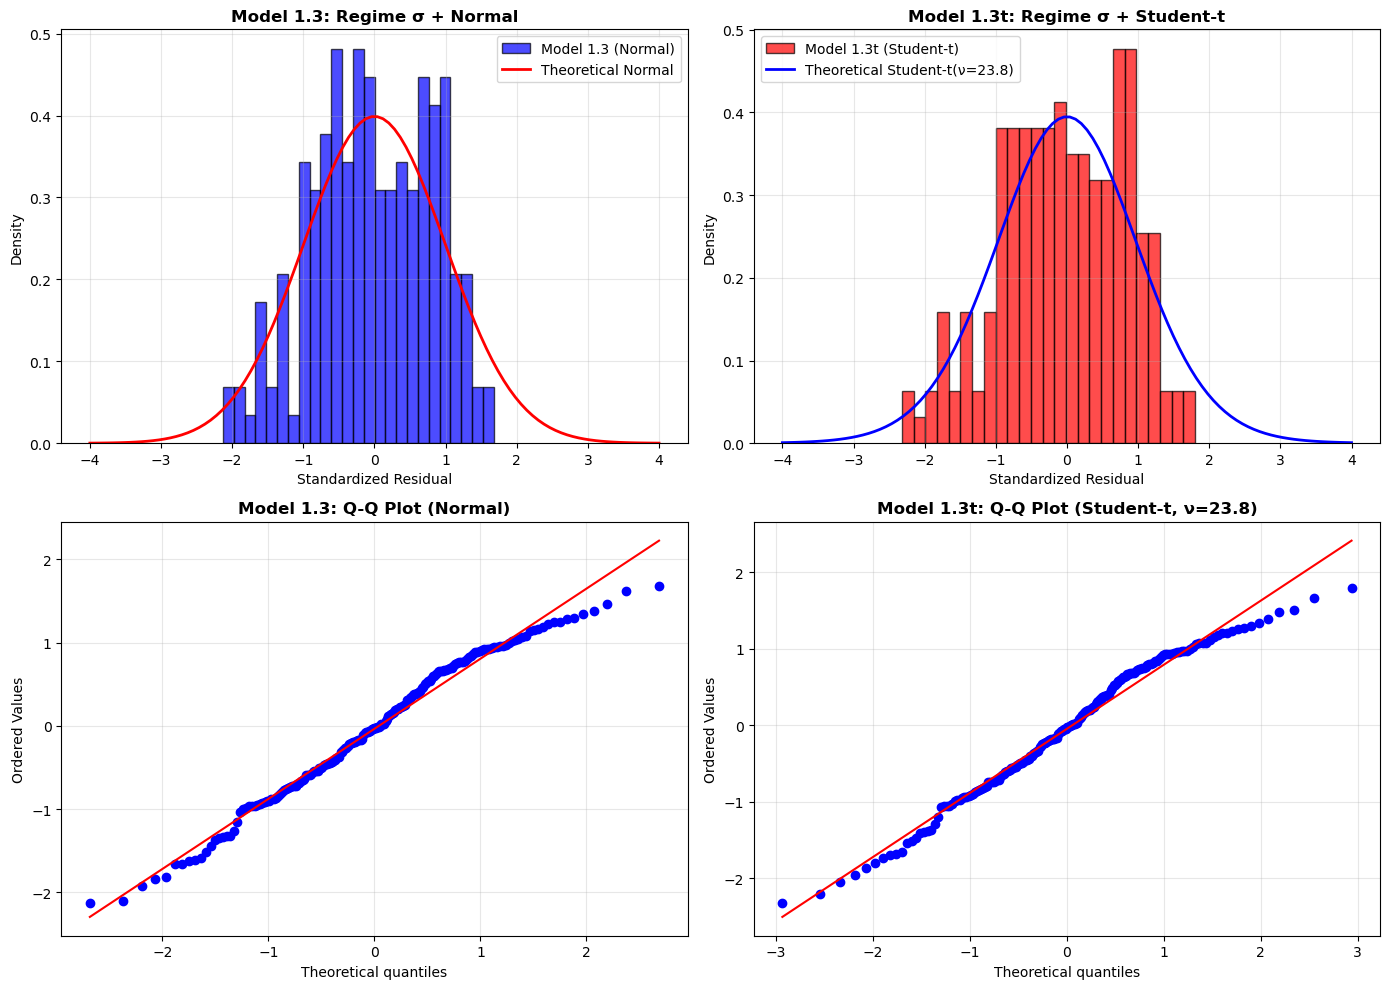


✓ Comparison plots saved to 'plots/model_comparison_1_3_vs_1_3t.png'


In [25]:
print("\nGenerating residual comparison plots...")

# Extract fitted values and residuals for both models
# Model 1.3 (Normal)
slope_mean_1_3 = float(trace_1_3.posterior["slope"].mean().values)
intercept_mean_1_3 = float(trace_1_3.posterior["intercept"].mean().values)
adjustments_mean_1_3 = trace_1_3.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean_1_3 = trace_1_3.posterior["sigmas"].mean(dim=["chain", "draw"]).values

changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
k_fitted_1_3 = slope_mean_1_3 + np.dot(changepoint_matrix, adjustments_mean_1_3)
intercept_adj_1_3 = -adjustments_mean_1_3 * changepoint_times
m_fitted_1_3 = intercept_mean_1_3 + np.dot(changepoint_matrix, intercept_adj_1_3)
fitted_trend_1_3 = k_fitted_1_3 * t + m_fitted_1_3

residuals_1_3 = cumulative_log_price - fitted_trend_1_3
volatility_mean_1_3 = sigmas_mean_1_3[regime_idx]
std_residuals_1_3 = residuals_1_3 / volatility_mean_1_3

# Model 1.3t (Student-t)
slope_mean_1_3t = float(trace_1_3t.posterior["slope"].mean().values)
intercept_mean_1_3t = float(trace_1_3t.posterior["intercept"].mean().values)
adjustments_mean_1_3t = trace_1_3t.posterior["adjustments"].mean(dim=["chain", "draw"]).values
sigmas_mean_1_3t = trace_1_3t.posterior["sigmas"].mean(dim=["chain", "draw"]).values

k_fitted_1_3t = slope_mean_1_3t + np.dot(changepoint_matrix, adjustments_mean_1_3t)
intercept_adj_1_3t = -adjustments_mean_1_3t * changepoint_times
m_fitted_1_3t = intercept_mean_1_3t + np.dot(changepoint_matrix, intercept_adj_1_3t)
fitted_trend_1_3t = k_fitted_1_3t * t + m_fitted_1_3t

residuals_1_3t = cumulative_log_price - fitted_trend_1_3t
volatility_mean_1_3t = sigmas_mean_1_3t[regime_idx]
std_residuals_1_3t = residuals_1_3t / volatility_mean_1_3t

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Histograms
axes[0, 0].hist(std_residuals_1_3, bins=25, alpha=0.7, color='blue', 
                edgecolor='black', density=True, label='Model 1.3 (Normal)')
x_range = np.linspace(-4, 4, 100)
axes[0, 0].plot(x_range, stats.norm.pdf(x_range), 'r-', linewidth=2, 
                label='Theoretical Normal')
axes[0, 0].set_title('Model 1.3: Regime σ + Normal', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Standardized Residual')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(std_residuals_1_3t, bins=25, alpha=0.7, color='red', 
                edgecolor='black', density=True, label='Model 1.3t (Student-t)')
axes[0, 1].plot(x_range, stats.t.pdf(x_range, nu_1_3t_mean), 'b-', linewidth=2, 
                label=f'Theoretical Student-t(ν={nu_1_3t_mean:.1f})')
axes[0, 1].set_title('Model 1.3t: Regime σ + Student-t', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Standardized Residual')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: Q-Q plots
stats.probplot(std_residuals_1_3, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Model 1.3: Q-Q Plot (Normal)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

stats.probplot(std_residuals_1_3t, dist="t", sparams=(nu_1_3t_mean,), plot=axes[1, 1])
axes[1, 1].set_title(f'Model 1.3t: Q-Q Plot (Student-t, ν={nu_1_3t_mean:.1f})', 
                     fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_comparison_1_3_vs_1_3t.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comparison plots saved to 'plots/model_comparison_1_3_vs_1_3t.png'")


Summary table

In [26]:
print("\nSUMMARY TABLE")
print("="*70)

summary_data = {
    'Model': ['1.2b', '1.2d', '1.3', '1.3t'],
    'Volatility': ['Constant', 'Constant', 'Regime-Switching', 'Regime-Switching'],
    'Distribution': ['Normal', 'Student-t', 'Normal', 'Student-t'],
    'WAIC Rank': [comparison_all.loc['1.2b: Constant σ + Normal', 'rank'] + 1,
                  comparison_all.loc['1.2d: Constant σ + Student-t', 'rank'] + 1,
                  comparison_all.loc['1.3: Regime σ + Normal', 'rank'] + 1,
                  comparison_all.loc['1.3t: Regime σ + Student-t', 'rank'] + 1],
    'Weight': [comparison_all.loc['1.2b: Constant σ + Normal', 'weight'],
               comparison_all.loc['1.2d: Constant σ + Student-t', 'weight'],
               comparison_all.loc['1.3: Regime σ + Normal', 'weight'],
               comparison_all.loc['1.3t: Regime σ + Student-t', 'weight']]
}

import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_df['Weight'] = summary_df['Weight'].apply(lambda x: f"{x:.1%}")

print("\n", summary_df.to_string(index=False))
print("\n" + "="*70)



SUMMARY TABLE

 Model       Volatility Distribution  WAIC Rank Weight
 1.2b         Constant       Normal          4   0.0%
 1.2d         Constant    Student-t          3   0.0%
  1.3 Regime-Switching       Normal          1 100.0%
 1.3t Regime-Switching    Student-t          2   0.0%




Creating nu comparison visualization...


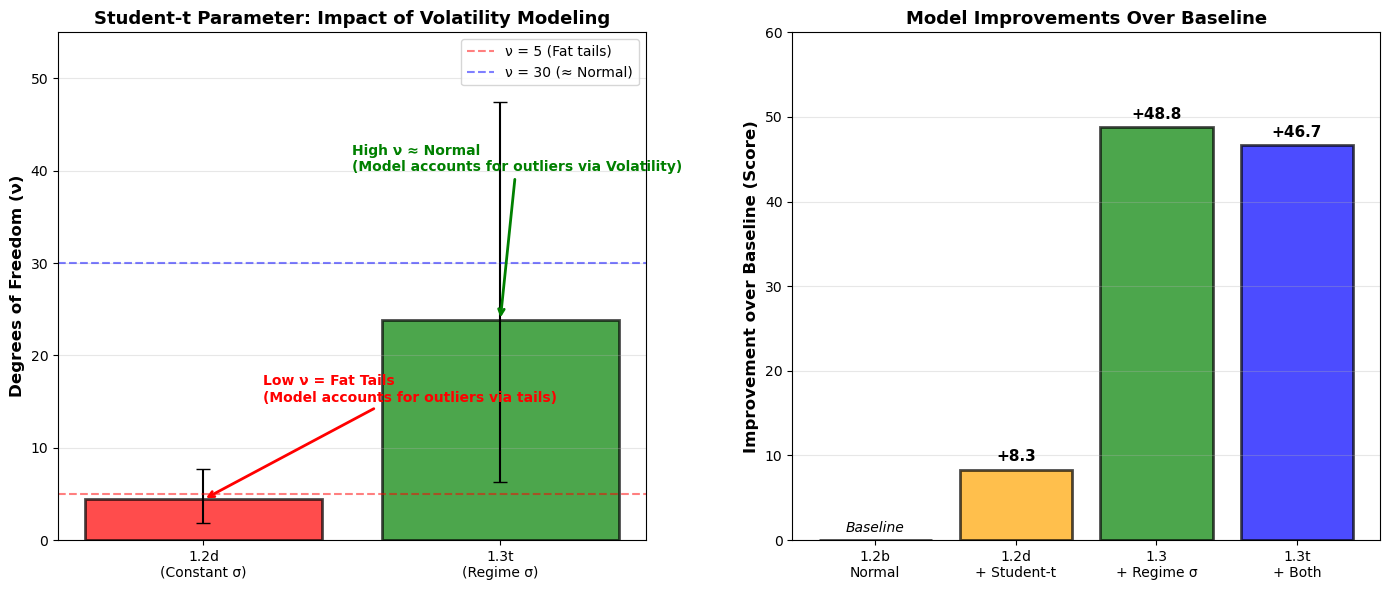

✓ Key findings visualization saved to 'plots/phase1_key_findings.png'


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os

print("\nCreating nu comparison visualization...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- LEFT PLOT: Bar chart of nu values ---
models_nu = ['1.2d\n(Constant σ)', '1.3t\n(Regime σ)']

# EXACT values from your screenshots
nu_values = [4.422, 23.803]

# Calculate asymmetric error bars based on your HDI
# [Lower Error, Upper Error]
# Model 1.2d: Mean 4.422 | HDI 1.857 - 7.744
error_1_low = 4.422 - 1.857
error_1_high = 7.744 - 4.422

# Model 1.3t: Mean 23.803 | HDI 6.324 - 47.485
error_2_low = 23.803 - 6.324
error_2_high = 47.485 - 23.803

nu_errors = [[error_1_low, error_2_low],    # Lower errors
             [error_1_high, error_2_high]]  # Upper errors

colors = ['red', 'green']
bars = axes[0].bar(models_nu, nu_values, yerr=nu_errors, capsize=5,
                   alpha=0.7, color=colors, edgecolor='black', linewidth=2)

# Reference lines
axes[0].axhline(5, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='ν = 5 (Fat tails)')
axes[0].axhline(30, color='blue', linestyle='--', linewidth=1.5, alpha=0.5, label='ν = 30 (≈ Normal)')

axes[0].set_ylabel('Degrees of Freedom (ν)', fontsize=12, fontweight='bold')
axes[0].set_title('Student-t Parameter: Impact of Volatility Modeling', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, 55) 
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Add annotations
axes[0].annotate('Low ν = Fat Tails\n(Model accounts for outliers via tails)', 
                 xy=(0, 4.4), xytext=(0.2, 15),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2),
                 fontsize=10, color='red', fontweight='bold')

axes[0].annotate('High ν ≈ Normal\n(Model accounts for outliers via Volatility)', 
                 xy=(1, 23.8), xytext=(0.5, 40),
                 arrowprops=dict(arrowstyle='->', color='green', lw=2),
                 fontsize=10, color='green', fontweight='bold')


# --- RIGHT PLOT: Score Improvements ---
# Using the score values you provided previously
baseline_score = 294.855217
scores = {
    'Normal': 294.855217,
    'Student-t': 303.167224,
    'Regime Normal': 343.650336,
    'Regime Student-t': 341.526996
}

# Calculate improvement over baseline
improvements = {
    '1.2b\nNormal': scores['Normal'] - baseline_score,            
    '1.2d\n+ Student-t': scores['Student-t'] - baseline_score,    
    '1.3\n+ Regime σ': scores['Regime Normal'] - baseline_score,  
    '1.3t\n+ Both': scores['Regime Student-t'] - baseline_score   
}

bars = axes[1].bar(improvements.keys(), improvements.values(), 
                   alpha=0.7, color=['gray', 'orange', 'green', 'blue'],
                   edgecolor='black', linewidth=2)

axes[1].set_ylabel('Improvement over Baseline (Score)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Improvements Over Baseline', fontsize=13, fontweight='bold')
axes[1].set_ylim(0, 60)
axes[1].grid(True, alpha=0.3, axis='y')

# Annotations
for i, (key, val) in enumerate(improvements.items()):
    if val > 0: 
        axes[1].text(i, val + 1, f'+{val:.1f}', ha='center', fontsize=11, fontweight='bold')
    elif val == 0:
        axes[1].text(i, 1, 'Baseline', ha='center', fontsize=10, style='italic')

plt.tight_layout()
os.makedirs('plots', exist_ok=True)
plt.savefig('plots/phase1_key_findings.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Key findings visualization saved to 'plots/phase1_key_findings.png'")